## Problem Statement:

Clustering:

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

### Data Dictionary

1. Timestamp - The Timestamp of the particular Advertisement. 
2. InventoryType - The Inventory Type of the particular Advertisement. Format 1 to 7. This is a Categorical Variable. 
3. Ad - Length - The Length Dimension of the particular Adverstisement. 
4. Ad- Width - The Width Dimension of the particular Advertisement. 
5. Ad Size - The Overall Size of the particular Advertisement. Length*Width. 
6. Ad Type - The type of the particular Advertisement. This is a Categorical Variable.
7. Platform - The platform in which the particular Advertisement is displayed. Web, Video or App. This is a Categorical Variable. 
8. Device Type - The type of the device which supports the partciular Advertisement. This is a Categorical Variable.
9. Format - The Format in which the Advertisement is displayed. This is a Categorical Variable. 
10. Available_Impressions - How often the particular Advertisement is shown. An impression is counted each time an Advertisement is shown on a search result page or other site on a Network. 
11. Matched_Queries - Matched search queries data is pulled from Advertising Platform and consists of the exact searches typed into the search Engine that generated clicks for the particular Advertisement. 
12. Impressions - The impression count of the particular Advertisement out of the total available impressions. 
13. Clicks - It is a marketing metric that counts the number of times users have clicked on the particular advertisement to reach an online property.
14. Spend - It is the amount of money spent on specific ad variations within a specific campaign or ad set. This metric helps regulate ad performance.
15. Fee - The percentage of the Advertising Fees payable by Franchise Entities. 
16. Revenue - It is the income that has been earned from the particular advertisement.
17. CTR - CTR stands for "Click through rate". CTR is the number of clicks that your ad receives divided by the number of times your ad is shown. Formula used here is CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column and the Total Measured Ad Impressions refers to the 'Impressions' Column. 
18. CPM - CPM stands for "cost per 1000 impressions." Formula used here is CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column and the Number of Impressions refers to the 'Impressions' Column.
19. CPC - CPC stands for "Cost-per-click". Cost-per-click (CPC) bidding means that you pay for each click on your ads. The Formula used here is CPC = Total Cost (spend) / Number of Clicks. Note that the Total Cost (spend) refers to the 'Spend' Column and the Number of Clicks refers to the 'Clicks' Column. 

## Importing Libraries

In [337]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


## Loading  and Understanding the Structure of the Data

In [338]:
df=pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

In [339]:
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [340]:
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [341]:
df.shape

(23066, 19)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

## Structure of the Data:
● Number of Rows: 23066

● Number of Columns: 19

● Memory Usage: 3.3+ MB

● Range Index: 0 to 23065

● Data Types: Float, Int, and Object

## Data Type:

The different datatypes in the dataset are as follows

a.There are 7 columns in the with int64 data type

b.There are 6 columns in the with object data type

c.There are 6 columns in the with float64 data type

In [343]:
df.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   96674.468048           2.432044e+06   
std      233.651434    203.092885   61538.329557           4.742888e+06   
min      120.000000     70.000000   33600.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
min       1.000000e+00  1.000000e+00       1.000000      0.000000   
25%       1.828250e+04  7.990500e+03     710.000000     85.180000   
50%       2.580875e+05  2.252900e+05    4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06   12793.750000   3121.400000   
max       1.470202e+07  1.419477e+07  143049.000000  26931.870000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  18330.000000  18330.000000  18330.000000  
mean       0.335123   1924.252331      0.073661      7.672045      0.351061  
std        0.031963   3105.238410      0.075160      6.481391      0.343334  
min        0.210000      0.000000      0.000100      0.000000      0.000000  
25%        0.330000     55.365375      0.002600      1.710000      0.090000  
50%        0.350000    926.335000      0.082550      7.660000      0.160000  
75%        0.350000   2091.338150      0.130000     12.510000      0.570000  
max        0.350000  21276.180000      1.000000     81.560000      7.260000

## Statistical Summary


In the "Ad Size" column, the mean is greater than the median, indicating a positive skewed distribution.

Similarly, the "spend" column also displays a positive skewed distribution, with the mean exceeding the median.

Moreover, the "clicks" column exhibits a highly positive skewed distribution, as evidenced by the mean being substantially greater than the median.





## Univariate Analysis

## Inventory Type

<Axes: xlabel='InventoryType', ylabel='count'>

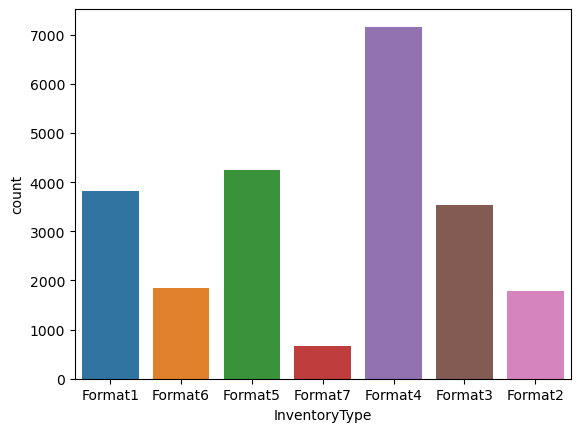

In [344]:
sns.countplot(x='InventoryType', data=df)

In [345]:
df.InventoryType.value_counts()

InventoryType
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: count, dtype: int64

Insights -

* The most frequently used type of inventory is 'Format4', with a count of 7165.

* 'Format7' represents the least utilized inventory type, with only 659 instances.

* Following 'Format4' and 'Format5', the next commonly employed inventory types are 'Format1' and 'Format3'.

## Timestamp

<Axes: xlabel='Timestamp', ylabel='count'>

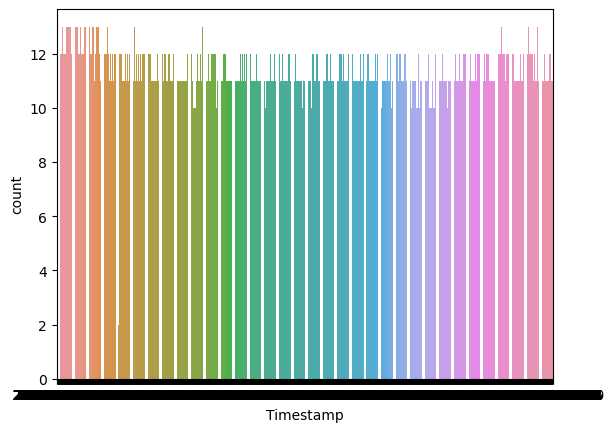

In [346]:
sns.countplot(data=df,x='Timestamp')

## Ad - Length

<Axes: xlabel='Ad - Length'>

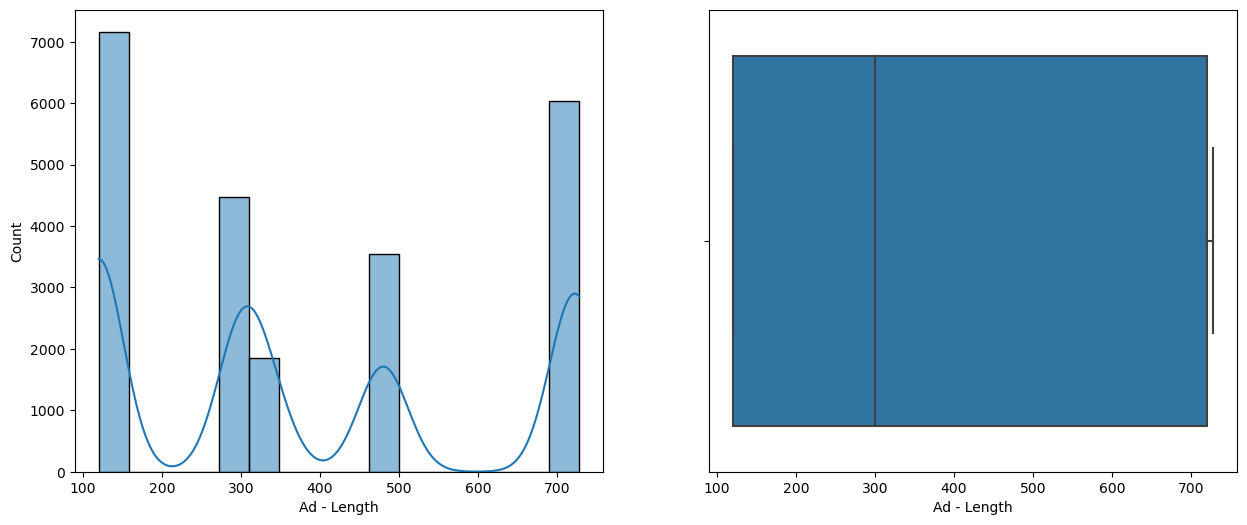

In [347]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='Ad - Length', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Ad - Length', data=df, ax=axes[1])

In [348]:
df['Ad - Length'].value_counts()

Ad - Length
120    7165
300    4473
720    4249
480    3540
336    1850
728    1789
Name: count, dtype: int64

Insights-

* The most common ad length dimension is 120, occurring 7165 times.
* The ad length with the least occurrence is of dimension 728.
* Common ad length dimensions include 300 and 720.

## Ad- Width

<Axes: xlabel='Ad- Width'>

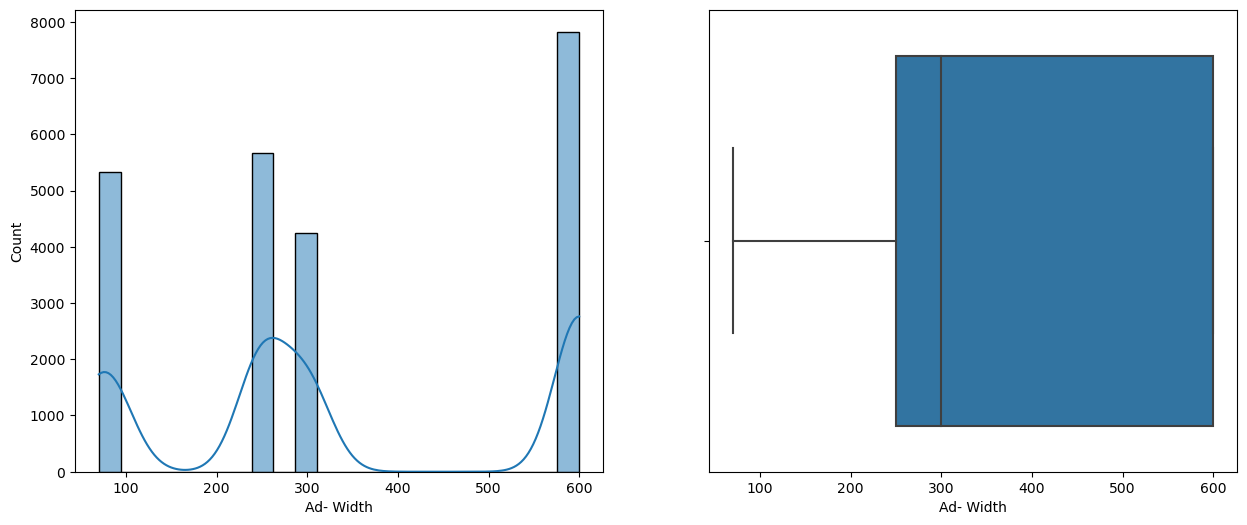

In [349]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='Ad- Width', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Ad- Width', data=df, ax=axes[1])

In [350]:
df['Ad- Width'].value_counts()

Ad- Width
600    7824
250    5664
300    4249
70     3540
90     1789
Name: count, dtype: int64

Insights -

* The most common ad width dimension is 600, occurring 7824 times.
* The ad width with the least occurrence is of dimension 1789.
* Common ad width dimensions include 300 and 250.
* Ad- Width distribution is right-skewed.

## Ad Size

<Axes: xlabel='Ad Size'>

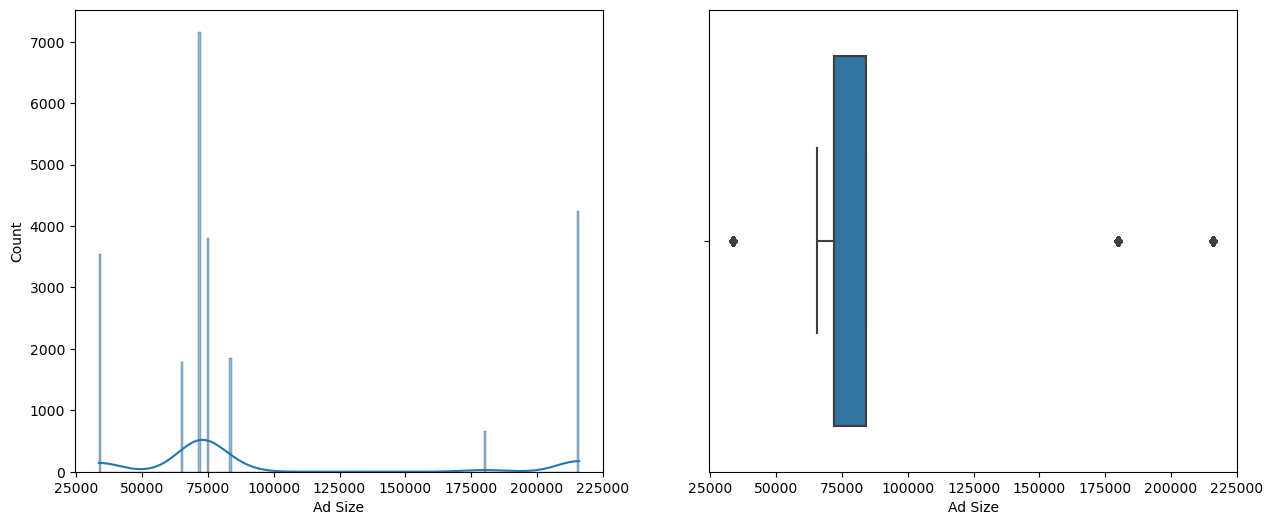

In [351]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='Ad Size', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Ad Size', data=df, ax=axes[1])

In [352]:
df['Ad Size'].value_counts()

Ad Size
72000     7165
216000    4249
75000     3814
33600     3540
84000     1850
65520     1789
180000     659
Name: count, dtype: int64

Insights:
* The most frequent ad size is 72,000.
* The least occurring ad size is 180,000, observed 659 times.
* Common ad sizes include 216,000.
* There are outliers present in the data.

## Available_Impressions

<Axes: xlabel='Available_Impressions'>

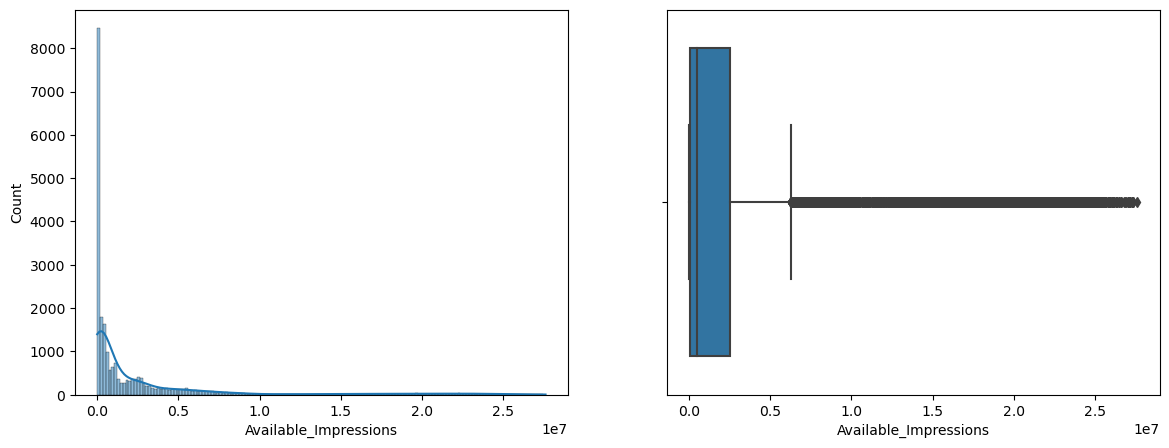

In [353]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(14,5)
sns.histplot(x='Available_Impressions', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Available_Impressions', data=df, ax=axes[1])

In [354]:
df['Available_Impressions'].value_counts()

Available_Impressions
7          33
9          25
5          24
3          23
11         23
           ..
1950296     1
3990532     1
483612      1
1034014     1
114         1
Name: count, Length: 21560, dtype: int64

Insights:
    
* The most frequent observation is 7, occurring 33 times.
* There are several unique observations that occur only once, such as 1,950,296; 3,990,532; 483,612; 1,034,014, etc.

## Matched_Queries

<Axes: xlabel='Matched_Queries'>

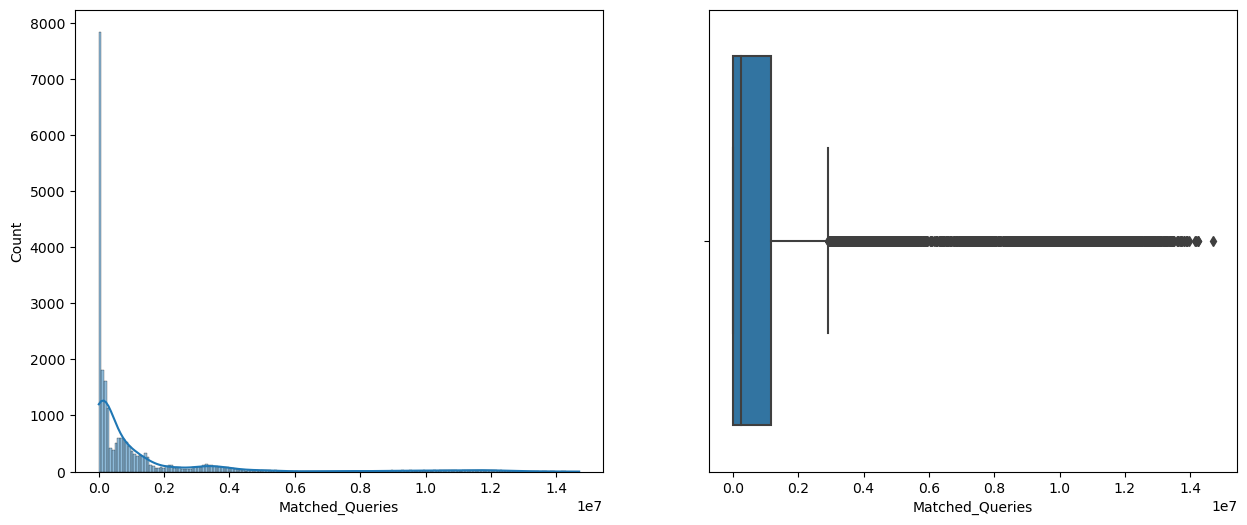

In [355]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='Matched_Queries', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Matched_Queries', data=df, ax=axes[1])

In [356]:
df['Matched_Queries'].value_counts()

Matched_Queries
5          50
4          49
3          41
2          40
6          33
           ..
537979      1
613290      1
1335760     1
213348      1
197         1
Name: count, Length: 20919, dtype: int64

Observations -

* Outliers are present in the "Matched_Queries" column.
* The most common value in the "Matched_Queries" column is 5.

## Impressions

<Axes: xlabel='Impressions'>

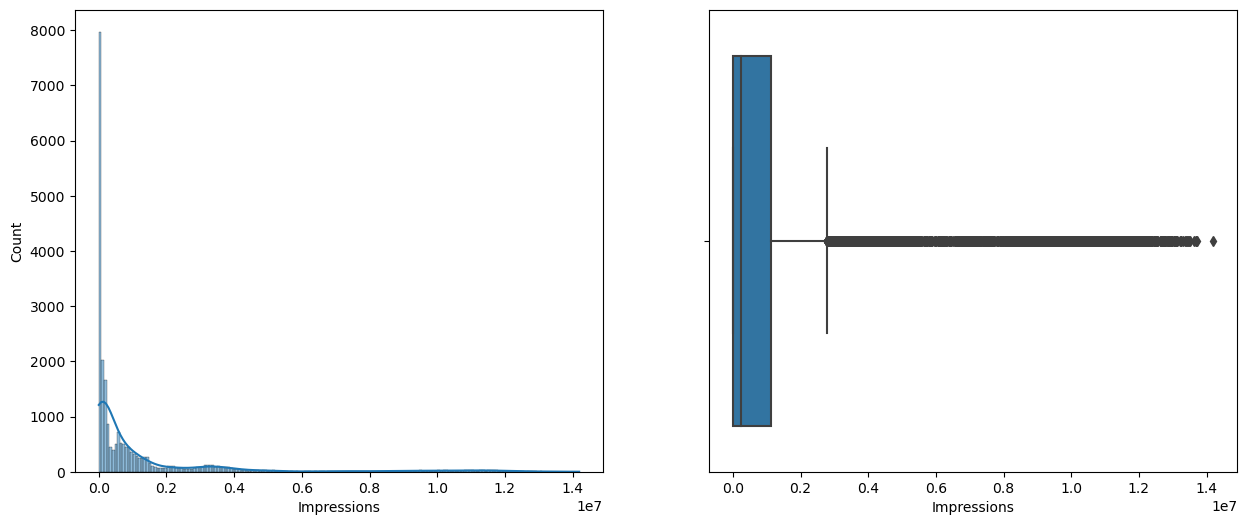

In [357]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='Impressions', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Impressions', data=df, ax=axes[1])

In [358]:
df['Impressions'].value_counts()

Impressions
2         57
4         53
5         49
3         38
7         37
          ..
185375     1
702352     1
126782     1
151283     1
143        1
Name: count, Length: 20405, dtype: int64

Observations -

* Outliers are present in the "Imressions" column.
* The most common value in the "Impressions" column is 2.

## Clicks

<Axes: xlabel='Clicks'>

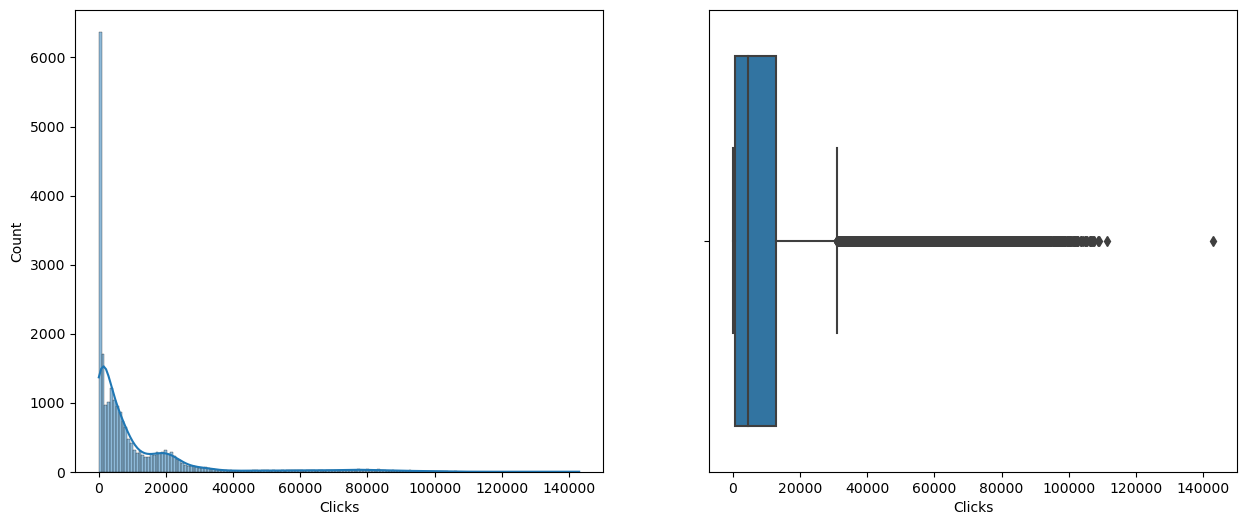

In [359]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='Clicks', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Clicks', data=df, ax=axes[1])

In [360]:
df['Clicks'].value_counts()

Clicks
1        540
2        162
3         76
4         58
6         50
        ... 
5430       1
5222       1
27306      1
22512      1
1201       1
Name: count, Length: 12752, dtype: int64

Insights -

* Advertisements with a click count of one are the most frequently occurring, with 540 instances.
* The majority of advertisements have click counts of 1, 2, 3, 4, and 6.

## Spend

<Axes: xlabel='Spend'>

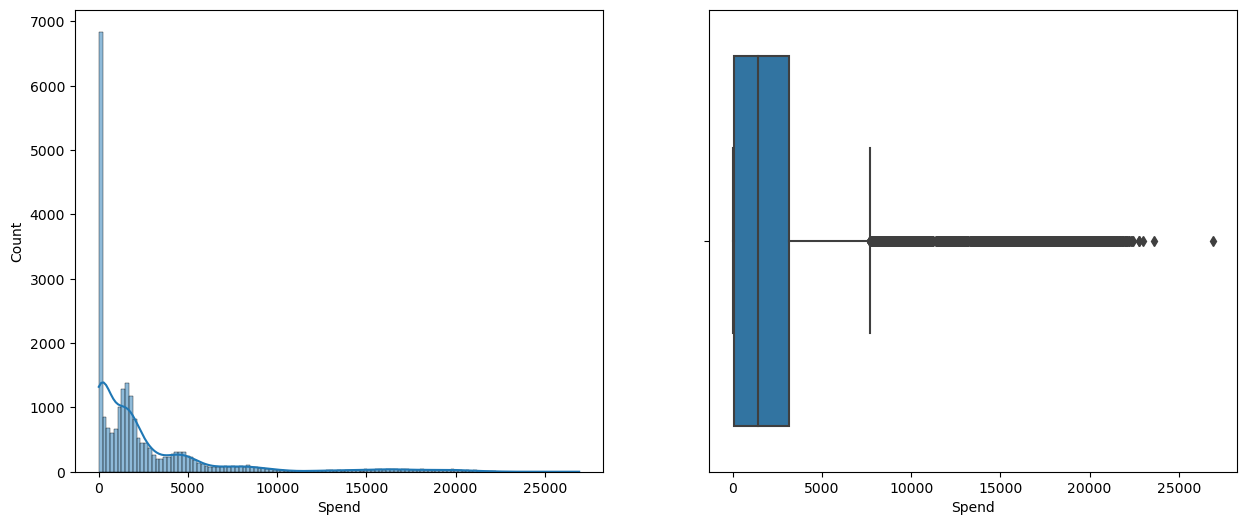

In [361]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='Spend', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Spend', data=df, ax=axes[1])

In [362]:
df['Spend'].value_counts()

Spend
0.00       97
0.04       56
0.03       46
0.05       43
0.07       39
           ..
1394.29     1
1394.25     1
1394.17     1
1393.84     1
1.43        1
Name: count, Length: 20467, dtype: int64

In [363]:
df['Spend'].max()

26931.87

Insights -

* There are 97 advertisements with no amount of money spent.
* The maximum amount spent on an advertisement is 26931.

## Fee

<Axes: xlabel='Fee'>

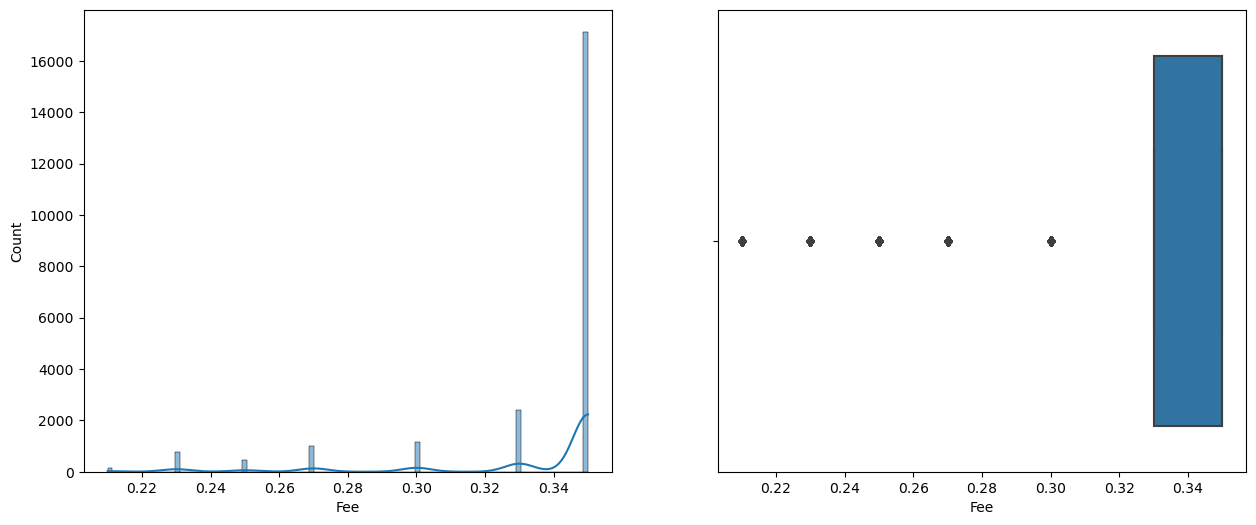

In [364]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='Fee', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Fee', data=df, ax=axes[1])

In [365]:
df['Fee'].value_counts()

Fee
0.35    17141
0.33     2408
0.30     1169
0.27      989
0.23      752
0.25      445
0.21      162
Name: count, dtype: int64

Insights - 

* The most frequent and maximum percentage of advertising fees is 0.35, with 17141 instances.
* The least occurring percentage is 0.21, with 162 instances.

## Revenue

<Axes: xlabel='Revenue'>

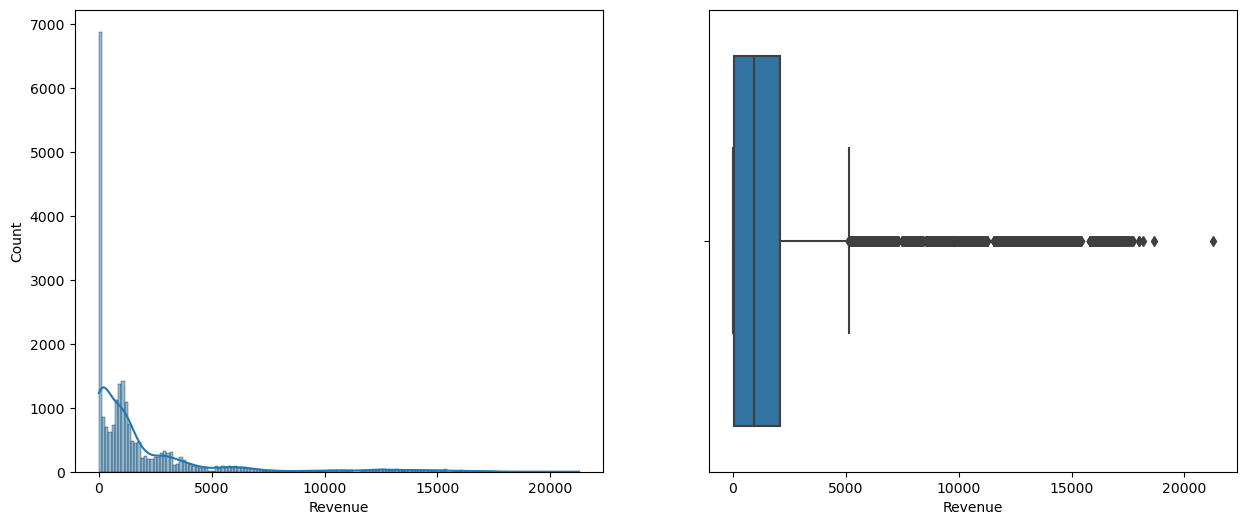

In [366]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='Revenue', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'Revenue', data=df, ax=axes[1])

In [367]:
df['Revenue'].max()

21276.18

Insights - 
* Approximately 100 ads have generated zero revenue.
* There are 49 ads that generated 0.0260 in revenue.
* The maximum revenue generated by an ad is 21276.18.
* There are few outliers present.

## CTR

<Axes: xlabel='CTR'>

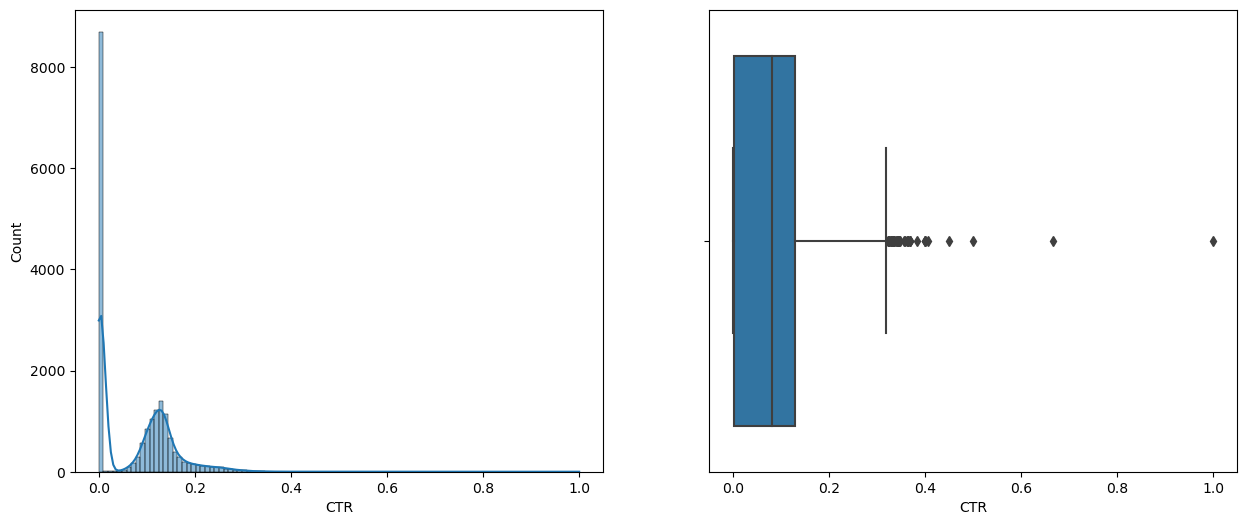

In [368]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='CTR', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'CTR', data=df, ax=axes[1])

In [369]:
df['CTR'].value_counts()

CTR
0.0024    630
0.0025    598
0.0023    588
0.0022    507
0.0026    492
         ... 
0.2693      1
0.3230      1
0.0682      1
0.0539      1
0.1741      1
Name: count, Length: 2066, dtype: int64

Insights -

* Ads with a click-through rate (CTR) of 0.0024 have the highest count, with 630 instances.
* The least common CTR values are 0.2693, 0.3230, 0.0682, 0.0539, and 0.1741, each occurring only once.

## CPM

<Axes: xlabel='CPM'>

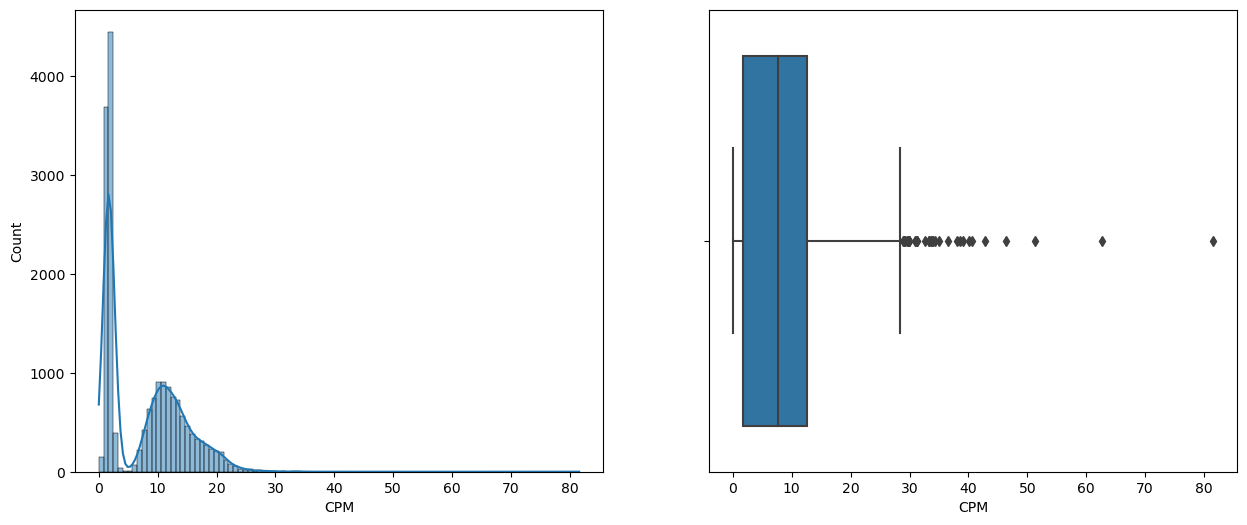

In [370]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,6)
sns.histplot(x='CPM', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'CPM', data=df, ax=axes[1])

In [371]:
df['CPM'].value_counts()

CPM
1.66     123
1.62     103
1.69     102
1.64     101
1.74      99
        ... 
15.28      1
0.63       1
25.39      1
5.30       1
15.95      1
Name: count, Length: 2084, dtype: int64

Insights -

* Ads with a CPM of 1.66 have the highest count, with 123 instances.
* The least common CPM values are 15.28, 0.63, 25.39, 5.30, and 15.95, each occurring only once.

## CPC

<Axes: xlabel='CPC'>

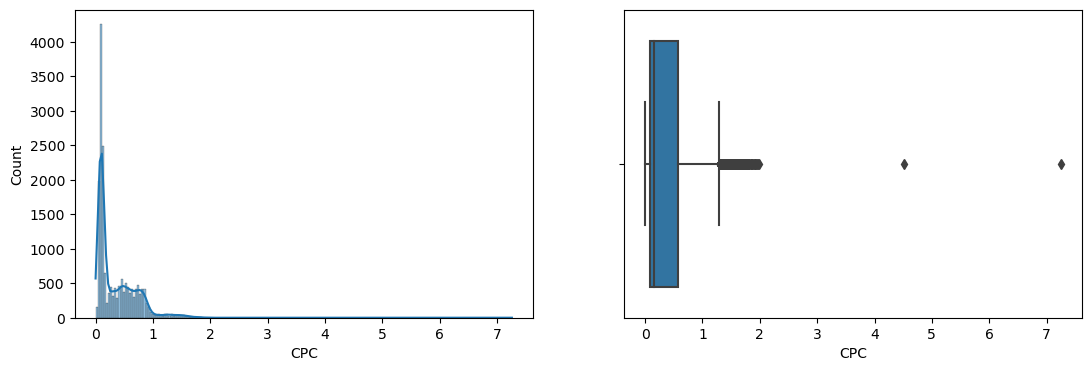

In [372]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(13,4)
sns.histplot(x='CPC', data=df, kde=True, ax=axes[0]) 
sns.boxplot(x= 'CPC', data=df, ax=axes[1])

In [373]:
df['CPC'].value_counts()

CPC
0.09    1577
0.10    1431
0.08    1247
0.07     963
0.11     872
        ... 
1.87       1
1.71       1
1.94       1
4.51       1
1.96       1
Name: count, Length: 194, dtype: int64

Insights -

* Ads with a CPC of 1.66 have the highest count, with 123 instances.
* The least common CPM values are 15.28, 0.63, 25.39, 5.30, and 15.95, each occurring only once.

## Ad Type

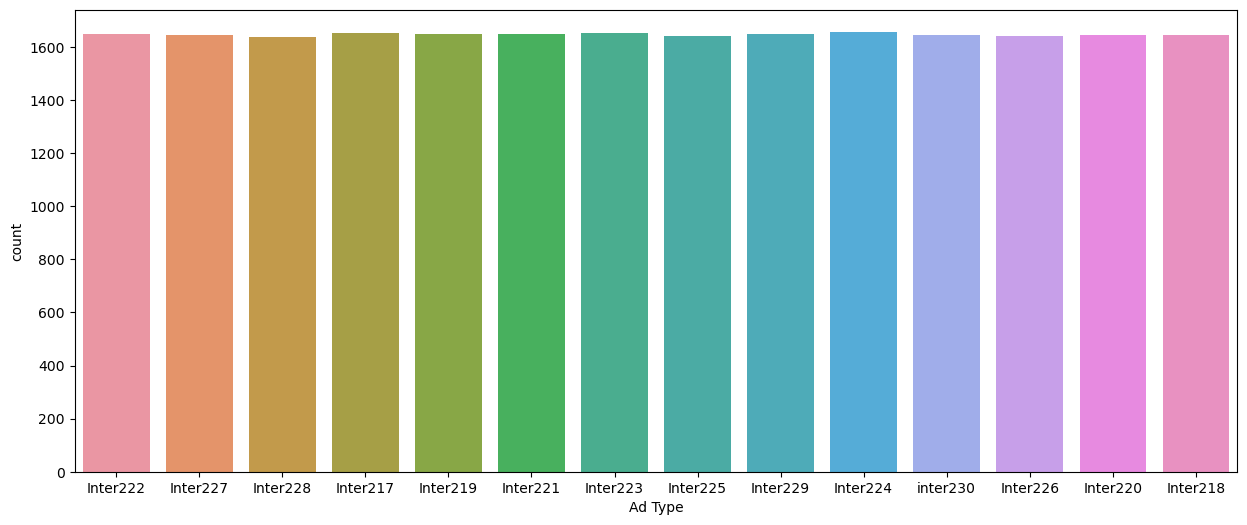

In [374]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Ad Type')
plt.show()

In [375]:
df['Ad Type'].value_counts()

Ad Type
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: count, dtype: int64

Insights - 

* The Inter224 ad type has the highest count, with 1,658 occurrences.
* The Inter228 ad type has the lowest count, with 1,639 occurrences.
* The counts of the ad types do not significantly differ, as they all fall within the range of 1,639 to 1,658 occurrences.

## Platform

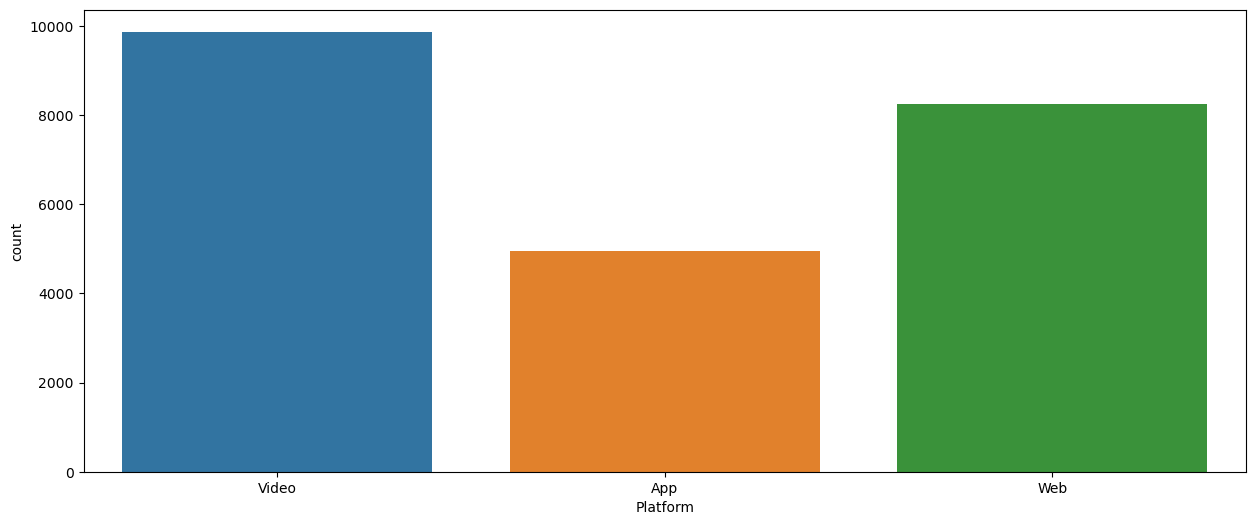

In [376]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Platform')
plt.show()

In [377]:
df['Platform'].value_counts()

Platform
Video    9873
Web      8251
App      4942
Name: count, dtype: int64

Insights-

* Video advertisements have the highest count, with 9,873 occurrences.
* The app type has the lowest count of advertisement plays, with 4,942 occurrences.

## Device Type

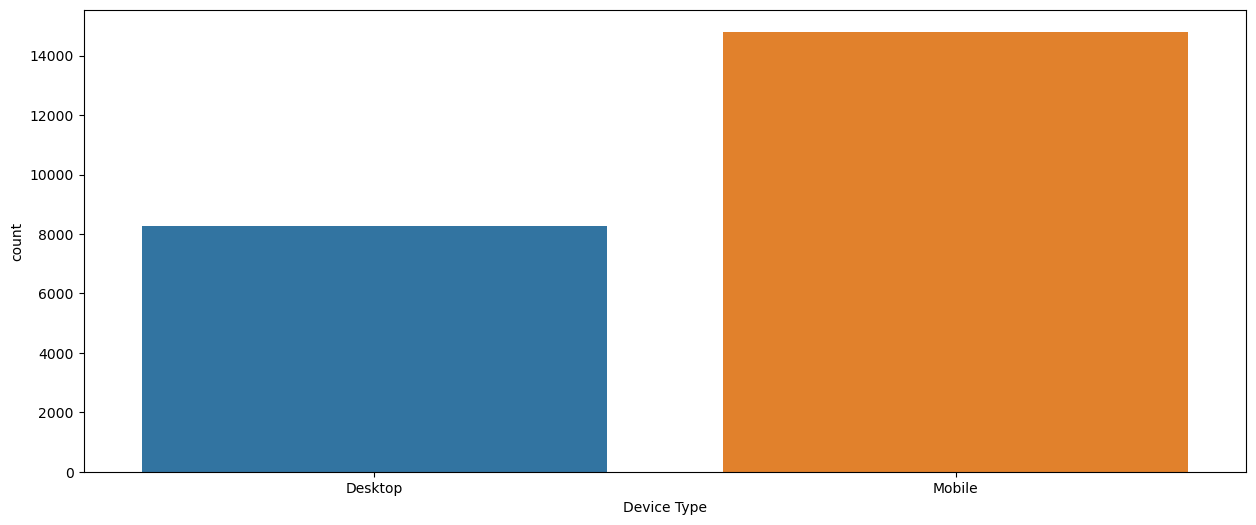

In [378]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Device Type')
plt.show()

In [379]:
df['Device Type'].value_counts()

Device Type
Mobile     14806
Desktop     8260
Name: count, dtype: int64

Insights-
* Mobile platforms support the majority of the advertisements, with 14,806 instances.
* Desktop platforms support a comparatively lower number of advertisements, with only 8,260 instances.

## Format

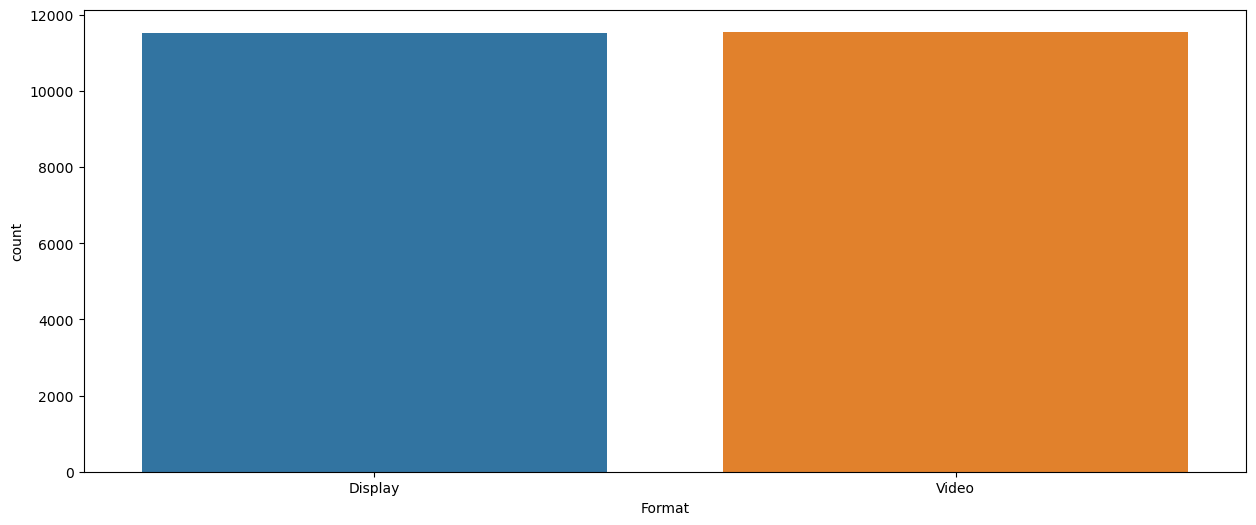

In [380]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Format')
plt.show()

In [381]:
df['Format'].value_counts()

Format
Video      11552
Display    11514
Name: count, dtype: int64

Insights-

* The majority of advertisements are displayed in video format, with 11,552 instances.
* There is a balanced distribution between the video format and the display format, with a ratio of 11,552 to 11,514 instances respectively.

## Bivariate

In [382]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

### CTR and CPM

<Axes: xlabel='CTR', ylabel='CPM'>

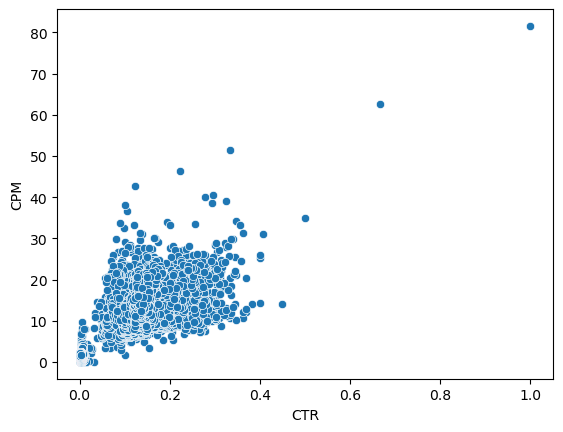

In [383]:
sns.scatterplot(x='CTR',y='CPM',data=df)

Insights - 

* There is a positive correlation between Click-Through Rate (CTR) and CPM, indicating that as CTR increases,     CPM also tends to increase.
* Only two ads have a CTR above 6.
* The majority of ads fall within the range of CTR 0.0 to 0.5 and CPM 0 to 50.

## Spend and Revenue

<Axes: xlabel='Spend', ylabel='Revenue'>

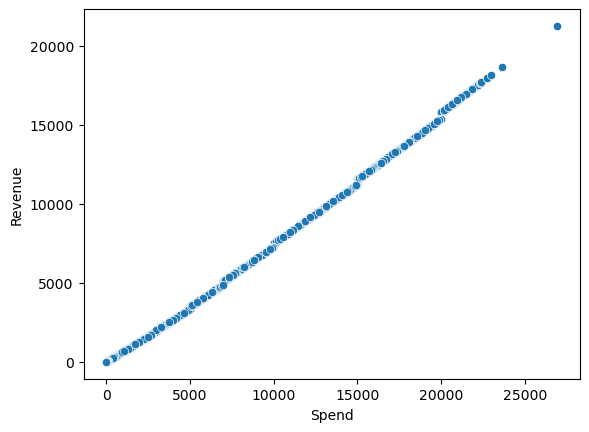

In [384]:
sns.scatterplot(x='Spend',y='Revenue',data=df)

Insights - 

* There is a positive correlation between Spend and Revenue, suggesting that as Spend increases, Revenue also tends to increase.
* Only two ads have a spend above 25000.
* The majority of ads fall within the range of Spend 0.0 to 25000 and Revenue 0 to 20000.

## Impressions and Revenue

<Axes: xlabel='Impressions', ylabel='Revenue'>

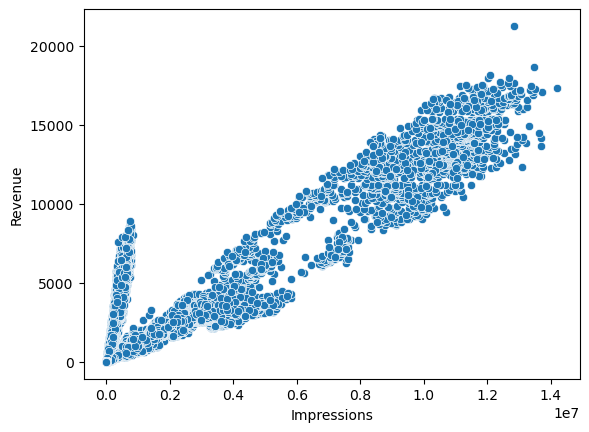

In [385]:
sns.scatterplot(x='Impressions',y='Revenue',data=df)

Insights:

* There is a positive correlation between Impressions and Revenue, indicating that as Impressions increase, Revenue also tends     to increase.
* Only one ad has revenue exceeding 20000.
* The majority of ads generate revenue below 20000.

## Available Impressions and Matched Queries

<Axes: xlabel='Available_Impressions', ylabel='Matched_Queries'>

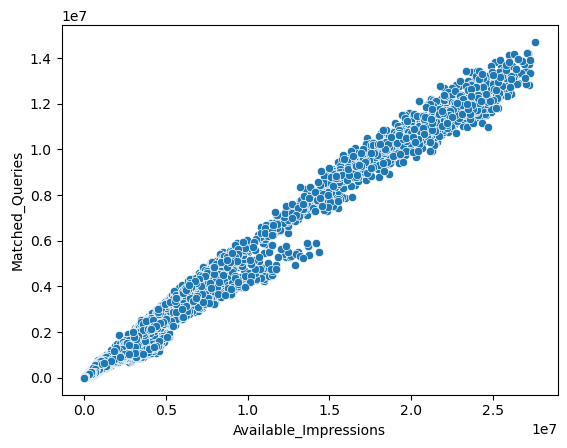

In [386]:
sns.scatterplot(x='Available_Impressions',y='Matched_Queries',data=df)

Insights:

* There is a positive correlation between Available Impressions and Matched Queries, suggesting that as Available Impressions increase, Matched Queries also tend to increase.
* The majority of ads fall within the range of Matched Queries 0 to 0.8 and Available Impressions 0 to 1.5, as indicated by the density of points in that area.

## Available Impressions and Impressions

<Axes: xlabel='Available_Impressions', ylabel='Impressions'>

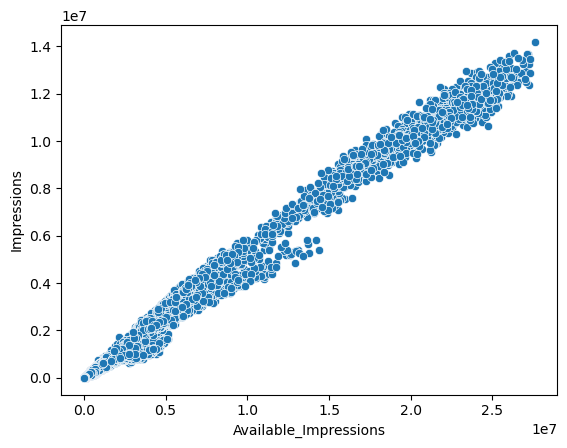

In [387]:
sns.scatterplot(x='Available_Impressions',y='Impressions',data=df)

Insights:

* There is a positive correlation between Available Impressions and Impressions, suggesting that as Available Impressions increase, Impressions also tend to increase.
* The majority of ads fall within the range of Impressions 0 to 0.8 and Available Impressions 0 to 1.5, as indicated by the density of points in that area.

## Clicks and Spend

<Axes: xlabel='Clicks', ylabel='Spend'>

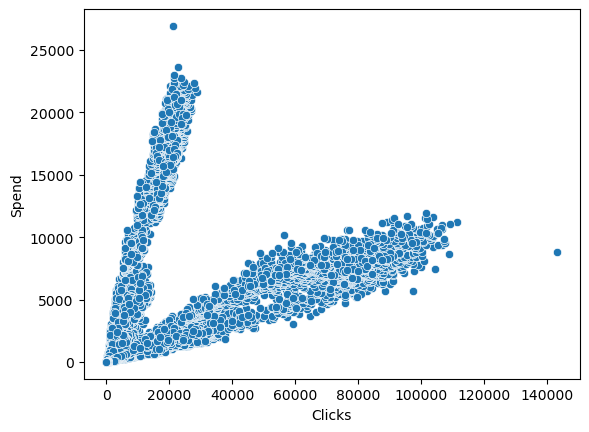

In [388]:
sns.scatterplot(x='Clicks',y='Spend',data=df)

Insights:

* There is a positive correlation between Clicks and Spend, indicating that as Clicks increase, Spend also tends to increase.
* There is only one ad with a spend above 25000.
* There is only one ad with clicks exceeding 120000.

## Multivariate Analysis

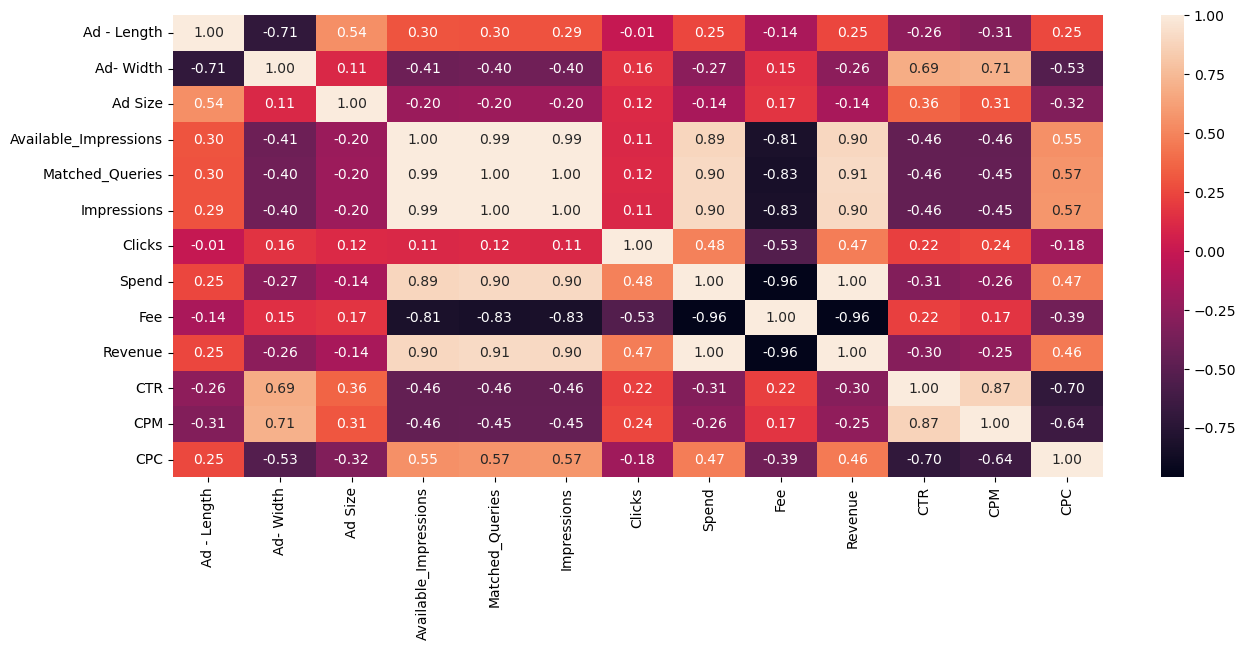

In [389]:
plt.figure(figsize=(15,6))
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot = True, fmt = ".2f");

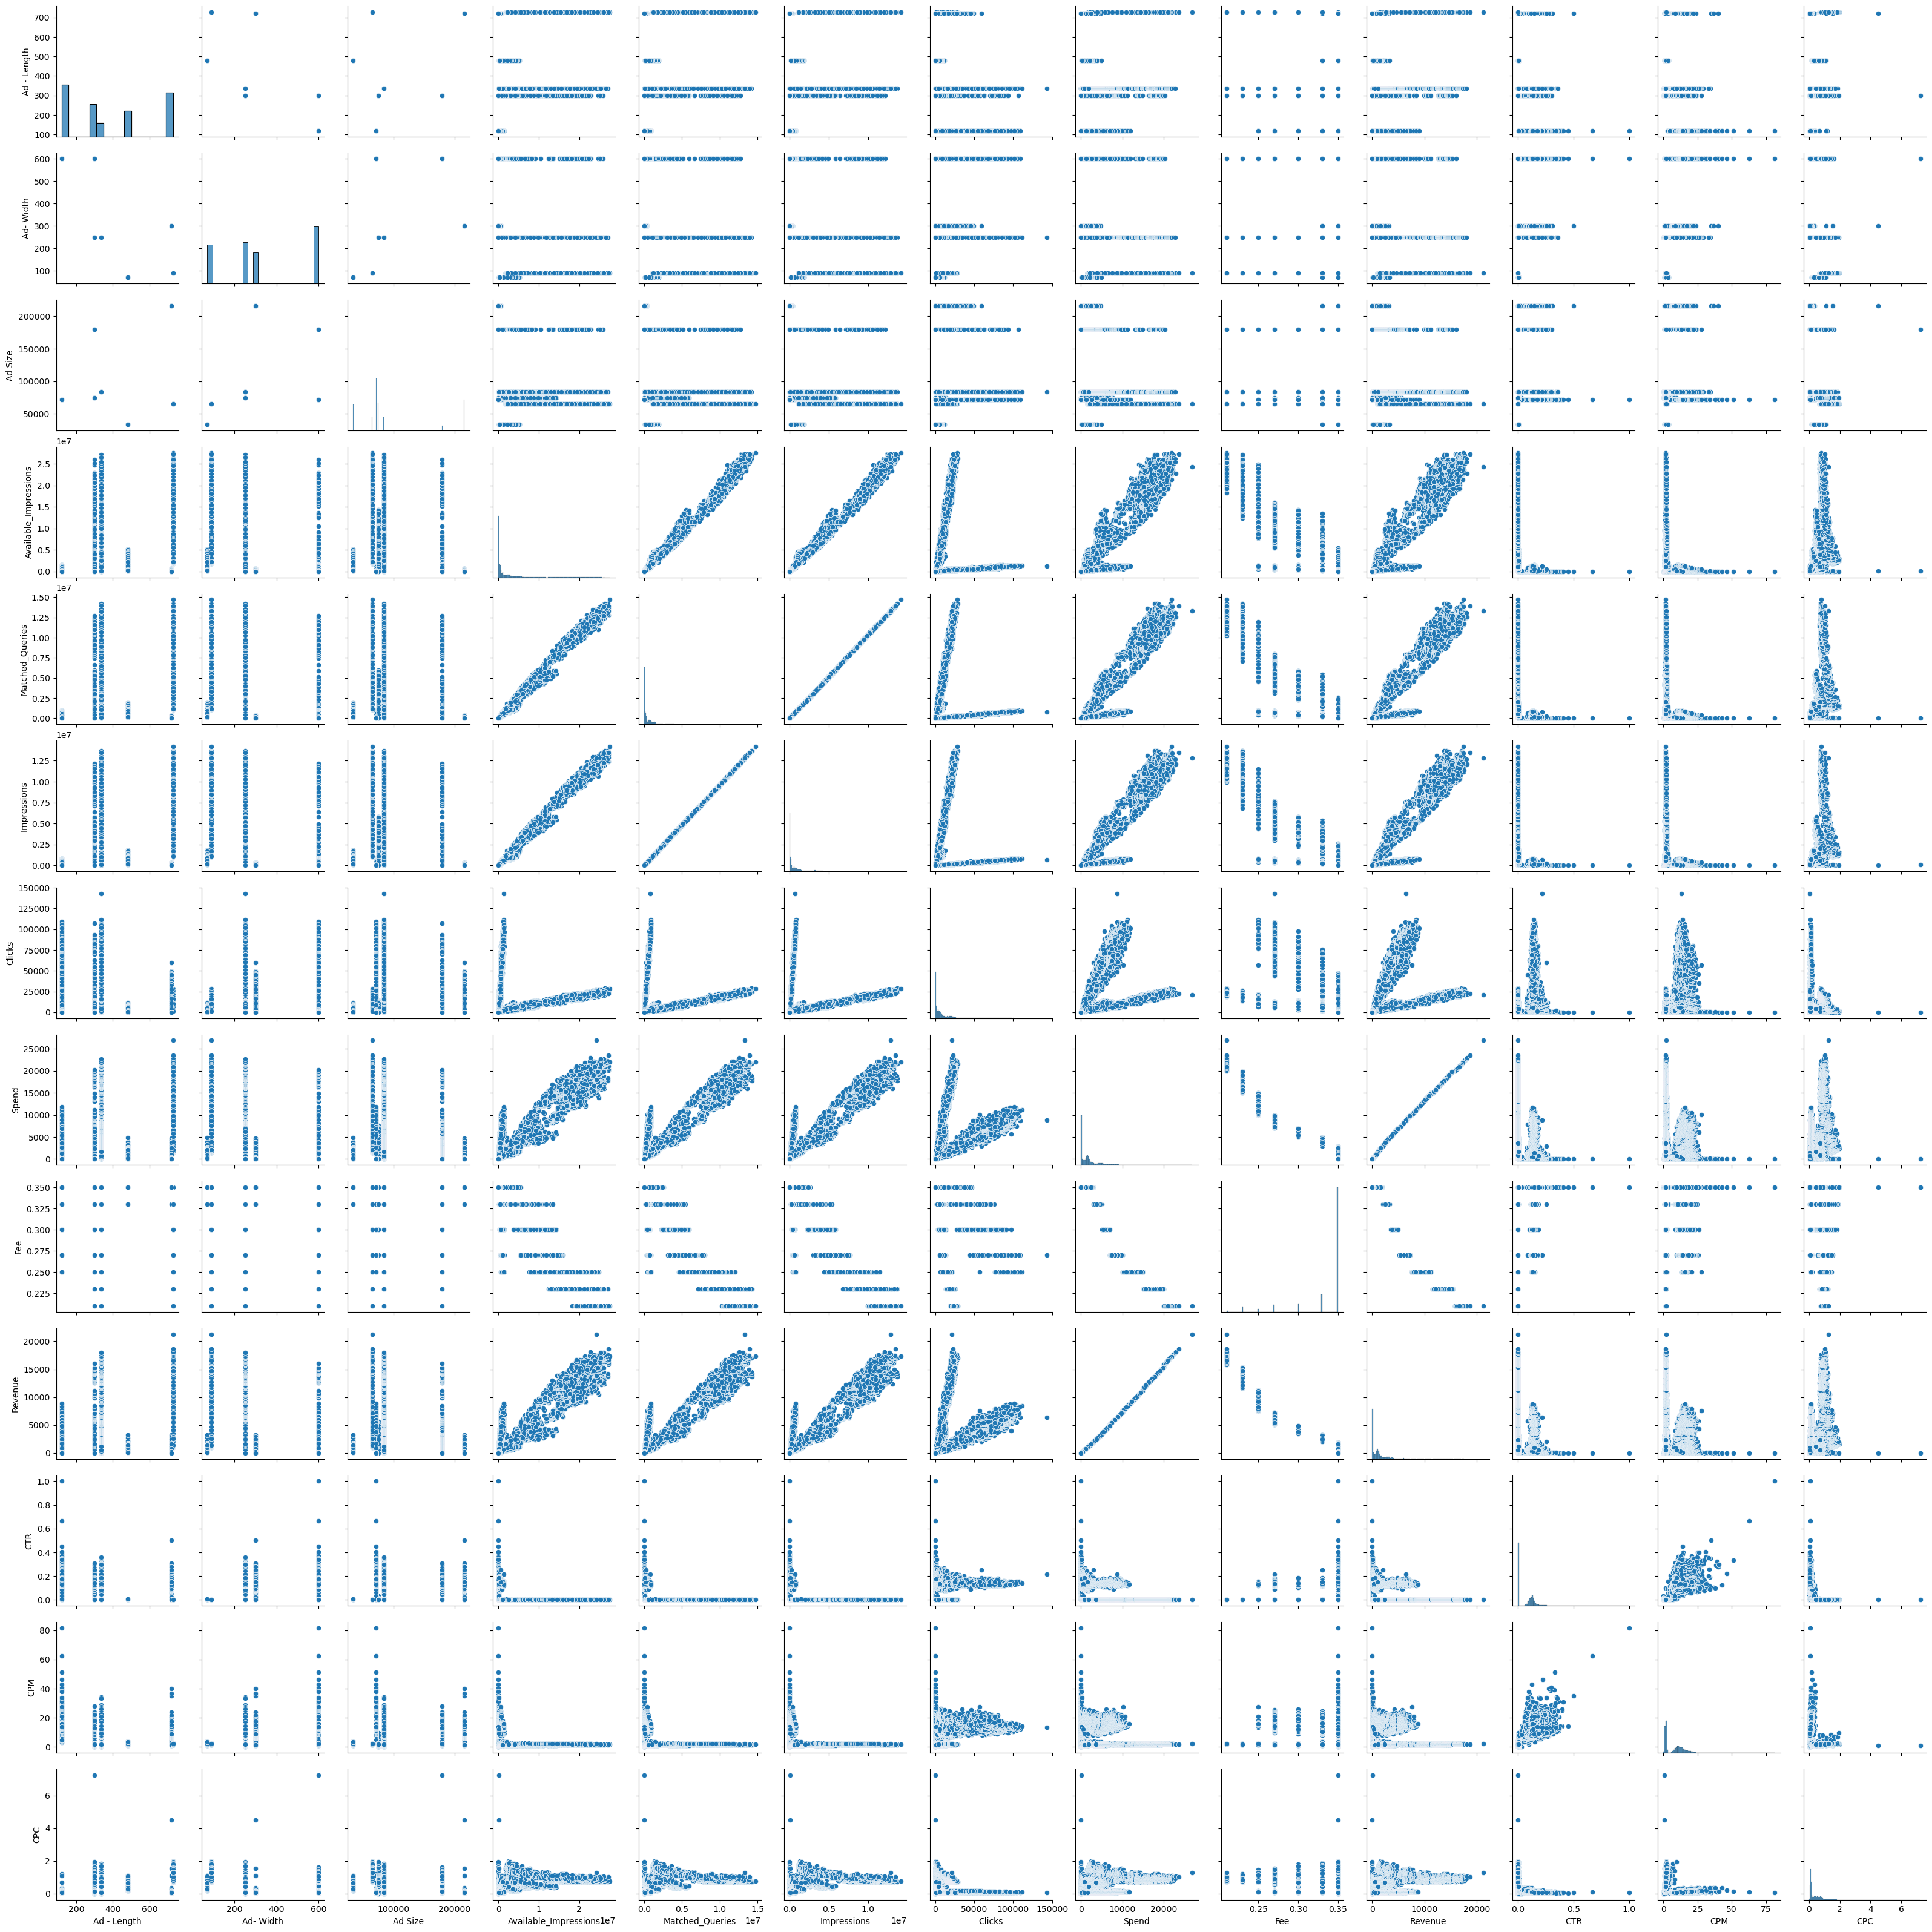

In [390]:
sns.pairplot(df)

## Relationship Between Categorical and Numerical variable

### Inventory type and Clicks

<Axes: xlabel='InventoryType', ylabel='Clicks'>

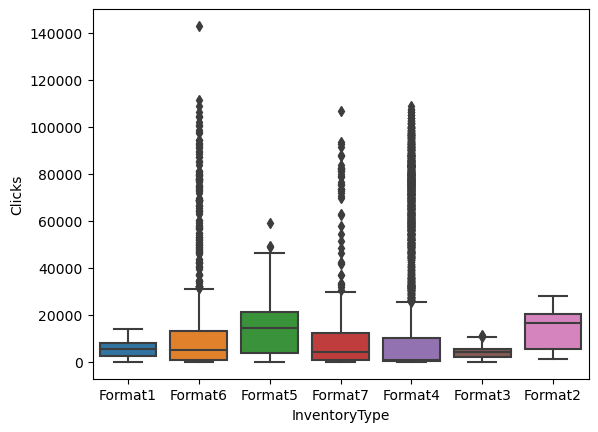

In [391]:
sns.boxplot(x='InventoryType', y='Clicks',data=df)

Observations -

* Outliers are observed in Format 3, 4, 5, 6, and 7.
* Excluding outliers, the highest number of clicks is observed in Format 5 and Format 2.
* Format 3 has the lowest number of clicks.

In [392]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

### Ad Type and CTR

<Axes: xlabel='Ad Type', ylabel='CTR'>

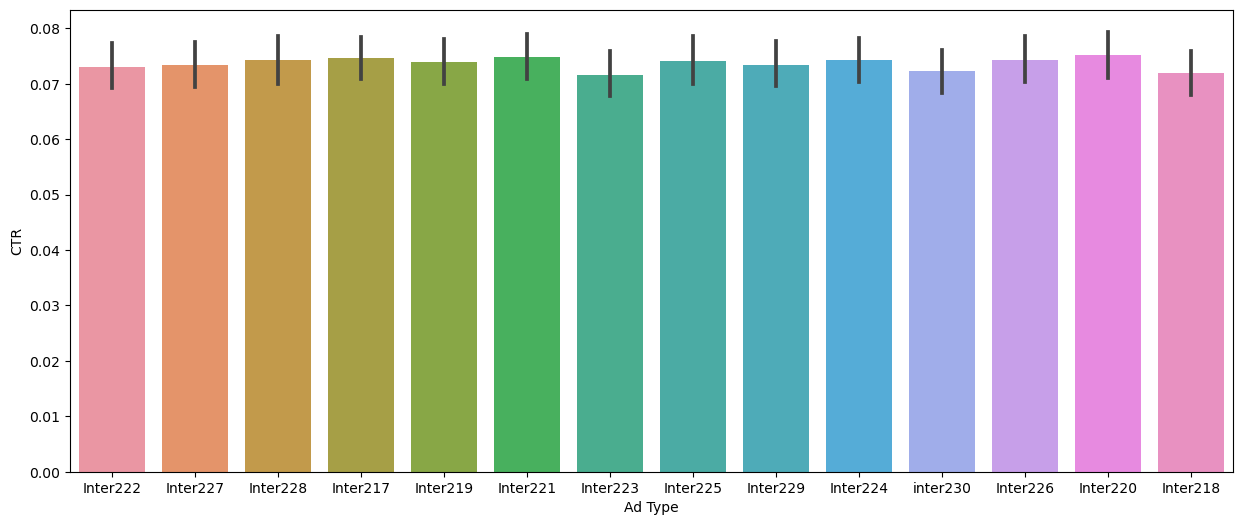

In [393]:
plt.figure(figsize=(15,6))
sns.barplot(x='Ad Type', y='CTR',data=df)

Observations -

* Most of the ad type have the same median in relation to CTR.
* Inter223 ad type have the lowest CTR.


### Platform and Revenue

<Axes: xlabel='Platform', ylabel='Revenue'>

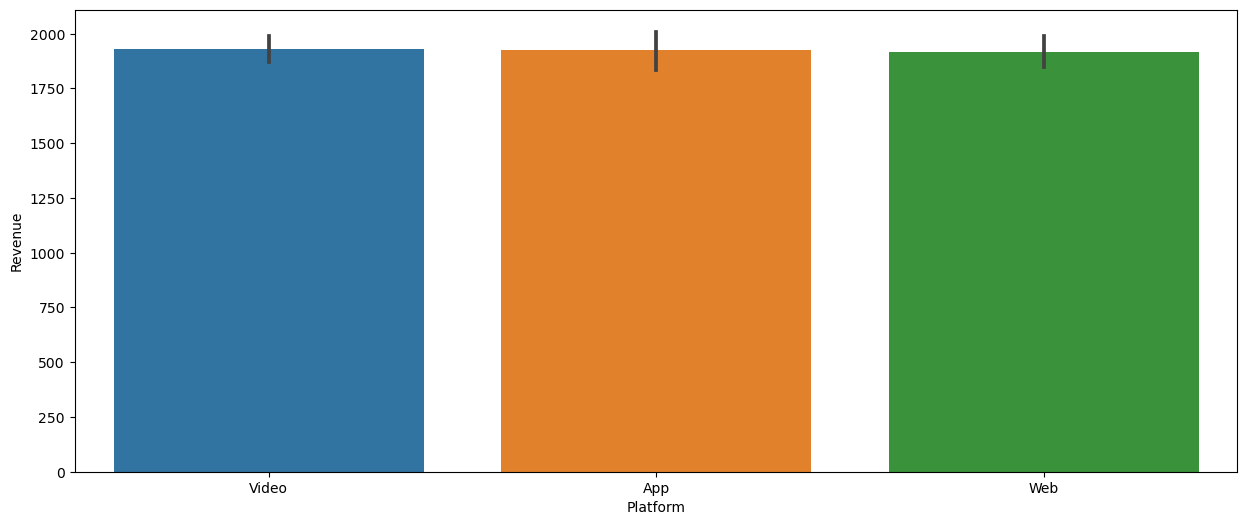

In [394]:
plt.figure(figsize=(15,6))
sns.barplot(x='Platform', y='Revenue',data=df)

Observations -

* The median revenue across different platforms does not show significant variation.
* There is a slightly lower revenue observed in the Web platform compared to the App and Video platforms.

### Device Type and CTR

<Axes: xlabel='Device Type', ylabel='CTR'>

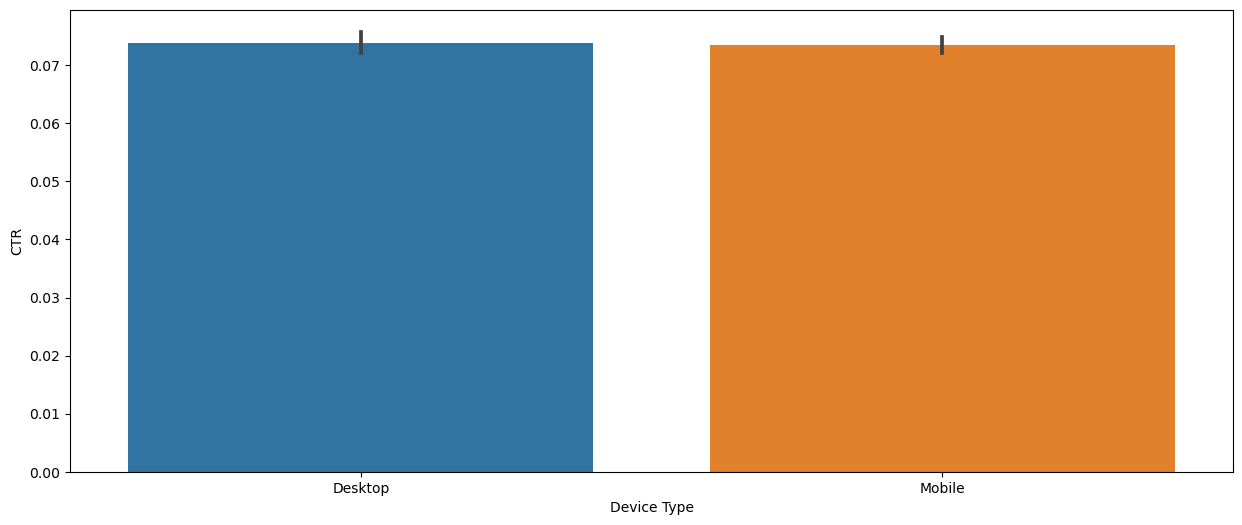

In [395]:
plt.figure(figsize=(15,6))
sns.barplot(x='Device Type', y='CTR',data=df)

Observations -

* There is not a significant difference in the median of the Click-Through Rate (CTR) across different devices.
* Mobile devices exhibit a slightly lower CTR compared to Desktop devices.

### Format and Clicks

<Axes: xlabel='Format', ylabel='Clicks'>

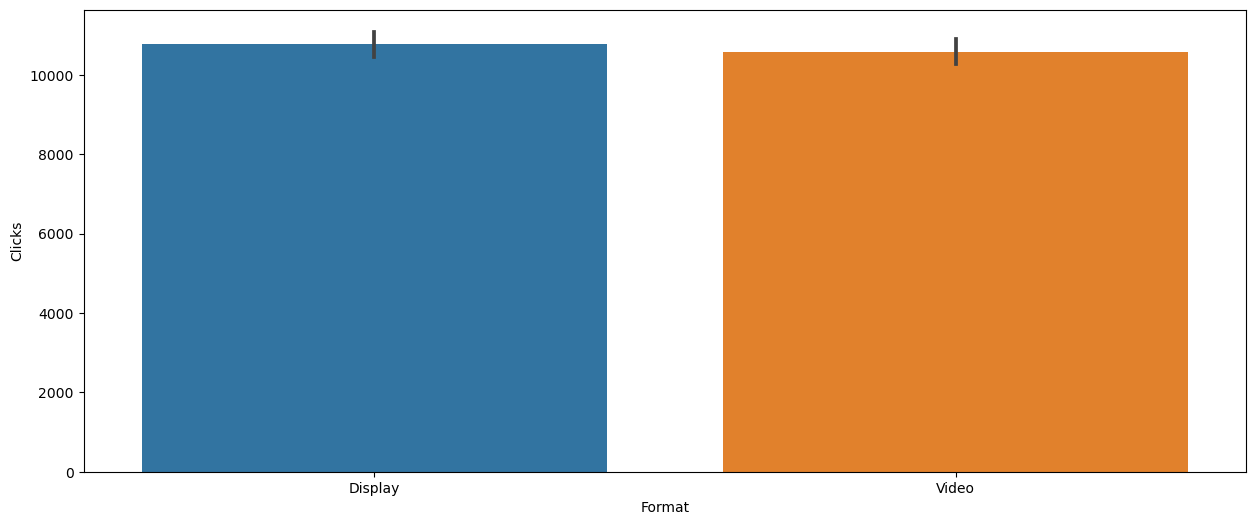

In [396]:
plt.figure(figsize=(15,6))
sns.barplot(x='Format', y='Clicks',data=df)

Insights - 
* There is not a significant difference in the median of the Clicks across different formats.
* Video format exhibit a slightly lower CTR compared to Display.

### Ad Type and Spend

<Axes: xlabel='Ad Type', ylabel='Spend'>

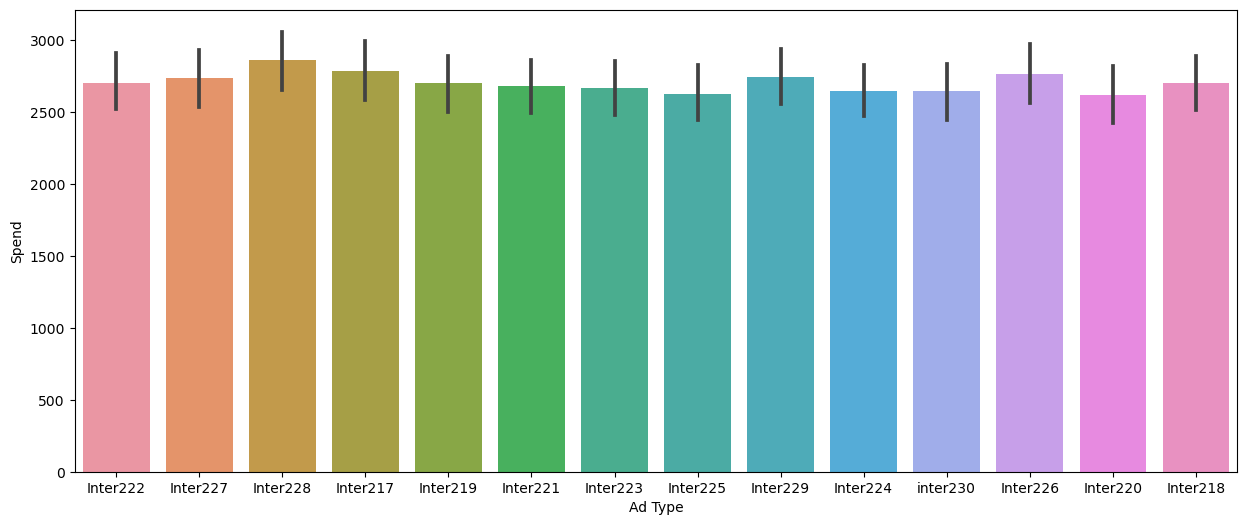

In [397]:
plt.figure(figsize=(15,6))
sns.barplot(x='Ad Type', y='Spend',data=df)

Insights

* The highest amount spent is on the ad type Inter228, while the lowest is on Inter225.
* There is not a significant difference in the median spending across different ad types.

## Missing value Treatment

In [398]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

### There are 4736 missing values in each of the columns: CTR, CPM, and CPC.

In [399]:
def calculate_cpm(x):
    Spend=df.Spend
    Impressions=df.Impressions
    cpm = (Spend/Impressions)*1000
    return cpm

In [400]:
def calculate_cpc(x):
    Spend=df.Spend
    Clicks=df.Clicks
    cpc=Spend/Clicks
    return cpc

In [401]:
def calculate_ctr(x):
    Impressions=df.Impressions
    Clicks=df.Clicks
    ctr=(Clicks/Impressions)*100
    return ctr

In [402]:
df['CPC']= df[['CPC']].apply(lambda x: calculate_cpc(x))

In [403]:
df['CPM']= df[['CPM']].apply(lambda x: calculate_cpm(x))

In [404]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_ctr(x))

In [405]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

The missing values have been treated as follows:

* For CPC: The missing values were imputed using the formula: Spend divided by Clicks.
* For CTR: The missing values were imputed using the formula: (Clicks divided by Impressions) multiplied by 100.
* For CPM: The missing values were imputed using the formula: (Spend divided by Impressions) multiplied by 1000.

## Outlier Treatment -

<Axes: >

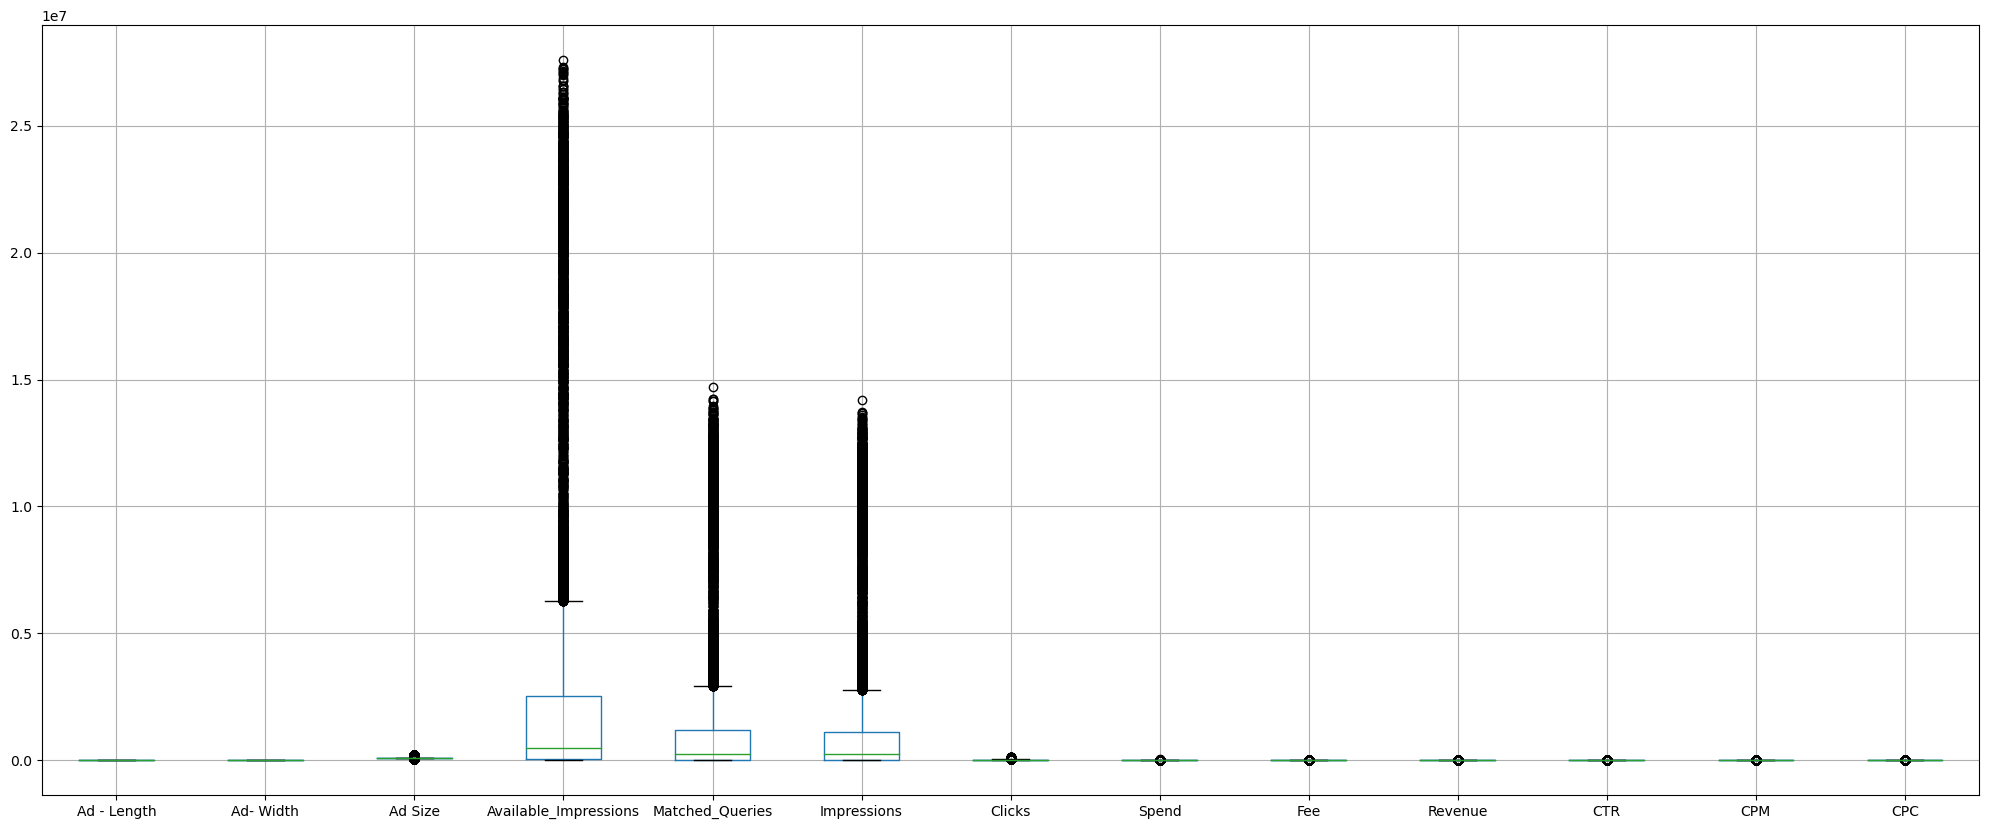

In [406]:
plt.figure(figsize=(25,10))
df.select_dtypes(include='number').boxplot()

## As can be seen, outliers are present in most variables except for Ad-Length and Ad-Width.

In [407]:
def outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [408]:
for i in df.columns:
    if df[i].dtypes!='object':
        lw,uw = outliers(df[i])
        out= ((df[i] < lw) | (df[i] > uw)).sum()
        print(f' The number of outliers in {i} is {out}')
        
        df[i]= np.where(df[i]<lw, lw, df[i])
        df[i] = np.where(df[i]>uw, uw, df[i])

 The number of outliers in Ad - Length is 0
 The number of outliers in Ad- Width is 0
 The number of outliers in Ad Size is 8448
 The number of outliers in Available_Impressions is 2378
 The number of outliers in Matched_Queries is 3192
 The number of outliers in Impressions is 3269
 The number of outliers in Clicks is 1691
 The number of outliers in Spend is 2081
 The number of outliers in Fee is 3517
 The number of outliers in Revenue is 2325
 The number of outliers in CTR is 275
 The number of outliers in CPM is 207
 The number of outliers in CPC is 585


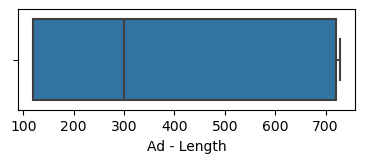

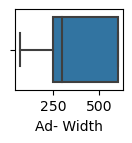

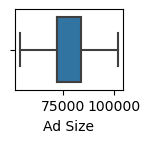

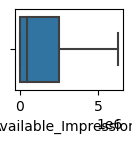

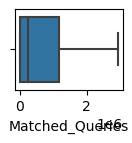

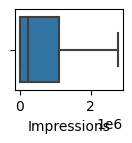

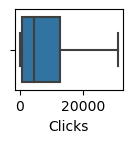

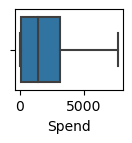

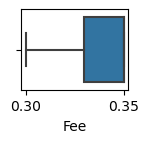

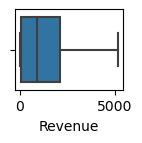

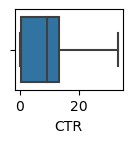

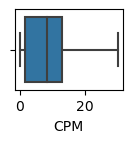

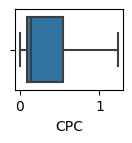

In [409]:
plt.figure(figsize=(20,6))

a=1
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(4,4,a)
        sns.boxplot(data=df, x=i)
        plt.show()
        a+=1

<Axes: >

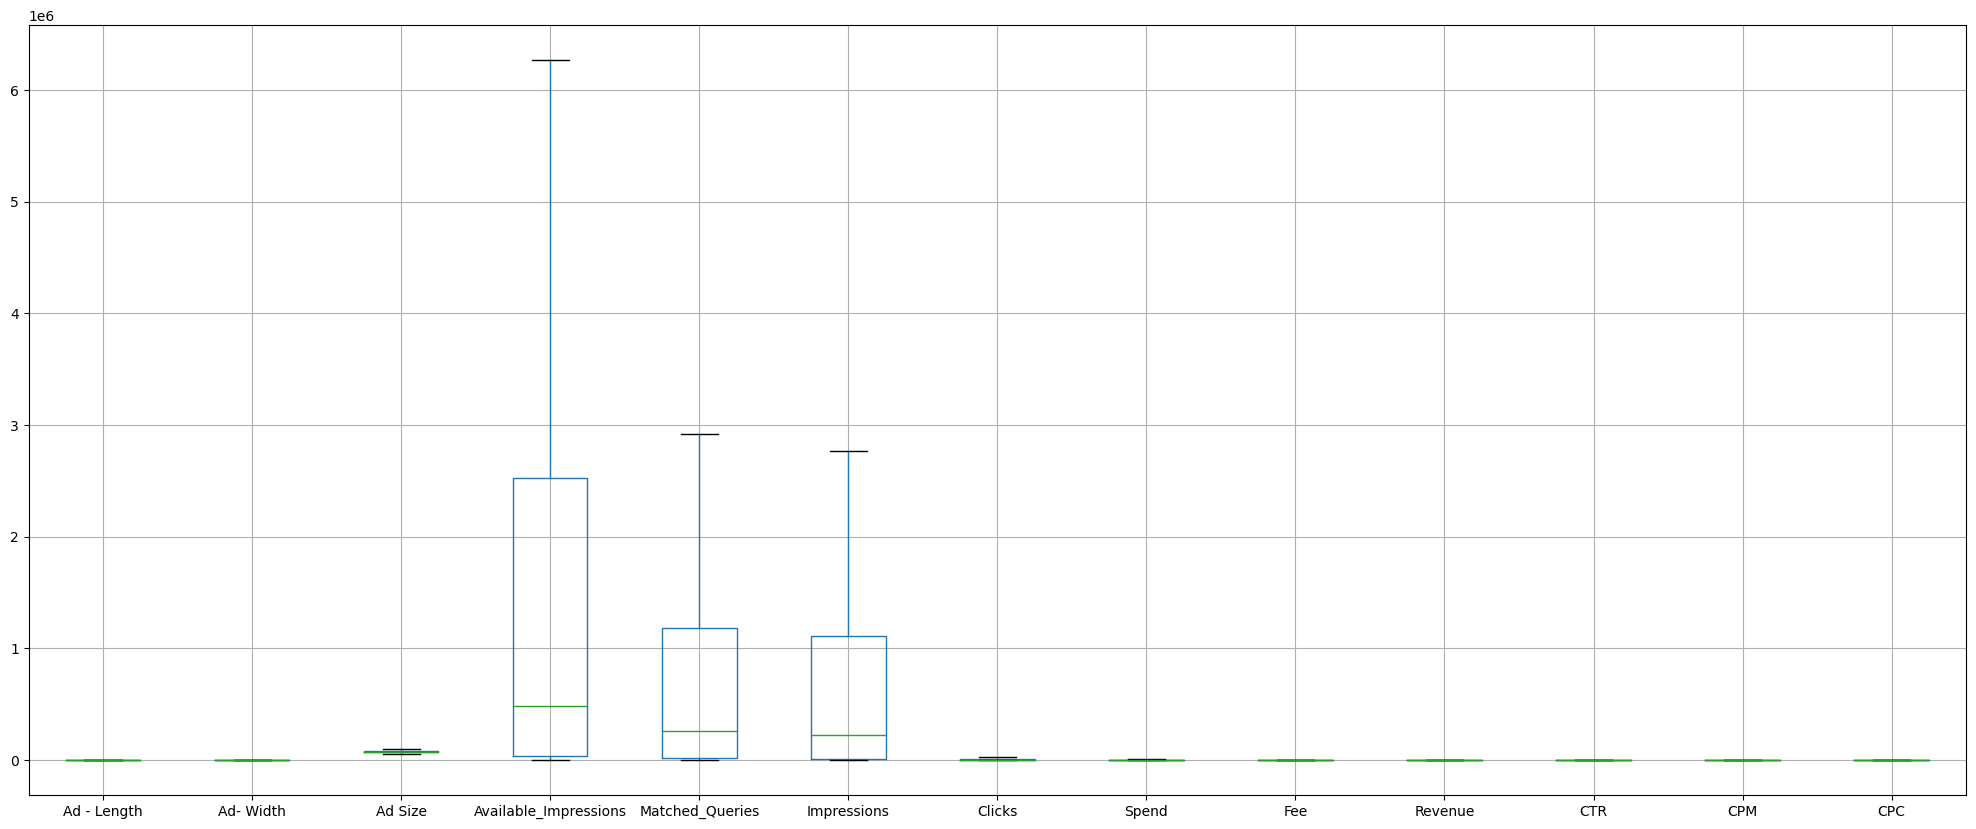

In [410]:
plt.figure(figsize=(25,10))
df.select_dtypes(include='number').boxplot()

## The outliers have been addressed for all the variables.

## Z-Score Scaling

In [411]:
df1= df.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'],axis=1)

We dropped 'Timestamp','InventoryType','Ad Type','Platform','Device Type'and 'Format' as there are categorical variables and for scaling we need only numerical variabels

### Dropping the unnecessary columns before performing scaling

In [412]:
df1

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0            300.0      250.0   75000.0                 1806.0   
1            300.0      250.0   75000.0                 1780.0   
2            300.0      250.0   75000.0                 2727.0   
3            300.0      250.0   75000.0                 2430.0   
4            300.0      250.0   75000.0                 1218.0   
...            ...        ...       ...                    ...   
23061        720.0      300.0  102000.0                    1.0   
23062        720.0      300.0  102000.0                    3.0   
23063        720.0      300.0  102000.0                    2.0   
23064        120.0      600.0   72000.0                    7.0   
23065        720.0      300.0  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
0                325.0        323.0     1.0   0.00  0.35   0.0000   0.309598   
1                285.0        285.0     1.0   0.00  0.35   0.0000   0.350877   
2                356.0        355.0     1.0   0.00  0.35   0.0000   0.281690   
3                497.0        495.0     1.0   0.00  0.35   0.0000   0.202020   
4                242.0        242.0     1.0   0.00  0.35   0.0000   0.413223   
...                ...          ...     ...    ...   ...      ...        ...   
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.278766   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.278766   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.278766   

             CPM   CPC  
0       0.000000  0.00  
1       0.000000  0.00  
2       0.000000  0.00  
3       0.000000  0.00  
4       0.000000  0.00  
...          ...   ...  
23061  29.981418  0.07  
23062  20.000000  0.04  
23063  29.981418  0.05  
23064  29.981418  0.07  
23065  29.981418  0.09  

[23066 rows x 13 columns]

In [413]:
from sklearn.preprocessing import StandardScaler

In [414]:
X = StandardScaler()

In [415]:
scaled_df = X.fit_transform(df1)

In [416]:
scaled_df = pd.DataFrame(X.fit_transform(df1.iloc[:,1:13]),columns=df1.columns[1:])

In [417]:
scaled_df

Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0      -0.432797 -0.102518              -0.755333        -0.778949   
1      -0.432797 -0.102518              -0.755345        -0.778988   
2      -0.432797 -0.102518              -0.754900        -0.778919   
3      -0.432797 -0.102518              -0.755040        -0.778781   
4      -0.432797 -0.102518              -0.755610        -0.779030   
...          ...       ...                    ...              ...   
23061  -0.186599  1.652896              -0.756182        -0.779265   
23062  -0.186599  1.652896              -0.756181        -0.779264   
23063  -0.186599  1.652896              -0.756182        -0.779265   
23064   1.290590 -0.297564              -0.756179        -0.779265   
23065  -0.186599  1.652896              -0.756182        -0.779264   

       Impressions    Clicks     Spend       Fee   Revenue       CTR  \
0        -0.768478 -0.867488 -0.893170  0.535724 -0.880093 -0.958836   
1        -0.768516 -0.867488 -0.893170  0.535724 -0.880093 -0.953835   
2        -0.768445 -0.867488 -0.893170  0.535724 -0.880093 -0.962218   
3        -0.768302 -0.867488 -0.893170  0.535724 -0.880093 -0.971871   
4        -0.768560 -0.867488 -0.893170  0.535724 -0.880093 -0.946281   
...            ...       ...       ...       ...       ...       ...   
23061    -0.768806 -0.867488 -0.893141  0.535724 -0.880066  3.035808   
23062    -0.768805 -0.867488 -0.893154  0.535724 -0.880078  3.035808   
23063    -0.768806 -0.867488 -0.893150  0.535724 -0.880074  3.035808   
23064    -0.768806 -0.867488 -0.893141  0.535724 -0.880066  3.035808   
23065    -0.768805 -0.867488 -0.893133  0.535724 -0.880058  3.035808   

            CPM       CPC  
0     -1.194498 -1.042561  
1     -1.194498 -1.042561  
2     -1.194498 -1.042561  
3     -1.194498 -1.042561  
4     -1.194498 -1.042561  
...         ...       ...  
23061  3.162718 -0.821435  
23062  1.712113 -0.916204  
23063  3.162718 -0.884614  
23064  3.162718 -0.821435  
23065  3.162718 -0.758256  

[23066 rows x 12 columns]

## Here are the values we get after scaling - 


### Z-score scaling, or standardization, can speed up the algorithm by reducing numerical instability, and improving regularization. It ensures consistent feature scales, leading to quicker optimization. Overall, z-score scaling helps algorithms converge faster and perform more efficiently.



## Part 1: Clustering: Hierarchical Clustering


In [418]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [419]:
wardlink = linkage(scaled_df,method = 'ward',metric='euclidean')

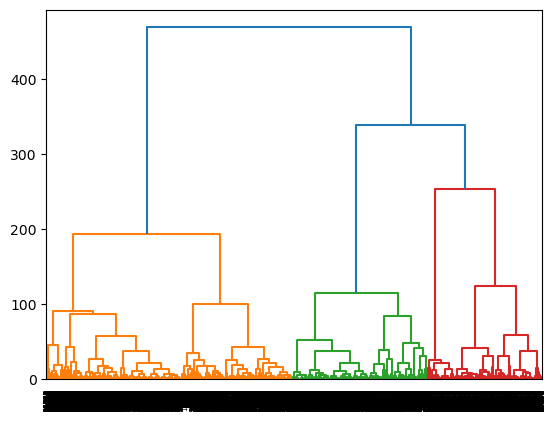

In [420]:
dend = dendrogram(wardlink)

## Dendrogram

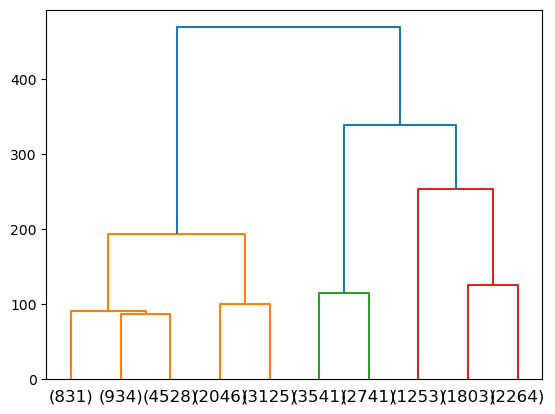

In [421]:
dend = dendrogram(wardlink, truncate_mode='lastp',p=10)

A dendrogram is a branching diagram that represents the relationships of similarity among a group of
entities. 

When interpreting a dendrogram, we can identify clusters by cutting the tree diagram at a certain height or distance. This cutting point determines the number of clusters formed. In this case, cutting the dendrogram at a height of 200 results in five distinct clusters.

The decision to cut the dendrogram at a height of 200 is typically based on visual inspection or statistical methods. By choosing this cutoff point, we ensure that the resulting clusters are sufficiently separated and meaningful. These clusters represent groups of data points that are more similar to each other than to data points in other clusters.

## Part 1: Clustering: K-means Clustering

## Creating Clusters using KMeans

## Forming 2 Clusters with K=2

In [422]:
from sklearn.cluster import KMeans

In [423]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [424]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

### We have successfully created two clusters using the k_means.fit function, as demonstrated earlier.

## Cluster Output for all the observations


### Once the clusters are formed, we can examine the labels using the k_means.labels_ function. Here is a representation of the labels:

In [425]:
# Get the labels
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

## Within Cluster Sum of Squares


In [426]:
round(k_means.inertia_,2)

161421.56

### Let's calculate the within sum of squares using the k_means.inertia_ function, which results in 161421.56. 

## Forming clusters with K = 1,3,4,5,6 and comparing the WSS


In [427]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

276792.0

In [428]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

108643.09

In [429]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

74262.29

In [430]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

54880.69

In [431]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

46875.62

### By forming clusters with k = 1, 3, 4, 5, and 6 and comparing the within sum of squares (WSS), we obtain the following values: 276792.0, 108643.09, 74262.29, 54880.69, 46875.62. It's evident that as the value of k increases, the WSS decreases.

## Calculating WSS for other values of K - Elbow Method


In [432]:
wss =[] 

In [433]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(round(KM.inertia_,2))

In [434]:
wss

[276792.0,
 161421.56,
 108643.09,
 74262.29,
 54880.69,
 46875.62,
 40700.97,
 35166.96,
 31376.51,
 28827.12]

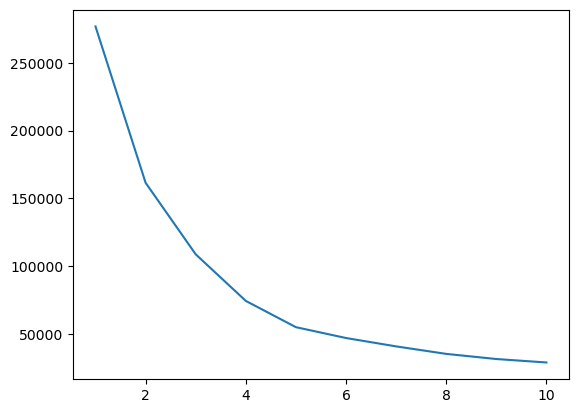

In [435]:
plt.plot(range(1,11), wss)

### To create an elbow plot, we first calculate the within sum of squares (WSS) for the values of k ranging from 1 to 11. Here are the corresponding WSS values: 276792.0, 161421.56, 108643.09, 74262.29, 54880.69, 46875.62, 40700.97, 35166.96, 31376.51, 28827.12. It's evident that as the value of k increases, the WSS decreases. 


## Silhouette Analysis

## Let us now find the Silhouette Score for the values of K from 2 to 10

In [436]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.41132031730541524
For n_clusters=3, the silhouette score is 0.4205087831535238
For n_clusters=4, the silhouette score is 0.4810503322233233
For n_clusters=5, the silhouette score is 0.48715956183236386
For n_clusters=6, the silhouette score is 0.4687836524231782
For n_clusters=7, the silhouette score is 0.4677204126882335
For n_clusters=8, the silhouette score is 0.45329565516602693
For n_clusters=9, the silhouette score is 0.44257201769453564
For n_clusters=10, the silhouette score is 0.443107260653314


### Silhouette score is highest for k = 5, among all values of k considered.
### silhouette score is better for 5 clusters than for 4 clusters. So, final clusters will be 5

## KMeans with K=5


In [437]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_


In [438]:
silhouette_score(scaled_df,labels,random_state=1)

0.4871609228513351

## Let's proceed with recalculating the labels for the 5 clusters. We'll assign each data point in our dataset to one of these clusters based on the clustering algorithm. This will allow us to append the cluster labels to our original dataframe for further analysis.

## Appending Clusters to the original dataset

### Here is how the dataframe looks after inserting the column of cluster labels.

In [439]:
df["Clus_kmeans5"] = labels
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1        300.0      250.0  75000.0  Inter222   
1  2020-9-2-10       Format1        300.0      250.0  75000.0  Inter227   
2  2020-9-1-22       Format1        300.0      250.0  75000.0  Inter222   
3  2020-9-3-20       Format1        300.0      250.0  75000.0  Inter228   
4  2020-9-4-15       Format1        300.0      250.0  75000.0  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                 1806.0            325.0   
1      App      Mobile    Video                 1780.0            285.0   
2    Video     Desktop  Display                 2727.0            356.0   
3    Video      Mobile    Video                 2430.0            497.0   
4      Web     Desktop    Video                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  Clus_kmeans5  
0        323.0     1.0    0.0  0.35      0.0  0.309598  0.0  0.0             2  
1        285.0     1.0    0.0  0.35      0.0  0.350877  0.0  0.0             2  
2        355.0     1.0    0.0  0.35      0.0  0.281690  0.0  0.0             2  
3        495.0     1.0    0.0  0.35      0.0  0.202020  0.0  0.0             2  
4        242.0     1.0    0.0  0.35      0.0  0.413223  0.0  0.0             2

# Cluster Profiling

### Here is the count of rows of different clusters in the dataset:

In [440]:
df.Clus_kmeans5.value_counts().sort_index()

Clus_kmeans5
0    5013
1    4072
2    6134
3    1524
4    6323
Name: count, dtype: int64

In [441]:
clust_profile=df.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans5').mean()
clust_profile['freq']=df.Clus_kmeans5.value_counts().sort_index()
clust_profile

Ad - Length   Ad- Width       Ad Size  Available_Impressions  \
Clus_kmeans5                                                                 
0              647.576302  314.083383  99887.492519           2.833491e+05   
1              464.952849  199.670923  72997.367387           5.686035e+06   
2              424.551679  142.590479  63499.347897           1.806281e+06   
3              140.401575  574.081365  73590.551181           8.083391e+05   
4              146.514629  578.333070  73807.211767           2.962067e+04   

              Matched_Queries   Impressions        Clicks        Spend  \
Clus_kmeans5                                                             
0                1.504502e+05  1.292525e+05  13503.117819  1226.823000   
1                2.802398e+06  2.667921e+06  11217.937377  5728.235982   
2                8.630091e+05  8.250218e+05   3248.226443  1497.807297   
3                5.686851e+05  4.796694e+05  30577.718176  6573.668780   
4                1.837731e+04  1.255656e+04   1851.916021   202.606424   

                   Fee      Revenue        CTR        CPM       CPC  freq  
Clus_kmeans5                                                               
0             0.349521   799.050362  12.248938  10.959629  0.100835  5013  
1             0.313369  3871.128178   0.217434   1.573890  0.748270  4072  
2             0.349299   975.821726   0.403064   1.786708  0.529613  6134  
3             0.305335  4490.869272  13.757394  15.416594  0.112095  1524  
4             0.349987   131.733063  16.439732  14.831498  0.101323  6323

### By performing a group by operation and calculating the mean of the Clus_kmeans5 column, we obtained the following results:

In [442]:
clust_profile.T

Clus_kmeans5                       0             1             2  \
Ad - Length               647.576302  4.649528e+02  4.245517e+02   
Ad- Width                 314.083383  1.996709e+02  1.425905e+02   
Ad Size                 99887.492519  7.299737e+04  6.349935e+04   
Available_Impressions  283349.118492  5.686035e+06  1.806281e+06   
Matched_Queries        150450.231797  2.802398e+06  8.630091e+05   
Impressions            129252.545183  2.667921e+06  8.250218e+05   
Clicks                  13503.117819  1.121794e+04  3.248226e+03   
Spend                    1226.823000  5.728236e+03  1.497807e+03   
Fee                         0.349521  3.133694e-01  3.492990e-01   
Revenue                   799.050362  3.871128e+03  9.758217e+02   
CTR                        12.248938  2.174335e-01  4.030643e-01   
CPM                        10.959629  1.573890e+00  1.786708e+00   
CPC                         0.100835  7.482696e-01  5.296129e-01   
freq                     5013.000000  4.072000e+03  6.134000e+03   

Clus_kmeans5                       3             4  
Ad - Length               140.401575    146.514629  
Ad- Width                 574.081365    578.333070  
Ad Size                 73590.551181  73807.211767  
Available_Impressions  808339.110236  29620.666930  
Matched_Queries        568685.078740  18377.310296  
Impressions            479669.387139  12556.560177  
Clicks                  30577.718176   1851.916021  
Spend                    6573.668780    202.606424  
Fee                         0.305335      0.349987  
Revenue                  4490.869272    131.733063  
CTR                        13.757394     16.439732  
CPM                        15.416594     14.831498  
CPC                         0.112095      0.101323  
freq                     1524.000000   6323.000000

### Let's utilize the above information to plot some graphs for insights and observations.

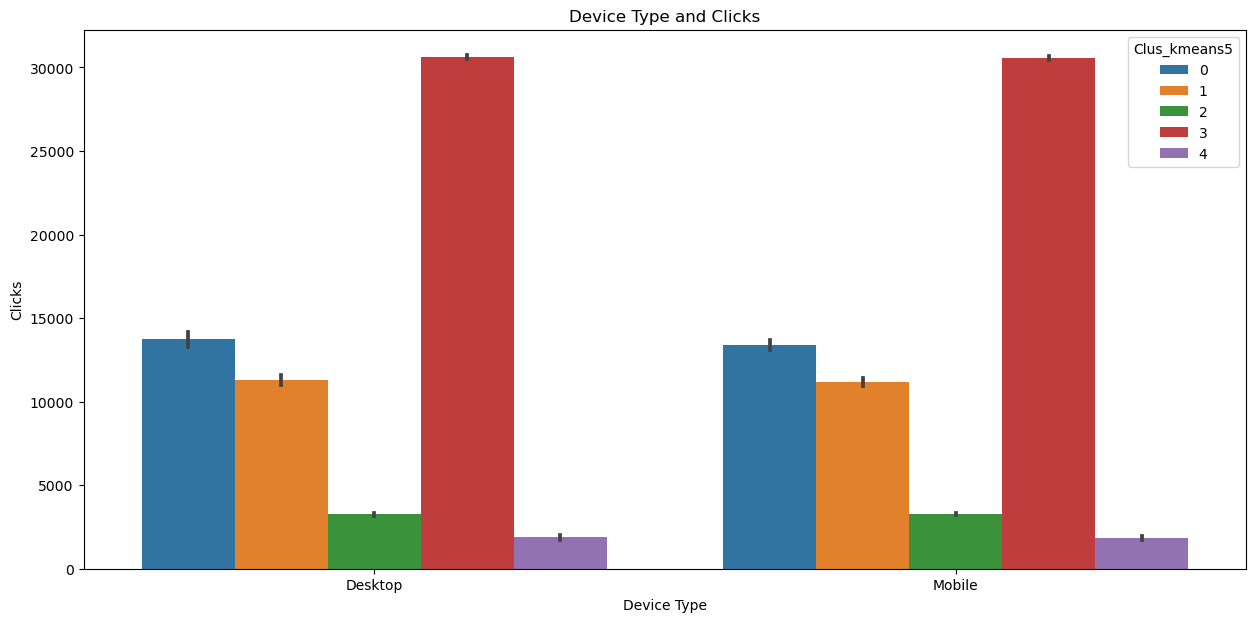

In [443]:
plt.figure(figsize=(15,7))
sns.barplot(x='Device Type',y='Clicks',data=df, hue='Clus_kmeans5')
plt.title("Device Type and Clicks")
plt.show()

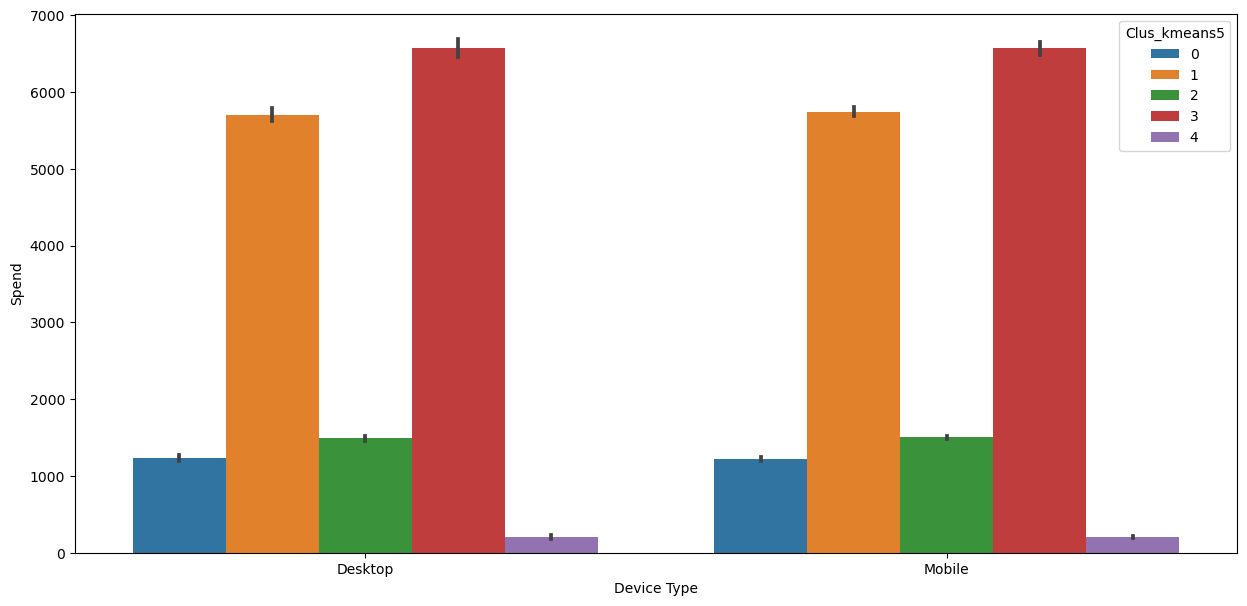

In [444]:
plt.figure(figsize=(15,7))
sns.barplot(x='Device Type',y='Spend',data=df, hue='Clus_kmeans5')
plt.show()

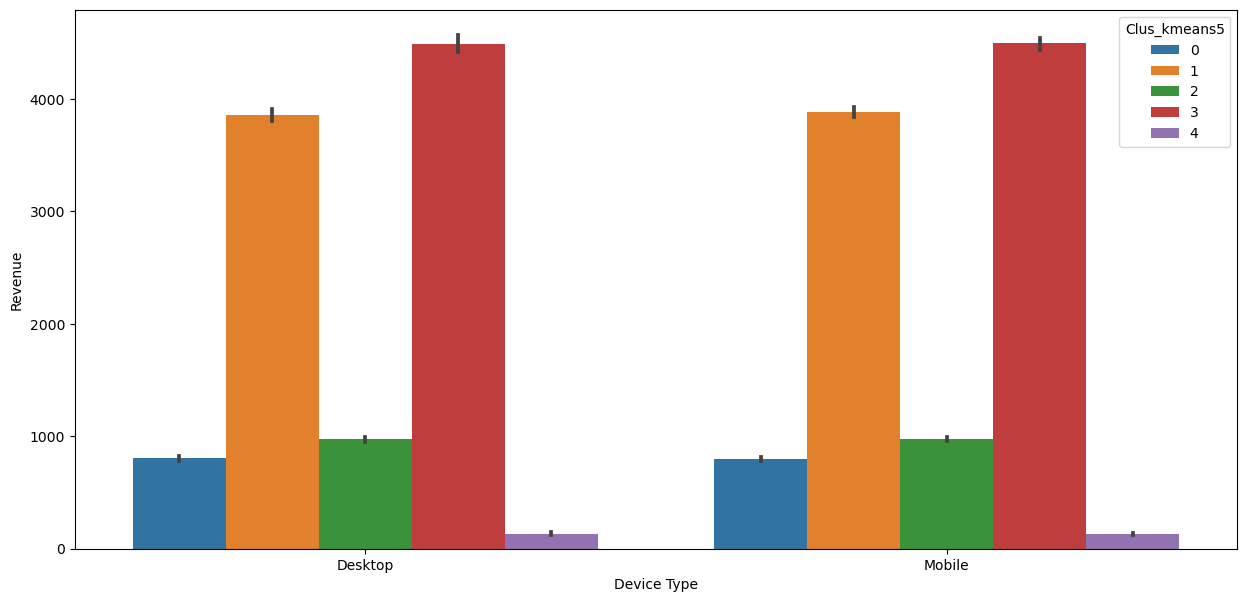

In [445]:
plt.figure(figsize=(15,7))
sns.barplot(x='Device Type',y='Revenue',data=df, hue='Clus_kmeans5')
plt.show()

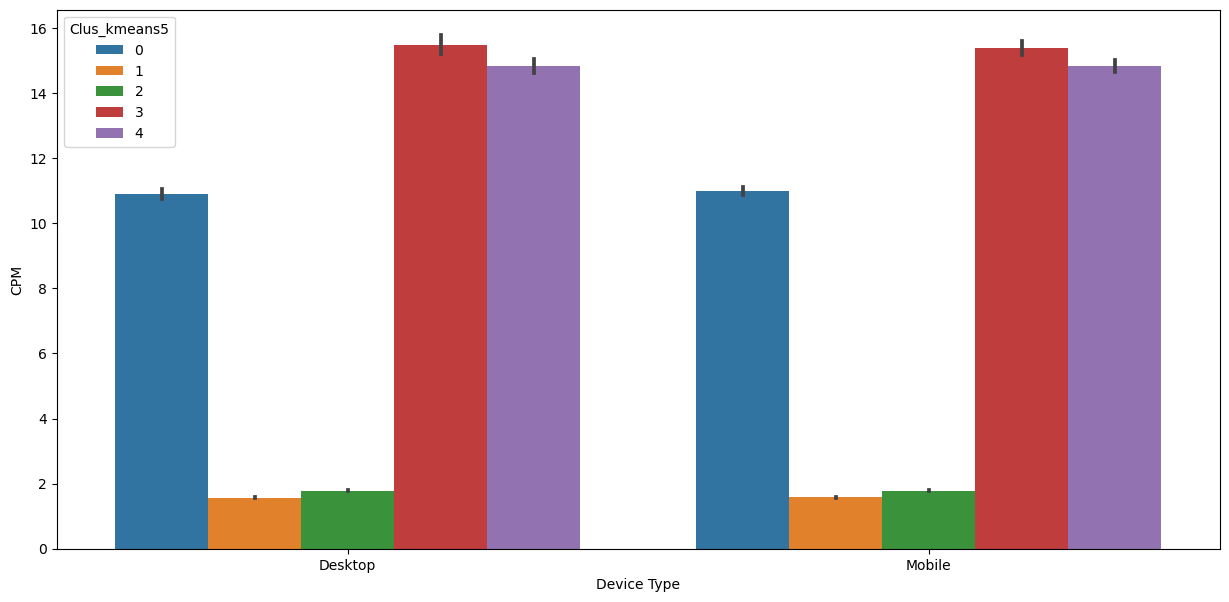

In [446]:
plt.figure(figsize=(15,7))
sns.barplot(x='Device Type',y='CPM',data=df, hue='Clus_kmeans5')
plt.show()

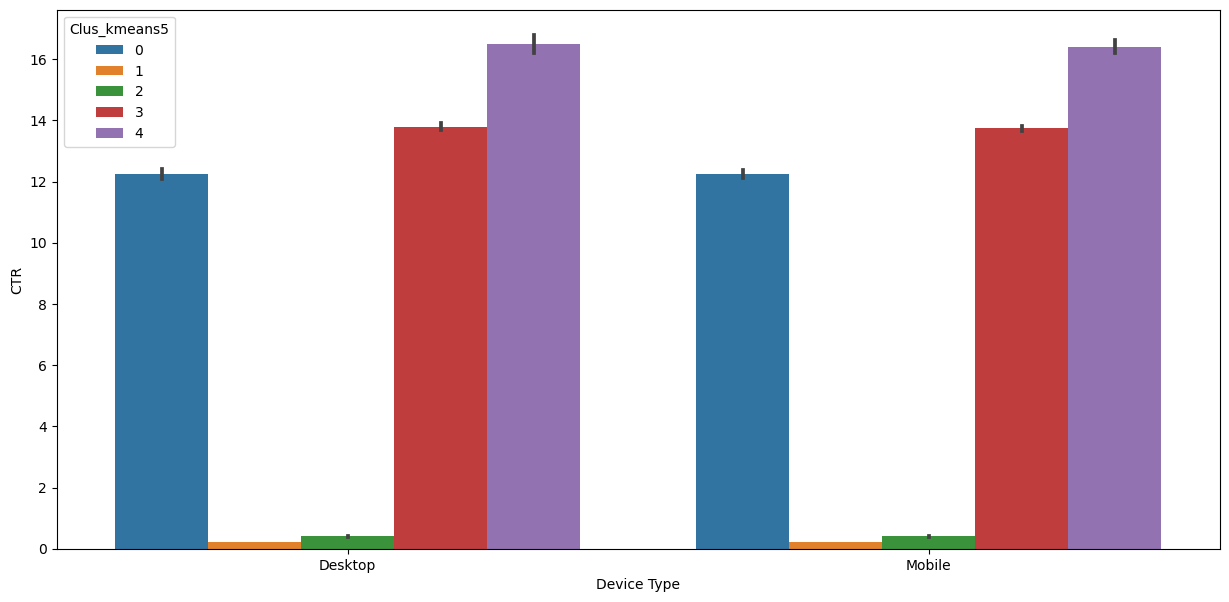

In [447]:
plt.figure(figsize=(15,7))
sns.barplot(x='Device Type',y='CTR',data=df, hue='Clus_kmeans5')
plt.show()

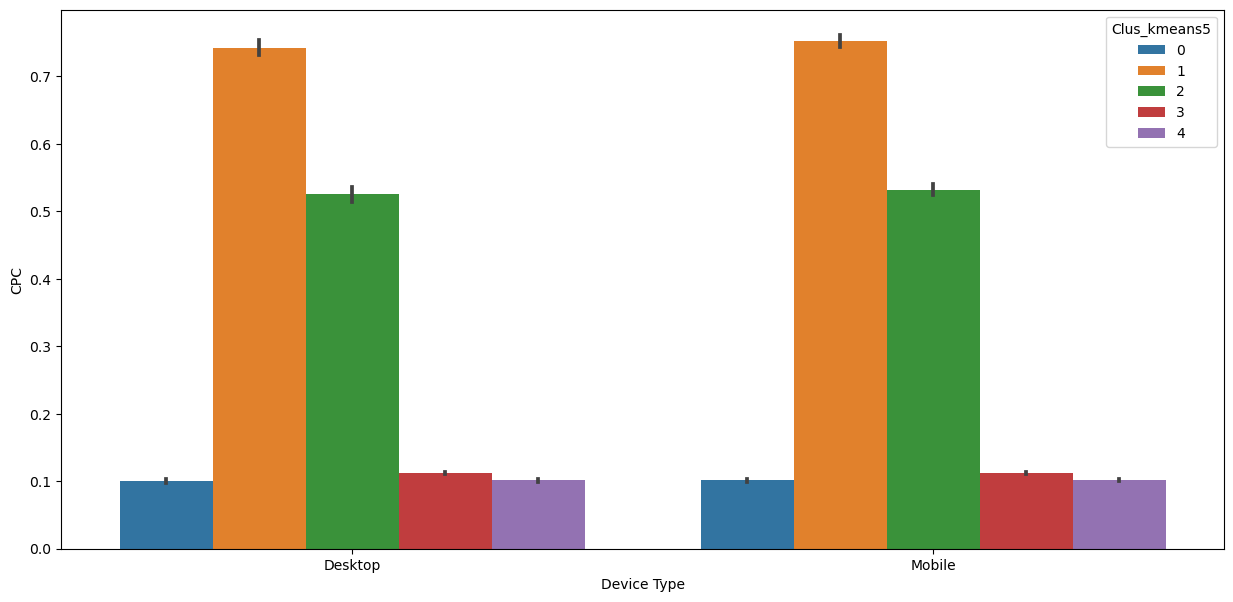

In [448]:
plt.figure(figsize=(15,7))
sns.barplot(x='Device Type',y='CPC',data=df, hue='Clus_kmeans5')
plt.show()

Insights -

* Cluster 3 has the highest click count on both platforms, while Cluster 4 has the lowest.
* The top spend is observed in Cluster 1 and 2, with the lowest spend in Cluster 4.
* CPM is lowest in Cluster 1 and highest in Clusters 3 and 4.
* There is minimal variation in performance and other specifics among different device types.
* CTR is highest in Cluster 4 and lowest in Cluster 1.
* CPC is highest in Cluster 1 and lowest in Cluster 4 and 0.


## Recommendations -

* Target High-Performing Clusters: Focus on targeting audiences within Cluster 3, which shows the highest click count on both platforms. Allocate a significant portion of the marketing budget towards campaigns aimed at engaging users in this cluster.

* Budget Allocation: Allocate more budget towards campaigns targeting Clusters 1 and 2, which exhibit the highest spend. However, ensure that a portion of the budget is also reserved for targeting Cluster 4 to improve engagement and drive conversions.

* Monitor CPC: Keep a close eye on CPC trends across clusters and adjust bidding strategies accordingly. Since Cluster 1 exhibits the highest CPC, explore opportunities to improve ad relevance and quality score to lower costs.

Summary -

* Missing Values: There are 4736 missing values in each of the columns: CTR, CPM, and CPC.

* Hierarchical Clustering: We perform hierarchical clustering and cut the dendrogram at a height of 200. This cutoff point ensures that resulting clusters are sufficiently separated and meaningful, representing groups of data points that are more similar to each other than to data points in other clusters.

* K-Means Clustering: We also performed k-means clustering and formed clusters with K = 1, 3, 4, 5, and 6. By comparing the within sum of squares (WSS), we observed that as the value of k increases, the WSS decreases.

* Silhouette Score: We calculated the Silhouette score for different values of k and found that the highest score was for k = 5, indicating that this is the optimal number of clusters among those considered.

* Label Assignment: We calculated the labels for 5 clusters using k-means clustering and appended them to our dataframe as new columns.

* Cluster Profiling: After assigning labels, we conducted cluster profiling by analyzing mean values of clusters. This analysis provided insights and recommendations for optimizing digital marketing strategies and budget allocation based on the characteristics of each cluster.



# Problem Statement -

## PCA:

## PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.

## Data Dictionary

* Name - Description
* State - State Code
* District - District Code
* Name - Name
* TRU1 - Area Name
* No_HH - No of Household
* TOT_M - Total population Male
* TOT_F - Total population Female
* M_06 - Population in the age group 0-6 Male
* F_06 - Population in the age group 0-6 Female
* M_SC - Scheduled Castes population Male
* F_SC - Scheduled Castes population Female
* M_ST - Scheduled Tribes population Male
* F_ST - Scheduled Tribes population Female
* M_LIT - Literates population Male
* F_LIT - Literates population Female
* M_ILL - Illiterate Male
* F_ILL - Illiterate Female
* TOT_WORK_M - Total Worker Population Male
* TOT_WORK_F - Total Worker Population Female
* MAINWORK_M - Main Working Population Male
* MAINWORK_F - Main Working Population Female
* MAIN_CL_M - Main Cultivator Population Male
* MAIN_CL_F - Main Cultivator Population Female
* MAIN_AL_M - Main Agricultural Labourers Population Male
* MAIN_AL_F - Main Agricultural Labourers Population Female
* MAIN_HH_M - Main Household Industries Population Male
* MAIN_HH_F - Main Household Industries Population Female
* MAIN_OT_M - Main Other Workers Population Male
* MAIN_OT_F - Main Other Workers Population Female
* MARGWORK_M - Marginal Worker Population Male
* MARGWORK_F - Marginal Worker Population Female
* MARG_CL_M - Marginal Cultivator Population Male
* MARG_CL_F - Marginal Cultivator Population Female
* MARG_AL_M - Marginal Agriculture Labourers Population Male
* MARG_AL_F - Marginal Agriculture Labourers Population Female
* MARG_HH_M - Marginal Household Industries Population Male
* MARG_HH_F - Marginal Household Industries Population Female
* MARG_OT_M - Marginal Other Workers Population Male
* MARG_OT_F- Marginal Other Workers Population Female
* MARGWORK_3_6_M - Marginal Worker Population 3-6 Male
* MARGWORK_3_6_F - Marginal Worker Population 3-6 Female
* MARG_CL_3_6_M - Marginal Cultivator Population 3-6 Male
* MARG_CL_3_6_F - Marginal Cultivator Population 3-6 Female
* MARG_AL_3_6_M - Marginal Agriculture Labourers Population 3-6 Male
* MARG_AL_3_6_F - Marginal Agriculture Labourers Population 3-6 Female
* MARG_HH_3_6_M - Marginal Household Industries Population 3-6 Male
* MARG_HH_3_6_F - Marginal Household Industries Population 3-6 Female
* MARG_OT_3_6_M - Marginal Other Workers Population Person 3-6 Male
* MARG_OT_3_6_F - Marginal Other Workers Population Person 3-6 Female
* MARGWORK_0_3_M - Marginal Worker Population 0-3 Male
* MARGWORK_0_3_F - Marginal Worker Population 0-3 Female
* MARG_CL_0_3_M - Marginal Cultivator Population 0-3 Male
* MARG_CL_0_3_F - Marginal Cultivator Population 0-3 Female
* MARG_AL_0_3_M - Marginal Agriculture Labourers Population 0-3 Male
* MARG_AL_0_3_F - Marginal Agriculture Labourers Population 0-3 Female
* MARG_HH_0_3_M - Marginal Household Industries Population 0-3 Male
* MARG_HH_0_3_F - Marginal Household Industries Population 0-3 Female
* MARG_OT_0_3_M - Marginal Other Workers Population 0-3 Male
* MARG_OT_0_3_F - Marginal Other Workers Population 0-3 Female
* NON_WORK_M - Non Working Population Male
* NON_WORK_F - Non Working Population Female

## Loading  and Understanding the Structure of the Data

In [449]:
df =pd.read_excel('PCA+India+Data_Census.xlsx')

In [450]:
df.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [451]:
df.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [453]:
df.shape

(640, 61)

## Structure of the Data:
● Number of Rows: 640

● Number of Columns: 60

● Memory Usage: 305.1+ KB

● Range Index: 0 to 639

● Data Types: Integer, Object

## Data Type:

The different datatypes in the dataset are as follows

a.There are 59 columns in the with int64 data type

b.There are 2 columns in the with object data type

## Statistical Summary

In [454]:
df.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

Observations:

* Gender Disparity in Workforce: The average count of male workers (MAINWORK_M) is higher than that of female workers (MAINWORK_F), indicating a gender disparity in the workforce.

* Education Disparity: The average count of illiterate females (F_ILL) is significantly higher than that of illiterate males (M_ILL), suggesting a disparity in education levels between genders.

* Non-Working Population: The average count of non-working females (NON_WORK_F) is higher than that of non-working males (NON_WORK_M), indicating a higher proportion of females not engaged in work.

* Total Working Population: Despite the higher count of non-working females, the total average female workers (TOT_WORK_F) outnumber male workers (TOT_WORK_M), suggesting that a larger proportion of females are engaged in work compared to males.

* Marginal Employment: In categories such as Marginal Agricultural Labourer and Marginal household industries, females have a higher average count than males in both the 0-3 and 3-6 brackets, indicating a higher participation of females in marginal employment sectors.

## Exploratory Data Analysis

### For exploratory Data analysis, We are informed to pick out 5 variables, Here are the ones I am taking as follows -

### TOT_WORK_M, TOT_WORK_F, M_LIT, F_LIT, No_HH



## Univariate Analysis

In [455]:
column=[df.TOT_WORK_M, df.TOT_WORK_F, df.M_LIT, df.F_LIT, df.No_HH]

TOT_WORK_M
Skew : 2.3


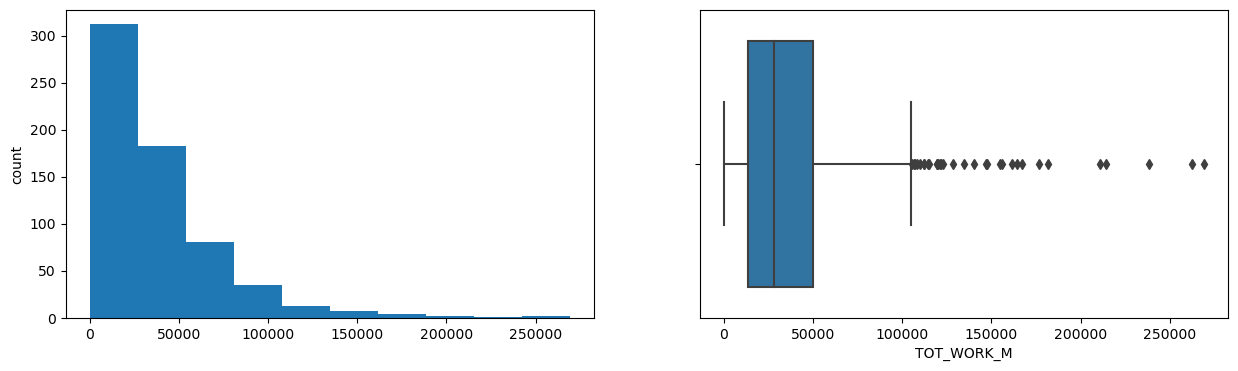

TOT_WORK_F
Skew : 1.93


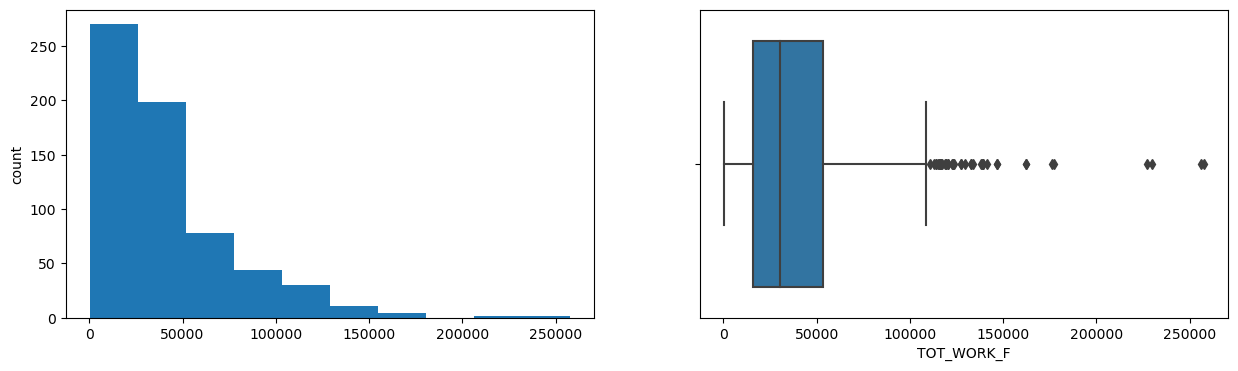

M_LIT
Skew : 2.34


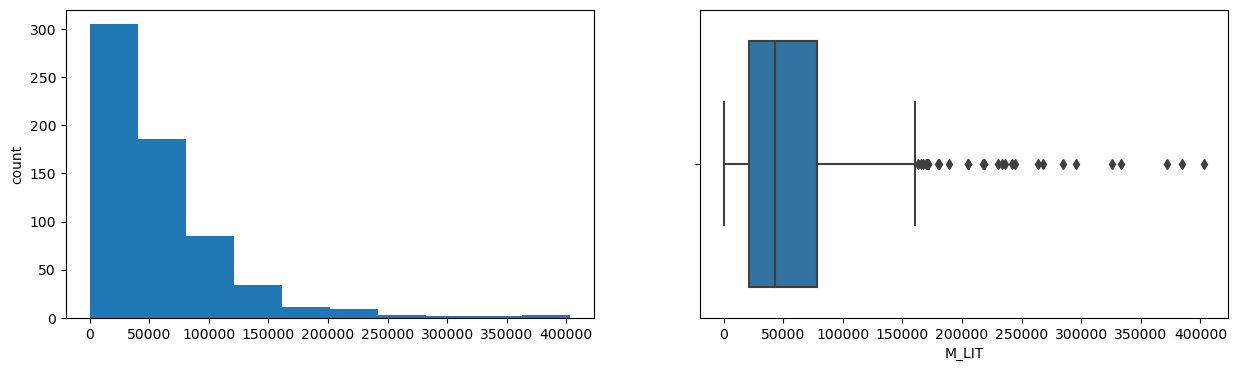

F_LIT
Skew : 3.15


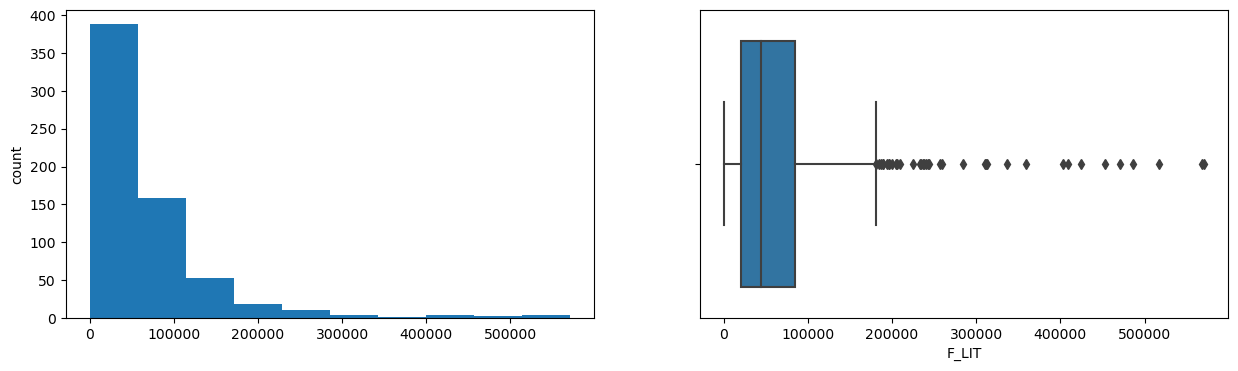

No_HH
Skew : 2.02


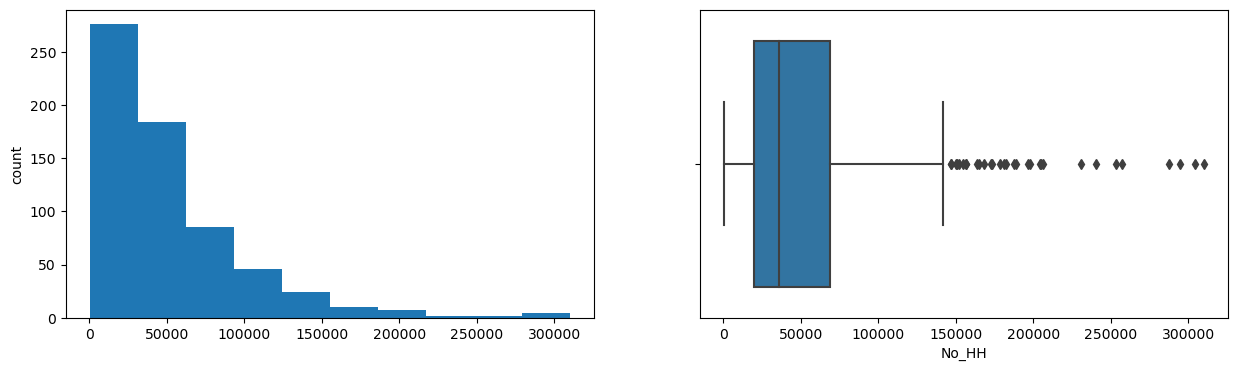

In [456]:
for i in column:
    print(i.name)
    print('Skew :',round(i.skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    i.hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=i)
    plt.show()

Observations -

* Maximum Skewness in Female Literacy: Female literacy exhibits the highest skewness among all the five variables, indicating     that the distribution of female literacy rates may be more positively or negatively skewed compared to the other variables.

* Presence of Outliers: All five variables show the presence of outliers, suggesting that there are data points that      significantly deviate from the typical range of values for each variable. These outliers may require further investigation to understand their impact on the analysis.

* Household Distribution: Approximately 75% of the total number of households fall below 80000, indicating that a significant proportion of households have relatively low counts.

* Literacy Levels: The 75th percentile of female literacy lies below 90000, while for male literacy, it lies below 80000. This suggests that a larger proportion of females are literate compared to males, as indicated by the higher literacy rate threshold for females.

## Bivariate Analysis

In [457]:
df1 = df[['F_LIT','M_LIT','TOT_WORK_F','TOT_WORK_M','No_HH']]

In [458]:
df1

F_LIT  M_LIT  TOT_WORK_F  TOT_WORK_M  No_HH
0    11364  13381        3752        6723   7707
1     7891  10513        4200        6982   6218
2     5840   4534        4800        2775   4452
3     1962   1842        1118        1002   1320
4    13477  13243        7692        5717  11654
..     ...    ...         ...         ...    ...
635  10184   6916        1328        3808   3333
636  14225  10292        5286        6458  10612
637   1602   1187        1031         715   1275
638   5273   4206        2174        2707   3762
639  13362  10095        5278        6345   7975

[640 rows x 5 columns]

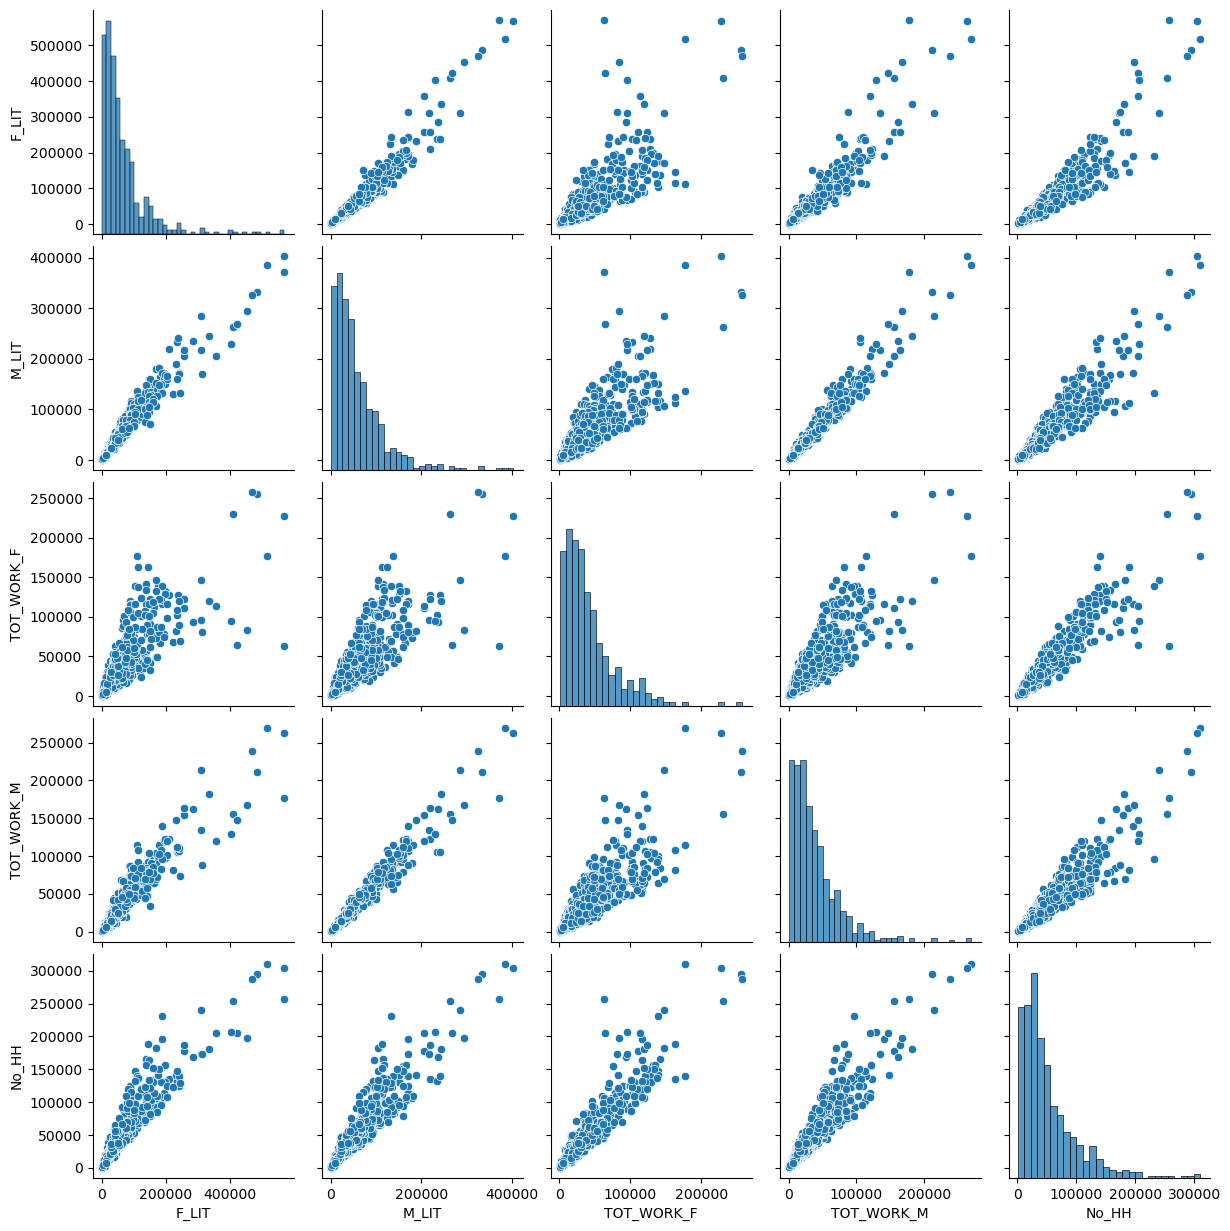

In [459]:
sns.pairplot(df1)

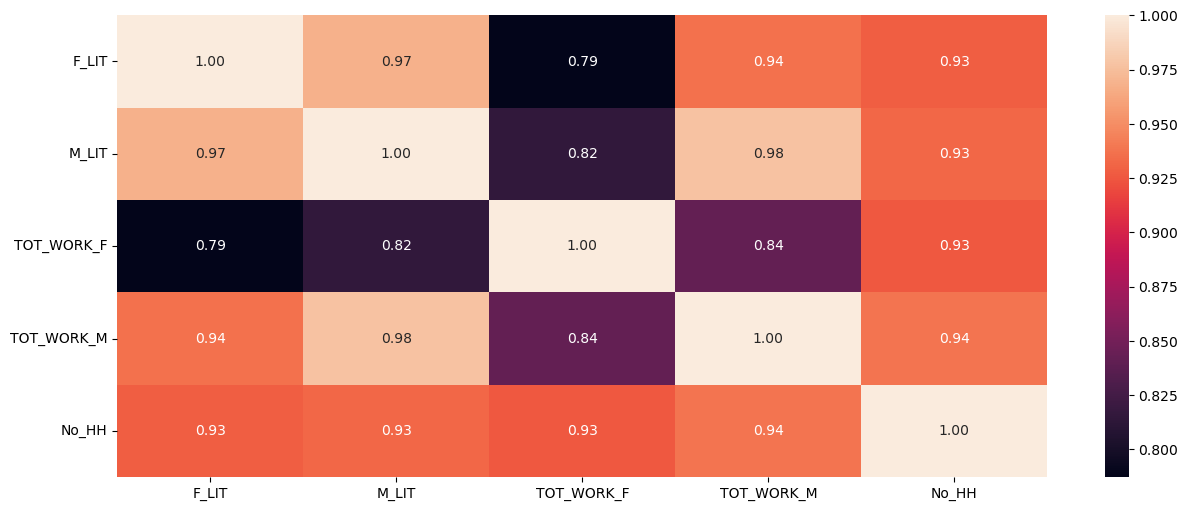

In [460]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(), annot = True, fmt = ".2f");

Observations - 

* High Correlation with Household Count: There is a notable correlation between the total number of working males and females with the number of households. This suggests that areas with higher household counts tend to have more individuals in the workforce, both male and female.

* Density of Points: The density plot indicates a concentration of data points below a threshold of 200000 for both total working males and females. This implies that a significant portion of observations falls within this range, reflecting the distribution of the workforce across different regions or demographic groups.

* Correlation between Female Literacy and Workforce: There is a strong positive correlation (0.79) between the count of literate females and the total number of working females. This indicates that areas with higher female literacy rates tend to have more women participating in the workforce.

* Highest Correlation between Literacy Counts: The highest correlation is observed between the counts of literate females and literate males. This suggests a strong relationship between male and female literacy levels within the dataset.

* Distribution of Female Literacy and Workforce: The majority of observations in the plot of female literacy count versus total working females lie below the threshold of 150000 total working females. This highlights that a significant proportion of regions or demographic groups have a relatively lower number of working females despite varying levels of female literacy.

# (i) Which state has highest gender ratio and which has the lowest?

# (ii) Which district has the highest & lowest gender ratio?

In [461]:
df3=df.copy()
df3['Gender_ratio']= df3['TOT_F']/df3['TOT_M']

In [462]:

# Group data by 'State' and calculate the mean of 'GenderRatio'
state_gender_ratio_mean = df3.groupby('State')['Gender_ratio'].mean()
# Find the state with the highest and lowest mean gender ratio
state_highest_gender_ratio = state_gender_ratio_mean.idxmax()
state_Lowest_gender_ratio = state_gender_ratio_mean.idxmin()
# Print the results
print ("State with highest gender ratio:", state_highest_gender_ratio)
print ("State with lowest gender ratio:", state_Lowest_gender_ratio)
[72] # Group data by Area Name' and calculate the mean

State with highest gender ratio: Andhra Pradesh
State with lowest gender ratio: Lakshadweep


[72]

# Part 2: PCA: Data Preprocessing


## Missing values

## No missing values are present in the dataset, as indicated below.

In [463]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

## Data Irregularities

In [464]:
df.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

### Upon reviewing the statistical summary and examining the minimum and maximum values of the variables, no bad data or irregularities were observed. Therefore, no treatment is required for these variables.

# Data Pre-processing before Scaling

In [465]:
drop_df=df.drop(['Area Name','State'], axis=1)

In [466]:
drop_df.head()

State Code  Dist.Code  No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  \
0           1          1   7707  23388  29796  5862  6196     3     0  1999   
1           1          2   6218  19585  23102  4482  3733     7     6   427   
2           1          3   4452   6546  10964  1082  1018     3     6  5806   
3           1          4   1320   2784   4206   563   677     0     0  2666   
4           1          5  11654  20591  29981  5157  4587    20    33  7670   

   ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0  ...           1150            749            180            237   
1  ...            525            715            123            229   
2  ...            114            188             44             89   
3  ...            194            247             61            128   
4  ...            874           1928            465           1043   

   MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0            680            252             32             46         258   
1            186            148             76            178         140   
2              3             34              0              4          67   
3             13             50              4             10         116   
4            205            302             24            105         180   

   NON_WORK_F  
0         214  
1         160  
2          61  
3          59  
4         478  

[5 rows x 59 columns]

## Prior to scaling, it's necessary to drop the categorical variables from the dataset because scaling operations can only be applied to numerical columns. So, we are dropping 'Area Name' and 'State'. 

# Visualization ( Before Scaling )

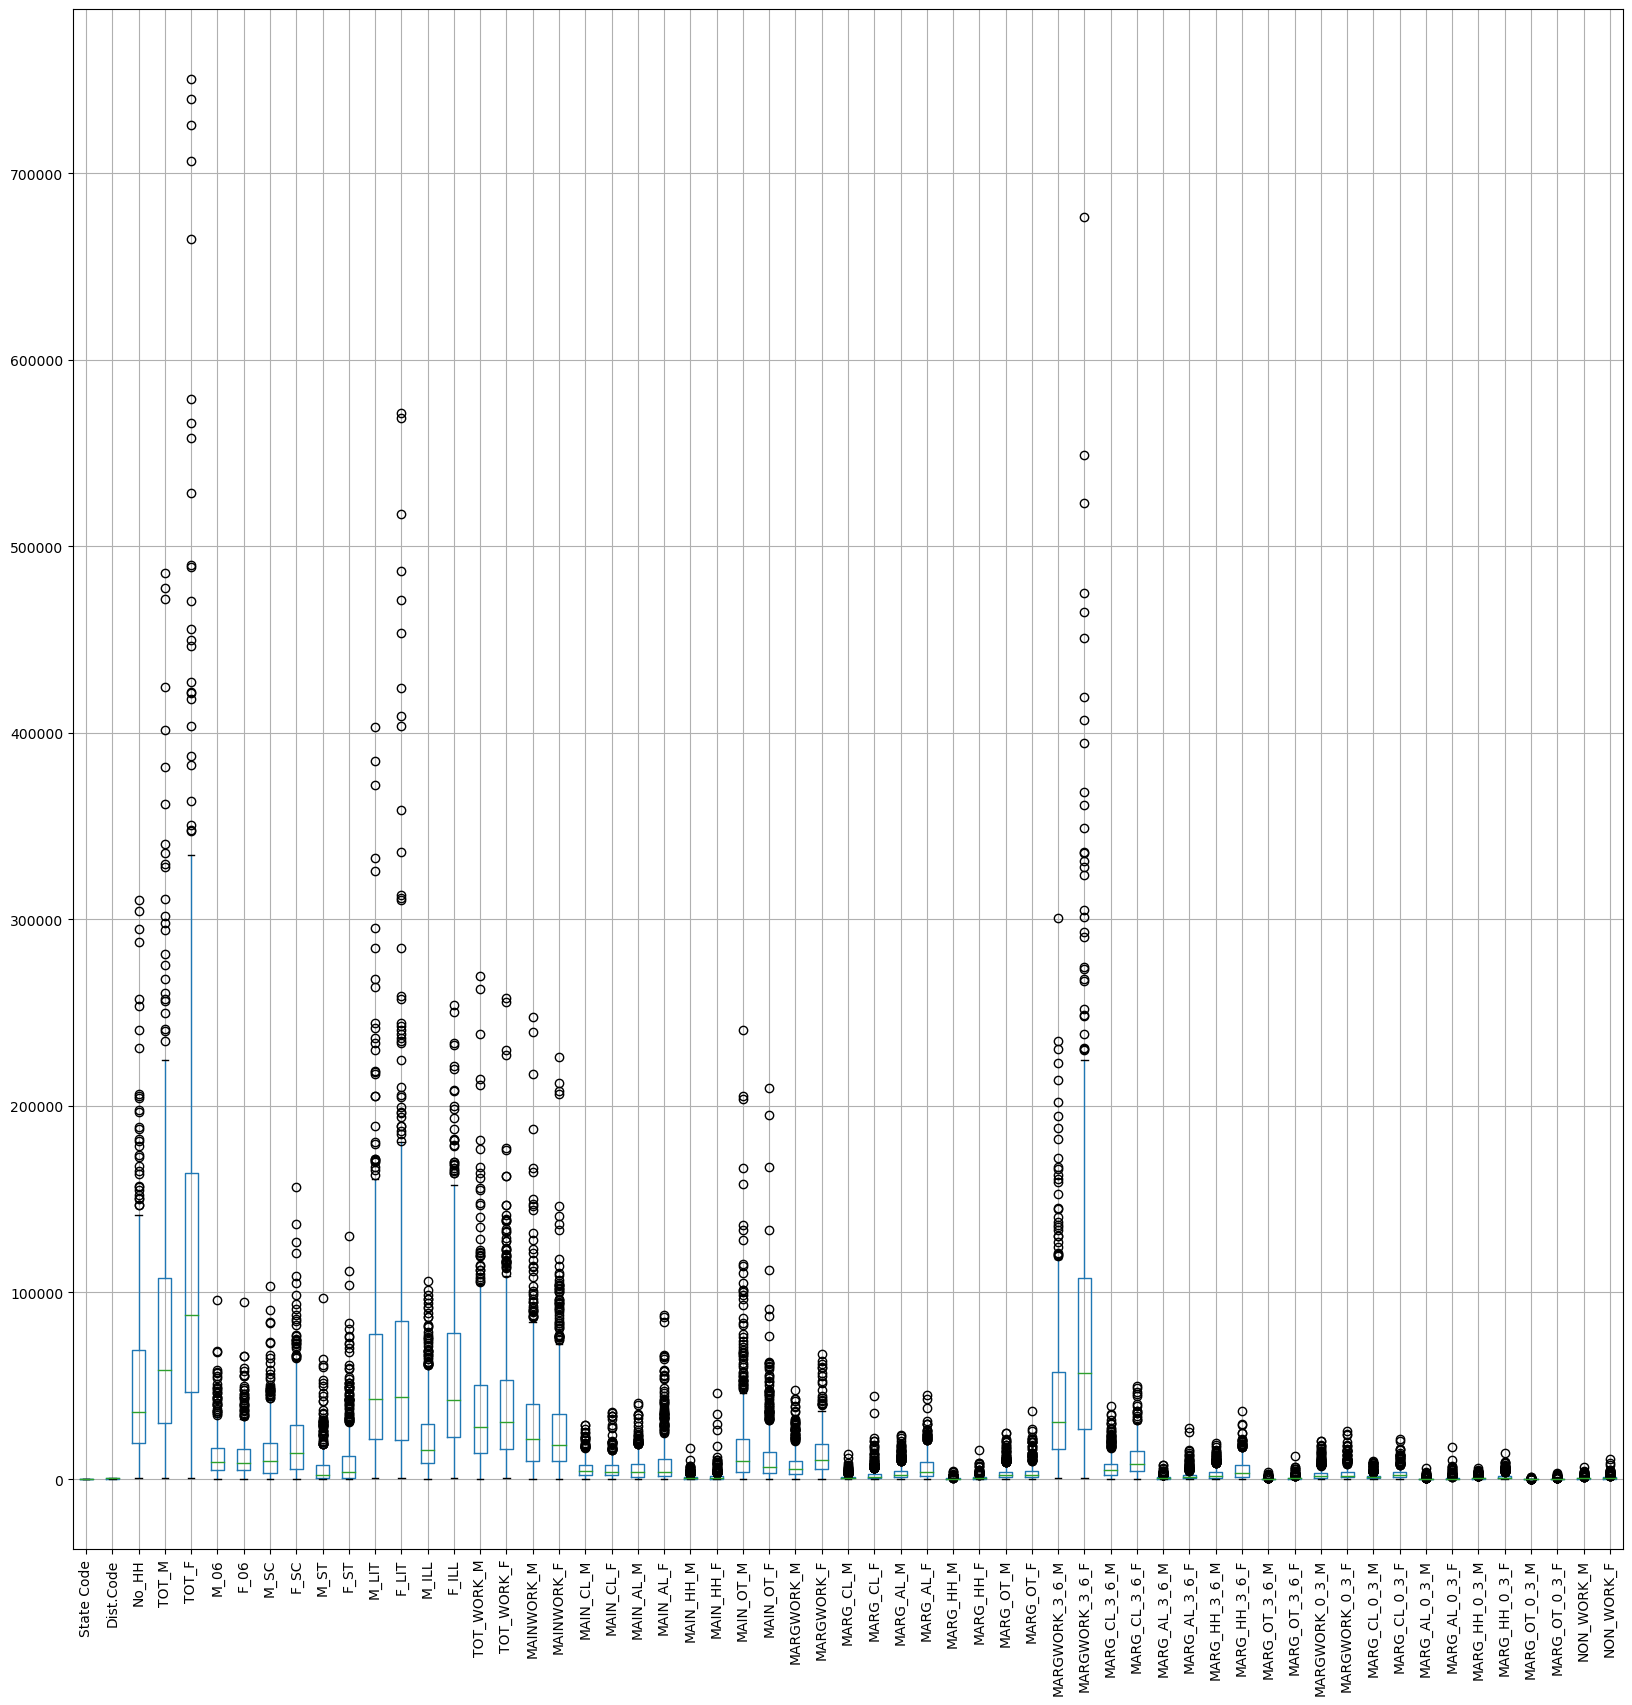

In [467]:
drop_df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

## Scaling the data

In [468]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(drop_df), columns=drop_df.columns)

In [469]:
data_scaled.head()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0   -1.710782  -1.729347 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738   
1   -1.710782  -1.723934 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367   
2   -1.710782  -1.718521 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262   
3   -1.710782  -1.713109 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393   
4   -1.710782  -1.707696 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.958575 -0.957049 -0.423306  ...      -0.163229      -0.720610   
1 -0.958297 -0.956772 -0.582014  ...      -0.583103      -0.732811   
2 -0.958575 -0.956772 -0.038951  ...      -0.859212      -0.921931   
3 -0.958783 -0.957049 -0.355965  ...      -0.805468      -0.900758   
4 -0.957395 -0.955529  0.149238  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 59 columns]

# Visualization ( After Scaling )

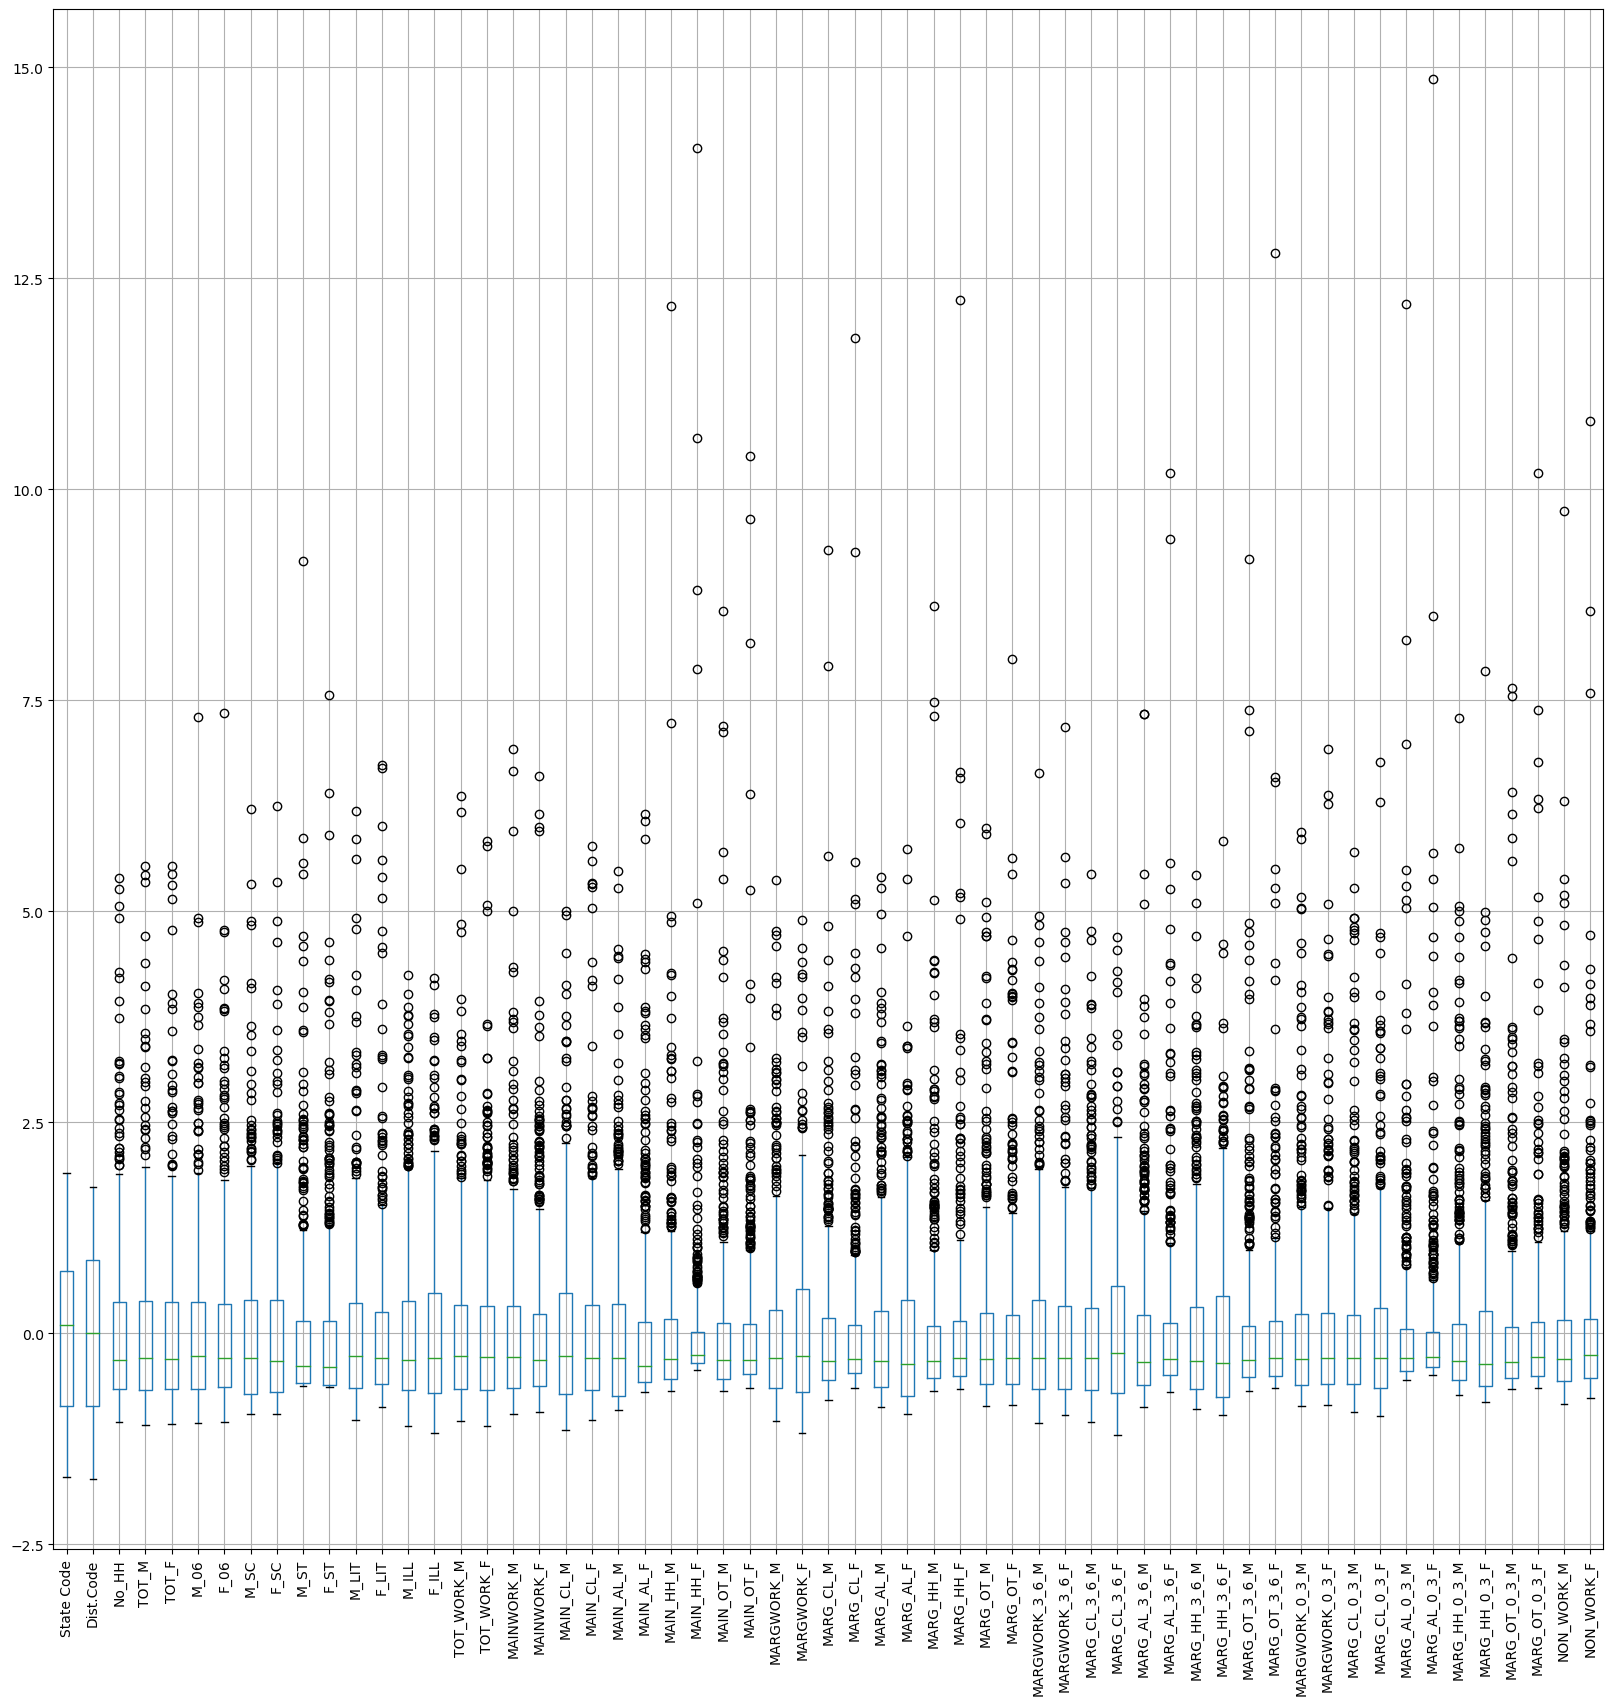

In [470]:
data_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

## Observations -

## After scaling, While the skewness remains the same among all columns but now the data is distributed among the same magnitude

# Part 2

## Create a covariance matrix for identifying Principal components

In [471]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(data_scaled.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00156495 0.99457535 0.38502614 ... 0.03409773 0.12572474 0.23208471]
 [0.99457535 1.00156495 0.37756089 ... 0.03334295 0.11226784 0.21313518]
 [0.38502614 0.37756089 1.00156495 ... 0.53769433 0.76357722 0.73684378]
 ...
 [0.03409773 0.03334295 0.53769433 ... 1.00156495 0.61052325 0.52191235]
 [0.12572474 0.11226784 0.76357722 ... 0.61052325 1.00156495 0.88228018]
 [0.23208471 0.21313518 0.73684378 ... 0.52191235 0.88228018 1.00156495]]


In [472]:
#Even if we take the transpose of the covariance matrix it results in same value as that of the above
cov_matrix = np.cov(data_scaled.T).T
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00156495 0.99457535 0.38502614 ... 0.03409773 0.12572474 0.23208471]
 [0.99457535 1.00156495 0.37756089 ... 0.03334295 0.11226784 0.21313518]
 [0.38502614 0.37756089 1.00156495 ... 0.53769433 0.76357722 0.73684378]
 ...
 [0.03409773 0.03334295 0.53769433 ... 1.00156495 0.61052325 0.52191235]
 [0.12572474 0.11226784 0.76357722 ... 0.61052325 1.00156495 0.88228018]
 [0.23208471 0.21313518 0.73684378 ... 0.52191235 0.88228018 1.00156495]]


## Covariance Matrix is formed by using np.cov() function

## Comparing Correlation and Covariance Matrix

In [473]:
# Now without Scaling lets check out correlation matrix
df_corr = data_scaled.copy()
df_corr.corr()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06  \
State Code        1.000000   0.993021  0.384425  0.166238  0.273080  0.052300   
Dist.Code         0.993021   1.000000  0.376971  0.164378  0.269653  0.058868   
No_HH             0.384425   0.376971  1.000000  0.916170  0.970590  0.797559   
TOT_M             0.166238   0.164378  0.916170  1.000000  0.982640  0.950825   
TOT_F             0.273080   0.269653  0.970590  0.982640  1.000000  0.907975   
M_06              0.052300   0.058868  0.797559  0.950825  0.907975  1.000000   
F_06              0.063743   0.071644  0.796373  0.947792  0.906557  0.998151   
M_SC              0.049352   0.042254  0.775309  0.839925  0.816959  0.781120   
F_SC              0.149796   0.142388  0.823847  0.826299  0.832756  0.747530   
M_ST              0.240812   0.234392  0.149627  0.091421  0.123626  0.055274   
F_ST              0.262816   0.256950  0.165102  0.086180  0.128646  0.043948   
M_LIT             0.214163   0.208501  0.931938  0.989312  0.985441  0.912757   
F_LIT             0.293141   0.284111  0.928087  0.931708  0.957012  0.832509   
M_ILL             0.011367   0.020452  0.763041  0.911539  0.858199  0.945409   
F_ILL             0.191555   0.197672  0.862074  0.885361  0.886917  0.863324   
TOT_WORK_M        0.245114   0.237493  0.938199  0.970417  0.968955  0.855773   
TOT_WORK_F        0.438912   0.437097  0.925259  0.807895  0.876233  0.683494   
MAINWORK_M        0.281177   0.270948  0.926629  0.932832  0.941016  0.789694   
MAINWORK_F        0.483801   0.480965  0.891306  0.744368  0.822822  0.584979   
MAIN_CL_M         0.002989   0.004912  0.431402  0.531734  0.487657  0.561164   
MAIN_CL_F         0.160240   0.160545  0.382680  0.355887  0.385373  0.381994   
MAIN_AL_M         0.321533   0.337237  0.673638  0.593420  0.623724  0.549857   
MAIN_AL_F         0.508649   0.519156  0.585856  0.379748  0.472748  0.296250   
MAIN_HH_M         0.021671   0.017635  0.641375  0.740354  0.700957  0.659762   
MAIN_HH_F         0.202215   0.199488  0.490908  0.443512  0.466299  0.354727   
MAIN_OT_M         0.259017   0.242657  0.843762  0.847851  0.860240  0.684290   
MAIN_OT_F         0.341202   0.329965  0.822356  0.745241  0.794134  0.557387   
MARGWORK_M        0.010151   0.016154  0.674375  0.806355  0.764404  0.851000   
MARGWORK_F        0.164689   0.166284  0.697947  0.701840  0.718952  0.715900   
MARG_CL_M        -0.272277  -0.274087  0.168756  0.301534  0.259766  0.418775   
MARG_CL_F        -0.253847  -0.262469  0.080604  0.151850  0.135768  0.239806   
MARG_AL_M        -0.019346   0.002862  0.437106  0.542250  0.501570  0.639896   
MARG_AL_F         0.239640   0.256765  0.489158  0.446828  0.474702  0.487613   
MARG_HH_M        -0.078447  -0.066193  0.502224  0.666969  0.606260  0.696793   
MARG_HH_F         0.061313   0.057648  0.538261  0.579697  0.565228  0.542395   
MARG_OT_M         0.150103   0.138249  0.800971  0.892429  0.871874  0.835365   
MARG_OT_F         0.247639   0.232250  0.833235  0.839530  0.857518  0.744644   
MARGWORK_3_6_M    0.083809   0.087422  0.846809  0.974313  0.943051  0.988824   
MARGWORK_3_6_F    0.177147   0.173267  0.914147  0.983256  0.976391  0.936791   
MARG_CL_3_6_M     0.036225   0.042806  0.692377  0.819869  0.778856  0.859413   
MARG_CL_3_6_F     0.211330   0.213662  0.723436  0.715267  0.736418  0.716630   
MARG_AL_3_6_M    -0.242725  -0.242747  0.210641  0.352883  0.306733  0.472981   
MARG_AL_3_6_F    -0.237055  -0.246655  0.094437  0.165073  0.149338  0.253610   
MARG_HH_3_6_M    -0.000303   0.022606  0.448382  0.546598  0.507514  0.641075   
MARG_HH_3_6_F     0.283028   0.300641  0.496975  0.436428  0.470992  0.466309   
MARG_OT_3_6_M    -0.073361  -0.061867  0.501329  0.664219  0.603306  0.690955   
MARG_OT_3_6_F     0.069944   0.065323  0.532138  0.569662  0.556009  0.527947   
MARGWORK_0_3_M    0.153157   0.141770  0.798661  0.890768  0.869805  0.834998   
MARGWORK_0_3_F    0.242850   0.228995  0.829153

In [474]:
cor_mat = df_corr.corr()
cor_mat

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06  \
State Code        1.000000   0.993021  0.384425  0.166238  0.273080  0.052300   
Dist.Code         0.993021   1.000000  0.376971  0.164378  0.269653  0.058868   
No_HH             0.384425   0.376971  1.000000  0.916170  0.970590  0.797559   
TOT_M             0.166238   0.164378  0.916170  1.000000  0.982640  0.950825   
TOT_F             0.273080   0.269653  0.970590  0.982640  1.000000  0.907975   
M_06              0.052300   0.058868  0.797559  0.950825  0.907975  1.000000   
F_06              0.063743   0.071644  0.796373  0.947792  0.906557  0.998151   
M_SC              0.049352   0.042254  0.775309  0.839925  0.816959  0.781120   
F_SC              0.149796   0.142388  0.823847  0.826299  0.832756  0.747530   
M_ST              0.240812   0.234392  0.149627  0.091421  0.123626  0.055274   
F_ST              0.262816   0.256950  0.165102  0.086180  0.128646  0.043948   
M_LIT             0.214163   0.208501  0.931938  0.989312  0.985441  0.912757   
F_LIT             0.293141   0.284111  0.928087  0.931708  0.957012  0.832509   
M_ILL             0.011367   0.020452  0.763041  0.911539  0.858199  0.945409   
F_ILL             0.191555   0.197672  0.862074  0.885361  0.886917  0.863324   
TOT_WORK_M        0.245114   0.237493  0.938199  0.970417  0.968955  0.855773   
TOT_WORK_F        0.438912   0.437097  0.925259  0.807895  0.876233  0.683494   
MAINWORK_M        0.281177   0.270948  0.926629  0.932832  0.941016  0.789694   
MAINWORK_F        0.483801   0.480965  0.891306  0.744368  0.822822  0.584979   
MAIN_CL_M         0.002989   0.004912  0.431402  0.531734  0.487657  0.561164   
MAIN_CL_F         0.160240   0.160545  0.382680  0.355887  0.385373  0.381994   
MAIN_AL_M         0.321533   0.337237  0.673638  0.593420  0.623724  0.549857   
MAIN_AL_F         0.508649   0.519156  0.585856  0.379748  0.472748  0.296250   
MAIN_HH_M         0.021671   0.017635  0.641375  0.740354  0.700957  0.659762   
MAIN_HH_F         0.202215   0.199488  0.490908  0.443512  0.466299  0.354727   
MAIN_OT_M         0.259017   0.242657  0.843762  0.847851  0.860240  0.684290   
MAIN_OT_F         0.341202   0.329965  0.822356  0.745241  0.794134  0.557387   
MARGWORK_M        0.010151   0.016154  0.674375  0.806355  0.764404  0.851000   
MARGWORK_F        0.164689   0.166284  0.697947  0.701840  0.718952  0.715900   
MARG_CL_M        -0.272277  -0.274087  0.168756  0.301534  0.259766  0.418775   
MARG_CL_F        -0.253847  -0.262469  0.080604  0.151850  0.135768  0.239806   
MARG_AL_M        -0.019346   0.002862  0.437106  0.542250  0.501570  0.639896   
MARG_AL_F         0.239640   0.256765  0.489158  0.446828  0.474702  0.487613   
MARG_HH_M        -0.078447  -0.066193  0.502224  0.666969  0.606260  0.696793   
MARG_HH_F         0.061313   0.057648  0.538261  0.579697  0.565228  0.542395   
MARG_OT_M         0.150103   0.138249  0.800971  0.892429  0.871874  0.835365   
MARG_OT_F         0.247639   0.232250  0.833235  0.839530  0.857518  0.744644   
MARGWORK_3_6_M    0.083809   0.087422  0.846809  0.974313  0.943051  0.988824   
MARGWORK_3_6_F    0.177147   0.173267  0.914147  0.983256  0.976391  0.936791   
MARG_CL_3_6_M     0.036225   0.042806  0.692377  0.819869  0.778856  0.859413   
MARG_CL_3_6_F     0.211330   0.213662  0.723436  0.715267  0.736418  0.716630   
MARG_AL_3_6_M    -0.242725  -0.242747  0.210641  0.352883  0.306733  0.472981   
MARG_AL_3_6_F    -0.237055  -0.246655  0.094437  0.165073  0.149338  0.253610   
MARG_HH_3_6_M    -0.000303   0.022606  0.448382  0.546598  0.507514  0.641075   
MARG_HH_3_6_F     0.283028   0.300641  0.496975  0.436428  0.470992  0.466309   
MARG_OT_3_6_M    -0.073361  -0.061867  0.501329  0.664219  0.603306  0.690955   
MARG_OT_3_6_F     0.069944   0.065323  0.532138  0.569662  0.556009  0.527947   
MARGWORK_0_3_M    0.153157   0.141770  0.798661  0.890768  0.869805  0.834998   
MARGWORK_0_3_F    0.242850   0.228995  0.829153

 **`Covariance` indicates the direction of the linear relationship between variables. `Correlation` on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. 
 You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.**

**We can  state that above three approaches yield the same eigenvectors and eigenvalue pairs:**

- **Eigen decomposition of the covariance matrix after standardizing the data.**

- **Eigen decomposition of the correlation matrix.**

- **Eigen decomposition of the correlation matrix after standardizing the data.**

**Finally we can say that after scaling - the covariance and the correlation have the same values**

## Identify eigenvalues and eigenvectors

In [475]:
#pd.set_option('display.float_format', lambda x: '%.2f%' % x)
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cor_mat)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [ 3.18176335e+01+0.00000000e+00j  8.17627518e+00+0.00000000e+00j
  4.53565320e+00+0.00000000e+00j  3.83736258e+00+0.00000000e+00j
  2.26750940e+00+0.00000000e+00j  1.95686350e+00+0.00000000e+00j
  1.37333087e+00+0.00000000e+00j  8.85956201e-01+0.00000000e+00j
  7.18773122e-01+0.00000000e+00j  6.13100086e-01+0.00000000e+00j
  4.93627186e-01+0.00000000e+00j  4.23485259e-01+0.00000000e+00j
  3.43394965e-01+0.00000000e+00j  2.75530570e-01+0.00000000e+00j
  2.95655943e-01+0.00000000e+00j  1.84706213e-01+0.00000000e+00j
  1.28645538e-01+0.00000000e+00j  1.11362686e-01+0.00000000e+00j
  1.03432923e-01+0.00000000e+00j  9.71908362e-02+0.00000000e+00j
  7.80910464e-02+0.00000000e+00j  5.58740146e-02+0.00000000e+00j
  4.43520192e-02+0.00000000e+00j  3.78063225e-02+0.00000000e+00j
  2.96241834e-02+0.00000000e+00j  2.70149631e-02+0.00000000e+00j
  2.34051410e-02+0.00000000e+00j  1.43387165e-02+0.00000000e+00j
  1.10791547e-02+0.00000000e+00j  9.27324621e-03+0.00000000e+00j
  8.2

In [476]:
pd.DataFrame(eig_vecs, columns=data_scaled.columns)

State Code           Dist.Code               No_HH  \
0  -0.030070+0.000000j -0.162783+0.000000j -0.250129+0.000000j   
1  -0.030075+0.000000j -0.158822+0.000000j -0.259360+0.000000j   
2  -0.156432+0.000000j -0.128322+0.000000j -0.033498+0.000000j   
3  -0.167038+0.000000j -0.080861+0.000000j  0.063630+0.000000j   
4  -0.165702+0.000000j -0.101111+0.000000j  0.024403+0.000000j   
5  -0.161871+0.000000j -0.012753+0.000000j  0.070453+0.000000j   
6  -0.162266+0.000000j -0.011674+0.000000j  0.063515+0.000000j   
7  -0.151068+0.000000j -0.035627+0.000000j  0.035345+0.000000j   
8  -0.151483+0.000000j -0.047732+0.000000j -0.009677+0.000000j   
9  -0.027664+0.000000j  0.008893+0.000000j -0.201756+0.000000j   
10 -0.028656+0.000000j  0.009765+0.000000j -0.220129+0.000000j   
11 -0.162029+0.000000j -0.106709+0.000000j  0.078097+0.000000j   
12 -0.147118+0.000000j -0.145649+0.000000j  0.094215+0.000000j   
13 -0.161355+0.000000j  0.001625+0.000000j  0.015287+0.000000j   
14 -0.165216+0.000000j -0.011822+0.000000j -0.091208+0.000000j   
15 -0.159989+0.000000j -0.126024+0.000000j  0.049175+0.000000j   
16 -0.146485+0.000000j -0.096165+0.000000j -0.126155+0.000000j   
17 -0.146447+0.000000j -0.168329+0.000000j  0.053223+0.000000j   
18 -0.124701+0.000000j -0.161039+0.000000j -0.119314+0.000000j   
19 -0.102842+0.000000j  0.060784+0.000000j -0.073732+0.000000j   
20 -0.074639+0.000000j  0.072382+0.000000j -0.121925+0.000000j   
21 -0.113762+0.000000j -0.045072+0.000000j -0.241982+0.000000j   
22 -0.074787+0.000000j -0.083782+0.000000j -0.313531+0.000000j   
23 -0.131280+0.000000j -0.061292+0.000000j  0.102102+0.000000j   
24 -0.083602+0.000000j -0.081797+0.000000j -0.024900+0.000000j   
25 -0.123790+0.000000j -0.200258+0.000000j  0.132074+0.000000j   
26 -0.111499+0.000000j -0.204434+0.000000j  0.062340+0.000000j   
27 -0.164144+0.000000j  0.095729+0.000000j  0.015572+0.000000j   
28 -0.155259+0.000000j  0.114062+0.000000j -0.101195+0.000000j   
29 -0.081470+0.000000j  0.270006+0.000000j  0.104666+0.000000j   
30 -0.048411+0.000000j  0.245991+0.000000j  0.125646+0.000000j   
31 -0.128167+0.000000j  0.158405+0.000000j -0.142069+0.000000j   
32 -0.114462+0.000000j  0.117725+0.000000j -0.290271+0.000000j   
33 -0.140274+0.000000j  0.077559+0.000000j  0.064858+0.000000j   
34 -0.127424+0.000000j  0.027744+0.000000j -0.004157+0.000000j   
35 -0.155155+0.000000j -0.077464+0.000000j  0.134472+0.000000j   
36 -0.147414+0.000000j -0.110153+0.000000j  0.099771+0.000000j   
37 -0.164714+0.000000j -0.034426+0.000000j  0.073724+0.000000j   
38 -0.161211+0.000000j -0.095331+0.000000j  0.089963+0.000000j   
39 -0.165090+0.000000j  0.079613+0.000000j  0.005016+0.000000j   
40 -0.155618+0.000000j  0.090678+0.000000j -0.123580+0.000000j   
41 -0.092133+0.000000j  0.263962+0.000000j  0.076698+0.000000j   
42 -0.050781+0.000000j  0.242794+0.000000j  0.111763+0.000000j   
43 -0.128189+0.000000j  0.150601+0.000000j -0.153496+0.000000j   
44 -0.110911+0.000000j  0.100312+0.000000j -0.309744+0.000000j   
45 -0.139029+0.000000j  0.071923+0.000000j  0.066194+0.000000j   
46 -0.124331+0.000000j  0.018344+0.000000j -0.004905+0.000000j   
47 -0.154197+0.000000j -0.081126+0.000000j  0.133891+0.000000j   
48 -0.146412+0.000000j -0.117213+0.000000j  0.099662+0.000000j   
49 -0.149445+0.000000j  0.154508+0.000000j  0.057198+0.000000j   
50 -0.139705+0.000000j  0.174434+0.000000j -0.023800+0.000000j   
51 -0.051646+0.000000j  0.253834+0.000000j  0.149589+0.000000j   
52 -0.040969+0.000000j  0.242224+0.000000j  0.151083+0.000000j   
53 -0.121254+0.000000j  0.181278+0.000000j -0.088656+0.000000j   
54 -0.115790+0.000000j  0.165403+0.000000j -0.197795+0.000000j   
55 -0.139260+0.000000j  0.093446+0.000000j  0.058031+0.000000j   
56 -0.131869+0.000000j  0.054069+0.000000j -0.001833+0.000000j   
57 -0.150220+0.000000j -0.054410+0.000000j  0.128955+0.000000j   
58 -0.131179+0.000000j -0.069474+0.000000j  0.086702+0.000000j   

                 TOT_M               TOT_F         

In [477]:
data_scaled.head()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0   -1.710782  -1.729347 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738   
1   -1.710782  -1.723934 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367   
2   -1.710782  -1.718521 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262   
3   -1.710782  -1.713109 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393   
4   -1.710782  -1.707696 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.958575 -0.957049 -0.423306  ...      -0.163229      -0.720610   
1 -0.958297 -0.956772 -0.582014  ...      -0.583103      -0.732811   
2 -0.958575 -0.956772 -0.038951  ...      -0.859212      -0.921931   
3 -0.958783 -0.957049 -0.355965  ...      -0.805468      -0.900758   
4 -0.957395 -0.955529  0.149238  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 59 columns]

In [478]:
eig_vecs[0]

array([-3.00700521e-02+0.00000000e+00j, -1.62782525e-01+0.00000000e+00j,
       -2.50129023e-01+0.00000000e+00j, -1.20048868e-01+0.00000000e+00j,
       -1.45753370e-01+0.00000000e+00j, -9.02440992e-02+0.00000000e+00j,
        3.52204558e-01+0.00000000e+00j, -3.86295415e-01+0.00000000e+00j,
        1.81863602e-01+0.00000000e+00j,  3.77332085e-02+0.00000000e+00j,
        1.59749850e-01+0.00000000e+00j,  8.11008189e-02+0.00000000e+00j,
       -8.68178518e-02+0.00000000e+00j, -7.28739916e-02+0.00000000e+00j,
       -6.14923092e-04+0.00000000e+00j,  7.02073300e-02+0.00000000e+00j,
       -5.07296922e-02+0.00000000e+00j, -4.22833233e-02+0.00000000e+00j,
       -1.73943958e-02+0.00000000e+00j,  1.99854696e-02+0.00000000e+00j,
       -9.21964281e-02+0.00000000e+00j, -4.58094004e-02+0.00000000e+00j,
        2.57672501e-02+0.00000000e+00j, -2.63640277e-03+0.00000000e+00j,
        3.31697928e-02+0.00000000e+00j, -8.60098068e-03+0.00000000e+00j,
       -9.97801801e-03+0.00000000e+00j,  1.72622886

## The eigenvalues and eigenvectors have been computed at this stage using the np.linalg.eig() function. These eigenvalues and eigenvectors provide crucial insights into the variance and directions of the principal components within the dataset. Additionally, the results have been presented in a dataframe format for further analysis and interpretation.






## Cumulative Distribution of Eigenvalues

## Principal Component Analysis

## To start, we'll define the number of principal components to generate. Then, we'll compute the principal components of the data using the pca.fit_transform method. Finally, we'll determine the percentage of variance explained by each principal component. The variance explained is as follows:

In [479]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_
exp_var

array([5.39281923e-01, 1.38580935e-01, 7.68754779e-02, 6.50400438e-02,
       3.84323628e-02, 3.31671780e-02, 2.32767944e-02, 1.50162068e-02,
       1.21825953e-02, 1.03915269e-02, 8.36656248e-03, 7.17771626e-03,
       5.82025365e-03, 5.01111768e-03, 4.67000966e-03, 3.13061378e-03,
       2.18043284e-03, 1.88750315e-03, 1.75310038e-03, 1.64730231e-03,
       1.32357706e-03, 9.47017197e-04, 7.51729139e-04, 6.40785128e-04,
       5.02104803e-04, 4.57880730e-04, 3.96697306e-04, 2.43029093e-04,
       1.87782283e-04, 1.57173665e-04, 1.39980367e-04, 1.28839812e-04,
       8.50025939e-05, 7.61424707e-05, 4.25729552e-05, 1.79815507e-05,
       1.20469553e-05, 1.06354607e-31, 4.88011278e-33, 2.78264111e-33,
       2.78264111e-33, 2.78264111e-33, 2.78264111e-33, 2.78264111e-33,
       2.78264111e-33, 2.78264111e-33, 2.78264111e-33, 2.78264111e-33,
       2.78264111e-33, 2.78264111e-33, 2.78264111e-33, 2.78264111e-33,
       2.78264111e-33, 2.78264111e-33, 2.78264111e-33, 2.78264111e-33,
      

## Now, we'll check the minimum number of components required to explain more than 90% of the variance. We'll run a loop to sum the explained variances and stop when the cumulative sum exceeds 90%. After the loop, we find that the number of principal components required to explain at least 90% of the variance is 7.


In [480]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  7


Observations:

* We observe that out of the 59 original features, we reduced the dimensionality to 7 principal components. These components       explain more than 90% of the original variance.
* Therefore, there is approximately an 88% reduction in dimensionality with a loss of only 10% in variance.
* Now, let's examine these principal components as linear combinations of the original features.

# Scree Plot

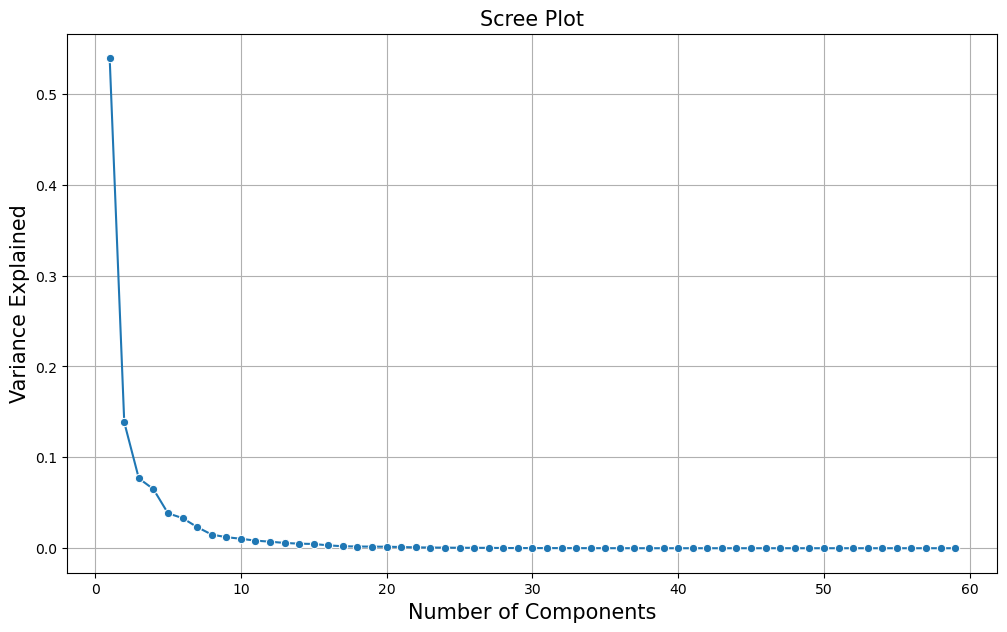

In [481]:
plt.figure(figsize=(12,7))
sns.lineplot(y=exp_var,x=range(1,len(exp_var)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

- **Visually we can observe that their is steep drop in variance explained with increase in number of PC's.**

## Compare PCs with Actual Columns and identify which is explaining most variance

In [482]:
## Use PCA  from sklearn's decomposition class and find Principal Components

In [483]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 59 to 7)

pca = PCA(n_components = 7, random_state=2) # Instanciating
data_reduced = pca.fit_transform(data_scaled)  # Scaled Data
data_reduced

array([[-4.71938093,  0.71750418,  1.63226573, ...,  0.09025696,
        -0.61257314,  0.74128854],
       [-4.87329665,  0.49200093,  1.75212655, ..., -0.26297192,
         0.30521661,  0.67768498],
       [-6.06294775,  0.23375092,  1.33306818, ...,  0.15217157,
        -0.0165205 ,  1.12038163],
       ...,
       [-6.18034109, -1.2162661 , -0.34610853, ...,  0.90705497,
         0.54839523, -1.85319893],
       [-6.10874064, -1.24897987, -0.27949751, ...,  0.7765009 ,
         0.30553866, -1.91221533],
       [-5.78130461, -1.50149132, -0.1861305 , ...,  0.84695498,
         0.24827686, -1.88048749]])

In [484]:
pd.DataFrame(data_reduced)

0         1         2         3         4         5         6
0   -4.719381  0.717504  1.632266 -1.524984  0.090257 -0.612573  0.741289
1   -4.873297  0.492001  1.752127 -1.938533 -0.262972  0.305217  0.677685
2   -6.062948  0.233751  1.333068 -0.710272  0.152172 -0.016521  1.120382
3   -6.378387  0.042766  1.404373 -1.187672  0.013924 -0.177346  0.759801
4   -4.581259  1.431602  1.722496 -0.231724  0.579574  0.058364  0.894611
..        ...       ...       ...       ...       ...       ...       ...
635 -6.150873 -1.405780 -0.232601 -0.486829  0.748188  0.245564 -1.842009
636 -5.656448 -1.453038 -0.310560 -0.465031  0.723287  0.242883 -1.898197
637 -6.180341 -1.216266 -0.346109 -0.684361  0.907055  0.548395 -1.853199
638 -6.108741 -1.248980 -0.279498 -0.421100  0.776501  0.305539 -1.912215
639 -5.781305 -1.501491 -0.186131 -0.373330  0.846955  0.248277 -1.880487

[640 rows x 7 columns]

In [485]:
len(data_reduced)

640

In [486]:
# PCA Loadings
pca.components_

array([[ 3.00700521e-02,  3.00751392e-02,  1.56432451e-01,
         1.67038499e-01,  1.65701886e-01,  1.61870848e-01,
         1.62266320e-01,  1.51067631e-01,  1.51483487e-01,
         2.76635864e-02,  2.86559949e-02,  1.62028968e-01,
         1.47117900e-01,  1.61354631e-01,  1.65216191e-01,
         1.59988739e-01,  1.46484663e-01,  1.46446784e-01,
         1.24700922e-01,  1.02841551e-01,  7.46387972e-02,
         1.13762012e-01,  7.47868720e-02,  1.31280497e-01,
         8.36015471e-02,  1.23789890e-01,  1.11498595e-01,
         1.64144005e-01,  1.55258801e-01,  8.14703494e-02,
         4.84108523e-02,  1.28166982e-01,  1.14462067e-01,
         1.40274353e-01,  1.27424449e-01,  1.55154856e-01,
         1.47413552e-01,  1.64714317e-01,  1.61211005e-01,
         1.65089659e-01,  1.55618244e-01,  9.21330578e-02,
         5.07812312e-02,  1.28188765e-01,  1.10910853e-01,
         1.39029295e-01,  1.24330759e-01,  1.54196780e-01,
         1.46411774e-01,  1.49444956e-01,  1.39705021e-0

In [487]:
pca.explained_variance_

array([31.86742634,  8.18907061,  4.54275124,  3.84336785,  2.27105793,
        1.95992589,  1.37548006])

In [488]:
pca.explained_variance_ratio_

array([0.53928192, 0.13858094, 0.07687548, 0.06504004, 0.03843236,
       0.03316718, 0.02327679])

In [489]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([53.9, 67.8, 75.5, 82. , 85.8, 89.1, 91.4])

In [490]:
pc_comps = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7']
data_pca = pd.DataFrame(np.round(pca.components_[:7,:],2),index=pc_comps,columns=data_scaled.columns)
dat_pca=data_pca.T
dat_pca

PC1   PC2   PC3   PC4   PC5   PC6   PC7
State Code      0.03 -0.16 -0.25  0.12  0.15  0.09 -0.35
Dist.Code       0.03 -0.16 -0.26  0.11  0.14  0.08 -0.35
No_HH           0.16 -0.13 -0.03  0.10 -0.02 -0.00 -0.05
TOT_M           0.17 -0.08  0.06  0.03 -0.05 -0.07  0.07
TOT_F           0.17 -0.10  0.02  0.07 -0.03 -0.05  0.01
M_06            0.16 -0.01  0.07  0.01 -0.07 -0.15  0.09
F_06            0.16 -0.01  0.06  0.00 -0.06 -0.15  0.09
M_SC            0.15 -0.04  0.04 -0.02 -0.19 -0.05  0.02
F_SC            0.15 -0.05 -0.01  0.00 -0.17 -0.02 -0.04
M_ST            0.03  0.01 -0.20  0.14  0.37  0.11  0.50
F_ST            0.03  0.01 -0.22  0.14  0.38  0.11  0.47
M_LIT           0.16 -0.11  0.08  0.06 -0.02 -0.06  0.04
F_LIT           0.15 -0.15  0.09  0.10  0.05 -0.05 -0.02
M_ILL           0.16  0.00  0.02 -0.05 -0.12 -0.11  0.16
F_ILL           0.17 -0.01 -0.09  0.01 -0.14 -0.03  0.05
TOT_WORK_M      0.16 -0.13  0.05  0.05 -0.03 -0.01  0.06
TOT_WORK_F      0.15 -0.10 -0.13  0.16 -0.06  0.10 -0.03
MAINWORK_M      0.15 -0.17  0.05  0.07 -0.05  0.01  0.08
MAINWORK_F      0.12 -0.16 -0.12  0.18 -0.11  0.12  0.00
MAIN_CL_M       0.10  0.06 -0.07  0.03 -0.31  0.01  0.25
MAIN_CL_F       0.07  0.07 -0.12  0.24 -0.26  0.12  0.12
MAIN_AL_M       0.11 -0.05 -0.24 -0.01 -0.24 -0.02  0.03
MAIN_AL_F       0.07 -0.08 -0.31  0.13 -0.22  0.02 -0.08
MAIN_HH_M       0.13 -0.06  0.10 -0.13 -0.10  0.19  0.08
MAIN_HH_F       0.08 -0.08 -0.02 -0.07 -0.09  0.44 -0.04
MAIN_OT_M       0.12 -0.20  0.13  0.09  0.06  0.01  0.04
MAIN_OT_F       0.11 -0.20  0.06  0.14  0.07  0.06  0.03
MARGWORK_M      0.16  0.10  0.02 -0.08  0.06 -0.09 -0.02
MARGWORK_F      0.16  0.11 -0.10  0.07  0.09  0.01 -0.09
MARG_CL_M       0.08  0.27  0.10  0.16  0.00  0.05 -0.02
MARG_CL_F       0.05  0.25  0.13  0.29 -0.03  0.11 -0.06
MARG_AL_M       0.13  0.16 -0.14 -0.16  0.00 -0.14  0.01
MARG_AL_F       0.11  0.12 -0.29 -0.02  0.04 -0.10 -0.06
MARG_HH_M       0.14  0.08  0.06 -0.21 -0.02  0.11  0.01
MARG_HH_F       0.13  0.03 -0.00 -0.20  0.03  0.37 -0.01
MARG_OT_M       0.16 -0.08  0.13 -0.02  0.13 -0.07 -0.04
MARG_OT_F       0.15 -0.11  0.10  0.03  0.18 -0.01 -0.09
MARGWORK_3_6_M  0.16 -0.03  0.07  0.02 -0.06 -0.13  0.07
MARGWORK_3_6_F  0.16 -0.10  0.09  0.03 -0.01 -0.11  0.02
MARG_CL_3_6_M   0.17  0.08  0.01 -0.09  0.05 -0.10 -0.01
MARG_CL_3_6_F   0.16  0.09 -0.12  0.07  0.06  0.01 -0.07
MARG_AL_3_6_M   0.09  0.26  0.08  0.12  0.01  0.02  0.00
MARG_AL_3_6_F   0.05  0.24  0.11  0.29 -0.04  0.11 -0.04
MARG_HH_3_6_M   0.13  0.15 -0.15 -0.16 -0.01 -0.14  0.01
MARG_HH_3_6_F   0.11  0.10 -0.31 -0.01  0.02 -0.10 -0.06
MARG_OT_3_6_M   0.14  0.07  0.07 -0.21 -0.02  0.12  0.01
MARG_OT_3_6_F   0.12  0.02 -0.00 -0.20  0.02  0.39 -0.00
MARGWORK_0_3_M  0.15 -0.08  0.13 -0.02  0.12 -0.07 -0.04
MARGWORK_0_3_F  0.15 -0.12  0.10  0.02  0.15 -0.00 -0.07
MARG_CL_0_3_M   0.15  0.15  0.06 -0.04  0.09 -0.06 -0.03
MARG_CL_0_3_F   0.14  0.17 -0.02  0.05  0.14 -0.01 -0.14
MARG_AL_0_3_M   0.05  0.25  0.15  0.23 -0.02  0.08 -0.07
MARG_AL_0_3_F   0.04  0.24  0.15  0.27 -0.02  0.10 -0.10
MARG_HH_0_3_M   0.12  0.18 -0.09 -0.17  0.06 -0.13 -0.00
MARG_HH_0_3_F   0.12  0.17 -0.20 -0.09  0.11 -0.12 -0.08
MARG_OT_0_3_M   0.14  0.09  0.06 -0.21  0.00  0.08 -0.00
MARG_OT_0_3_F   0.13  0.05 -0.00 -0.21  0.06  0.30 -0.03
NON_WORK_M      0.15 -0.05  0.13 -0.02  0.17 -0.06 -0.03
NON_WORK_F      0.13 -0.07  0.09  0.04  0.25 -0.04 -0.15

ValueError: num must be an integer with 1 <= num <= 6, not 7

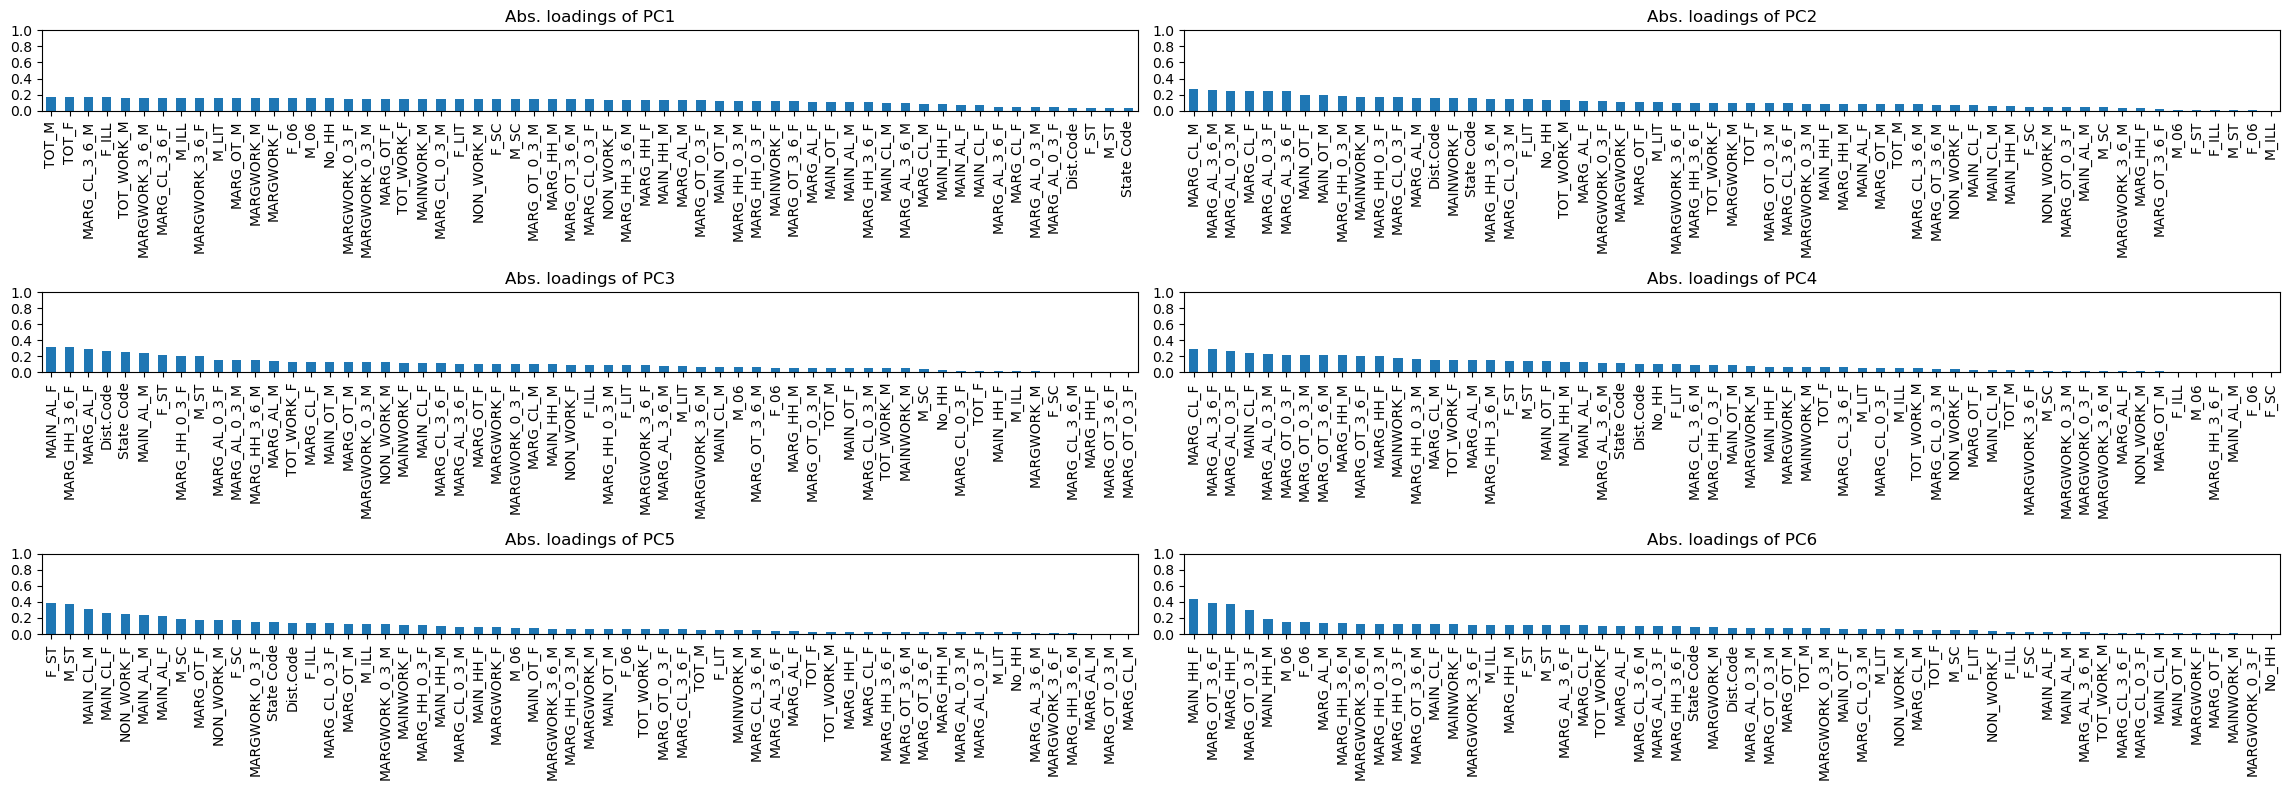

In [491]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values

dat_pca = dat_pca.iloc[:, :6]
plt.figure(figsize = (23,8))
for i in range(len(data_pca.columns)):
    plt.subplot(3,2,i+1)
    abs(dat_pca[dat_pca.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(dat_pca.columns[i]))
    plt.tight_layout()

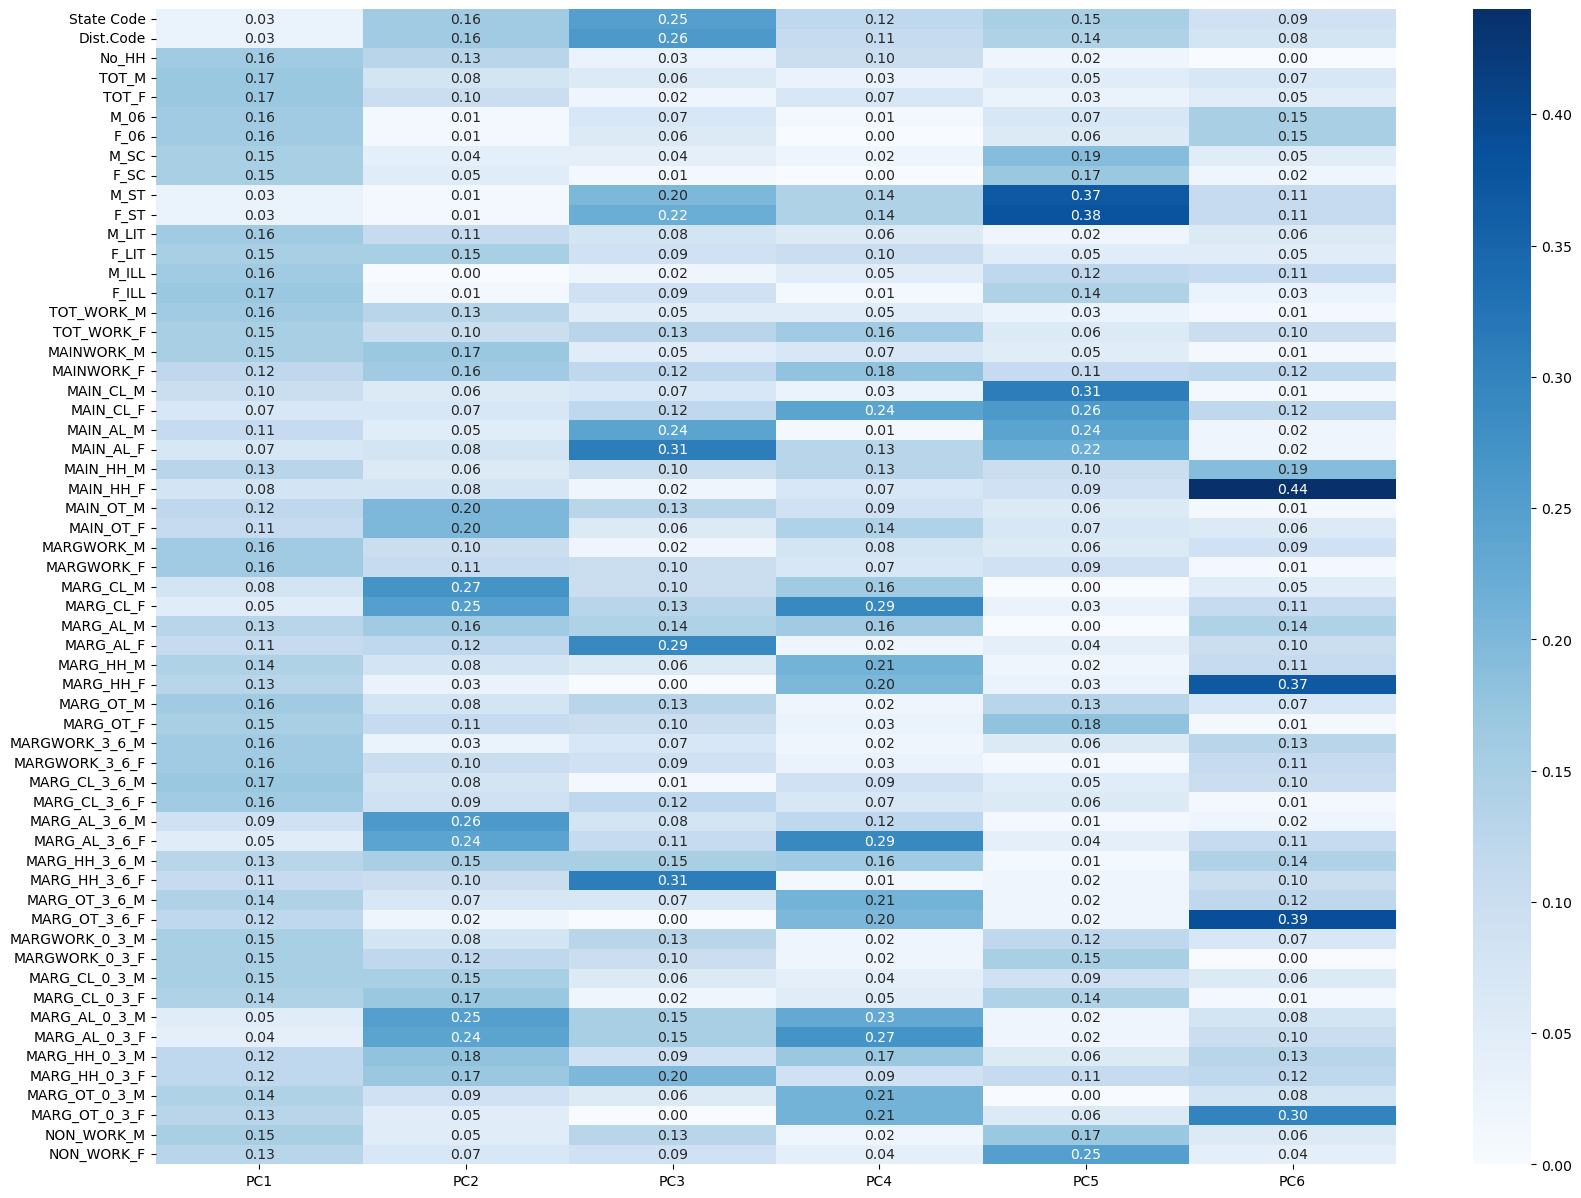

In [492]:
#Compare how the original features influence various PCs
plt.figure(figsize = (20,15))
sns.heatmap(abs(dat_pca), annot = True, cmap = 'Blues',fmt = '.2f');

In [493]:
def color_high(val):
    if val <= -0.20: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.30:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

## inferences about all the PCs in terms of actual variables

* PC2 is characterized by a strong presence of MAIN_OT_M and MAIN_OT_F variables, indicating a significant influence from the main other workers in male and female populations.
* PC3 exhibits notable contributions from MAIN_AL_M, MAIN_AL_F, MARG_AL_F, and MARG_HH_3_6_F variables, suggesting a combination of main agricultural laborers and marginal household industries in the 3-6 age group for both male and female populations.
* PC4 is primarily composed of MARG_OT_0_3_M, MARG_OT_3_6_M, and MARG_HH_M variables, indicating a relationship between marginal other workers in the age group 0-3 and 3-6, and marginal household industries for the male population.
* PC5 showcases significant associations with M_ST, F_ST, MAIN_CL_M, and MAIN_CL_F variables, suggesting correlations between scheduled tribes, main cultivators in male and female populations.
* PC6 predominantly includes MAIN_HH_F, MARG_HH_F, MARG_OT_3_6_F, and MARG_OT_0_3_F variables, indicating a combination of main household industries and marginal other workers in the age groups 3-6 and 0-3 for the female population.
* PC7 is mainly characterized by State Code, Dist.Code, M_ST, and F_ST variables, highlighting correlations between state and district codes and scheduled tribes.

Linear Equation of PC1 -

Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:

'State Code'*0.3 + 'Dist.Code'*0.3 + 'No_HH'*0.16 + 'TOT_M'*0.17 + 'TOT_F'*0.17 + 'M_06'*0.16 + 'F_06'*0.16 +
'M_SC'*0.15 + 'F_SC'*0.15 + 'M_ST'*0.3 + 'F_ST'*0.3 + 'M_LIT'*0.16 + 'F_LIT'*0.15 + 'M_ILL'*0.16 + 'F_ILL'*0.17 +
'TOT_WORK_M'*0.16 + 'TOT_WORK_F'*0.15 + 'MAINWORK_M'*0.15 + 'MAINWORK_F'*0.12 + 'MAIN_CL_M'*0.10 +
'MAIN_CL_F'*0.07 + 'MAIN_AL_M'*0.11 + 'MAIN_AL_F'*0.07 + 'MAIN_HH_M'*0.13 + 'MAIN_HH_F'*0.08 +
'MAIN_OT_M'*0.12 + 'MAIN_OT_F'*0.11 + 'MARGWORK_M'*0.16 + 'MARGWORK_F'*0.16 + 'MARG_CL_M'*0.08 +
'MARG_CL_F'*0.05 + 'MARG_AL_M'*0.13 + 'MARG_AL_F'*0.11 + 'MARG_HH_M'*0.14 + 'MARG_HH_F'*0.13 +
'MARG_OT_M'*0.16 + 'MARG_OT_F'*0.15 + 'MARGWORK_3_6_M'*0.16 + 'MARGWORK_3_6_F'*0.16 +
'MARG_CL_3_6_M'*0.17 + 'MARG_CL_3_6_F'*0.16 + 'MARG_AL_3_6_M'*0.09 + 'MARG_AL_3_6_F'*0.05 +
'MARG_HH_3_6_M'*0.13 + 'MARG_HH_3_6_F'*0.11 + 'MARG_OT_3_6_M'*0.14 + 'MARG_OT_3_6_F'*0.12 +
'MARGWORK_0_3_M'0.15 + 'MARGWORK_0_3_F0.15' + 'MARG_CL_0_3_M'*0.15 + 'MARG_CL_0_3_F'*0.14 +
'MARG_AL_0_3_M'*0.05 + 'MARG_AL_0_3_F'*0.04 + 'MARG_HH_0_3_M'*0.12 + 'MARG_HH_0_3_F'*0.12 +
'MARG_OT_0_3_M'*0.14 + 'MARG_OT_0_3_F'*0.13 + 'NON_WORK_M'*0.15 + 'NON_WORK_F'*0.13